# Introductions:
There are 4 stages in each experiment: A,B,C,D; Each stage has two sections with identical system settings

System settings in the experiment one: 

|Events| A-1 | A-2 | B-1 | B-2 | C-1 | C-2 | D-1 | D-2 |          
| :- |-: |-: |-: |-: |-: |-: |-: |-: |
|# True Alerts |12|12|14|14|12|12|14|14|
|# False Alerts| 5| 5| 6| 6| 2| 2| 3| 3|
|# Misses      | 3| 2| 0| 0| 2| 2| 0| 0|

The experiment two has the same system settings to experiment 1, but in a different order, swapped AB and CD

|Events| C-1 | C-2 | D-1 | D-2 | A-1 | A-2 | B-1 | B-2 |          
| :- |-: |-: |-: |-: |-: |-: |-: |-: |
|# True Alerts |12|12|14|14|12|12|14|14|
|# False Alerts| 2| 2| 3| 3| 5| 5| 6| 6|
|# Misses      | 2| 2| 0| 0| 3| 2| 0| 0|

Each experiment has 18 validate results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import scipy.special as ss
from collections import Counter
from IPython.display import display, Markdown, Latex

from sklearn import linear_model
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

exp1_data = pd.read_csv("allTogetherSep.csv")
exp2_data = pd.read_csv("allTogetherOct.csv")

exp1_data_T = pd.DataFrame.transpose(exp1_data).reset_index()
exp2_data_T = pd.DataFrame.transpose(exp2_data).reset_index()

n_participant = exp1_data_T.shape[0]

exp1_trust = exp1_data_T.values[1:n_participant,79:87].astype(int)
exp2_trust = exp2_data_T.values[1:n_participant,79:87].astype(int)
exp_trust = np.vstack((exp1_trust,np.hstack((exp2_trust[:,4:],exp2_trust[:,:4])))).astype(int)

exp1_attend = exp1_data_T.values[1:n_participant,124:132].astype(int)
exp2_attend = exp2_data_T.values[1:n_participant,124:132].astype(int)
exp_attend = np.vstack((exp1_attend,np.hstack((exp2_attend[:,4:],exp2_attend[:,:4])))).astype(int)

exp1_attend_prop = exp1_attend/np.array([15,14,14,14,14,14,14,14])
exp2_attend_prop = exp2_attend/np.array([15,14,14,14,14,14,14,14])
exp_attend_prop = exp_attend/np.array([15,14,14,14,14,14,14,14])

exp1_attend_alert = exp1_data_T.values[1:n_participant,280:288].astype(int)
exp2_attend_alert = exp2_data_T.values[1:n_participant,280:288].astype(int)
exp_attend_alert = np.vstack((exp1_attend_alert,np.hstack((exp2_attend_alert[:,4:],exp2_attend_alert[:,:4])))).astype(int)

exp1_attend_alert_prop = exp1_attend_alert/np.array([17,17,20,20,14,14,17,17])
exp2_attend_alert_prop = exp2_attend_alert/np.array([14,14,17,17,17,17,20,20])
exp_attend_alert_prop = exp_attend_alert/np.array([17,17,20,20,14,14,17,17])

###########################################################################################
##### 144:152 are # attended true HR events
exp1_attend_hievent = exp1_data_T.values[1:n_participant,144:152].astype(int)
exp2_attend_hievent = exp2_data_T.values[1:n_participant,144:152].astype(int)
exp_attend_hievent = np.vstack((exp1_attend_hievent, np.hstack((exp2_attend_hievent[:,4:],exp2_attend_hievent[:,:4])))).astype(int)

##### 134:142 are # attended true LR events 
exp1_attend_loevent = exp1_data_T.values[1:n_participant,134:142].astype(int)
exp2_attend_loevent = exp2_data_T.values[1:n_participant,134:142].astype(int)
exp_attend_loevent = np.vstack((exp1_attend_loevent, np.hstack((exp2_attend_loevent[:,4:],exp2_attend_loevent[:,:4])))).astype(int)

exp1_attend_hievent_prop = exp1_attend_hievent/np.array([7,7,7,7,7,7,7,7])
exp2_attend_hievent_prop = exp2_attend_hievent/np.array([7,7,7,7,7,7,7,7])
exp_attend_hievent_prop = exp_attend_hievent/np.array([7,7,7,7,7,7,7,7])

exp1_attend_loevent_prop = exp1_attend_loevent/np.array([8,7,7,7,7,7,7,7])
exp2_attend_loevent_prop = exp2_attend_loevent/np.array([7,7,7,7,8,7,7,7])
exp_attend_loevent_prop = exp_attend_loevent/np.array([8,7,7,7,7,7,7,7])

#########################################################################################

exp1_attendf = exp1_data_T.values[1:n_participant,214:222].astype(int)
exp2_attendf = exp2_data_T.values[1:n_participant,214:222].astype(int)
exp_attendf = np.vstack((exp1_attendf,np.hstack((exp2_attendf[:,4:],exp2_attendf[:,:4])))).astype(int)

exp1_attendf_prop = np.divide(exp1_attendf,(exp1_attendf+exp1_attend_alert))
exp2_attendf_prop = np.divide(exp2_attendf,(exp2_attendf+exp2_attend_alert))
exp_attendf_prop = np.divide(exp_attendf,(exp_attendf+exp_attend_alert))
# zero attended outlier correction, the warnings can be ignored
exp1_attendf_prop[6][6] = 0
exp_attendf_prop[6][6] = 0

exp1_check = exp1_data_T.values[1:n_participant,253:261].astype(int)
exp2_check = exp2_data_T.values[1:n_participant,253:261].astype(int)
exp_check = np.vstack((exp1_check,np.hstack((exp2_check[:,4:],exp2_check[:,:4])))).astype(int)

exp1_demo = exp1_data_T.values[1:n_participant,1:8]
exp2_demo = exp2_data_T.values[1:n_participant,1:8]
exp_demo = np.vstack((exp1_demo,exp2_demo)).astype(int)
exp_demo[:,5] += 2  # replace -1,0,1 to 1,2,3

exp1_pstq = exp1_data_T.values[1:n_participant, np.r_[16:19,21:28,29:32,34:41,42:45,47:54,55:58,60:67]].astype(int)
exp2_pstq = exp2_data_T.values[1:n_participant, np.r_[16:19,21:28,29:32,34:41,42:45,47:54,55:58,60:67]].astype(int)
exp_pstq = np.vstack((exp1_pstq,np.hstack((exp2_pstq[:,20:],exp2_pstq[:,:20])))).astype(int)

exp1_prop = exp1_data_T.values[1:n_participant,9:15].astype(int)
exp2_prop = exp2_data_T.values[1:n_participant,9:15].astype(int)
exp_prop = np.vstack((exp1_prop,np.hstack((exp2_prop[:,4:],exp2_prop[:,:4])))).astype(int)

exp1_pgq = exp1_data_T.values[1:n_participant,69:76]
exp2_pgq = exp2_data_T.values[1:n_participant,69:76]
exp_pgq = np.vstack((exp1_pgq,exp2_pgq)).astype(int)

exp1_freq = exp1_data_T.values[1:n_participant,88:92]
exp2_freq = exp2_data_T.values[1:n_participant,88:92]
exp_freq = np.vstack((exp1_freq,np.hstack((exp2_freq[:,2:],exp2_freq[:,:2]))))

exp1_admin = exp1_data_T.values[1:n_participant,94:102].astype(int)
exp2_admin = exp2_data_T.values[1:n_participant,94:102].astype(int)
exp_admin = np.vstack((exp1_admin,np.hstack((exp2_admin[:,4:],exp2_admin[:,:4])))).astype(int)

exp1_admin_w = exp1_data_T.values[1:n_participant,114:122].astype(int)
exp2_admin_w = exp2_data_T.values[1:n_participant,114:122].astype(int)
exp_admin_w = np.vstack((exp1_admin_w,np.hstack((exp2_admin_w[:,4:],exp2_admin_w[:,:4])))).astype(int)

exp_admin_c_prop = (exp_admin-exp_admin_w)/65
exp_admin_miss = 65-exp_admin

exp1_fnl_balance = exp1_data_T.values[1:n_participant,244:252].astype(int)
exp2_fnl_balance = exp2_data_T.values[1:n_participant,244:252].astype(int)
exp_fnl_balance = np.vstack((exp1_fnl_balance,np.hstack((exp2_fnl_balance[:,4:],exp2_fnl_balance[:,:4])))).astype(int)

# correct cards:$4; wrong cards: $4; use (total admin - 2x wrong admin)x$4 to get net profit
exp1_Earnings_admin = 4*(exp1_admin - 2*exp1_admin_w)-(65-exp1_admin)
exp2_Earnings_admin = 4*(exp2_admin - 2*exp2_admin_w)-(65-exp2_admin)
Earnings_admin = 4*(exp_admin - 2*exp_admin_w)-(65-exp_admin)

# reverse engineering to find total losses from monitoring system
exp1_Total_loss = exp1_fnl_balance - exp1_Earnings_admin - 150
exp2_Total_loss = exp2_fnl_balance - exp2_Earnings_admin - 150
Total_loss = exp_fnl_balance - Earnings_admin - 150


C:\Users\final\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in true_divide
C:\Users\final\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in true_divide


In [2]:
exp1_attend_hiloalert_prop = pd.read_csv("prop_HiLo_exp1.csv")
exp2_attend_hiloalert_prop = pd.read_csv("prop_HiLo_exp2.csv")

# proportion of attended high/low risk alerts

exp1_attend_hialert_prop = exp1_attend_hiloalert_prop.values[:,0].reshape((-1,8))
exp1_attend_loalert_prop = exp1_attend_hiloalert_prop.values[:,1].reshape((-1,8))
exp2_attend_hialert_prop = exp2_attend_hiloalert_prop.values[:,0].reshape((-1,8))
exp2_attend_loalert_prop = exp2_attend_hiloalert_prop.values[:,1].reshape((-1,8))

exp_attend_hialert_prop = np.vstack((exp1_attend_hialert_prop,np.hstack((exp2_attend_hialert_prop[:,4:],exp2_attend_hialert_prop[:,:4])))).astype(int)
exp_attend_loalert_prop = np.vstack((exp1_attend_loalert_prop,np.hstack((exp2_attend_loalert_prop[:,4:],exp2_attend_loalert_prop[:,:4])))).astype(int)

In [3]:
def training_effect_exp(exp1_data,exp2_data):
    exp_data_1st_sec = exp1_data[:, 0].T.ravel()
    exp_data_5th_sec = exp2_data[:, 4].T.ravel()
    print('A-1 (first) section in exp1: Mean:',exp_data_1st_sec.mean(),' Std:',exp_data_1st_sec.std(),' Median:',np.median(exp_data_1st_sec))
    print('A-1 (fifth) section in exp2: Mean:',exp_data_5th_sec.mean(),' Std:',exp_data_5th_sec.std(),' Median:',np.median(exp_data_5th_sec))
    print(sp.wilcoxon(exp_data_1st_sec,exp_data_5th_sec),'\n')
    exp_data_1st_sec = exp2_data[:, 0].T.ravel()
    exp_data_5th_sec = exp1_data[:, 4].T.ravel()
    print('C-1 (first) section in exp2: Mean:',exp_data_1st_sec.mean(),' Std:',exp_data_1st_sec.std(),' Median:',np.median(exp_data_1st_sec))
    print('C-1 (fifth) section in exp1: Mean:',exp_data_5th_sec.mean(),' Std:',exp_data_5th_sec.std(),' Median:',np.median(exp_data_5th_sec))
    print(sp.wilcoxon(exp_data_1st_sec,exp_data_5th_sec))


display(Markdown('# RQ1a Training Effect of very first section:  between first section with same section in the other exp'))
display(Markdown('## Trust Scores'))
training_effect_exp(exp1_trust,exp2_trust)
display(Markdown('## # Attended Events'))
training_effect_exp(exp1_attend,exp2_attend)
display(Markdown('## # Attended Alerts'))
training_effect_exp(exp1_attend_alert,exp2_attend_alert)
display(Markdown('## Proportion Attended Alerts'))
training_effect_exp(exp1_attend_alert_prop,exp2_attend_alert_prop)
display(Markdown('## Proportion Attended False Alerts'))
training_effect_exp(exp1_attendf_prop,exp2_attendf_prop)
display(Markdown('## # Checks'))
training_effect_exp(exp1_check,exp2_check)
display(Markdown('## # Loss'))
training_effect_exp(exp1_Total_loss,exp2_Total_loss)

def training_effect_1st_stage(exp1_data,exp2_data):
    exp_data_1st_sec = exp1_data[:, 0].T.ravel()
    exp_data_2nd_sec = exp1_data[:, 1].T.ravel()
    print('A-1 (first) section in exp1: Mean:',exp_data_1st_sec.mean(),' Std:',exp_data_1st_sec.std(),' Median:',np.median(exp_data_1st_sec))
    print('A-2 (second) section in exp1: Mean:',exp_data_2nd_sec.mean(),' Std:',exp_data_2nd_sec.std(),' Median:',np.median(exp_data_2nd_sec))
    print(sp.wilcoxon(exp_data_1st_sec,exp_data_2nd_sec),'\n')
    exp_data_1st_sec = exp2_data[:, 0].T.ravel()
    exp_data_2nd_sec = exp2_data[:, 1].T.ravel()
    print('C-1 (first) section in exp2: Mean:',exp_data_1st_sec.mean(),' Std:',exp_data_1st_sec.std(),' Median:',np.median(exp_data_1st_sec))
    print('C-2 (second) section in exp2: Mean:',exp_data_2nd_sec.mean(),' Std:',exp_data_2nd_sec.std(),' Median:',np.median(exp_data_2nd_sec))
    print(sp.wilcoxon(exp_data_1st_sec,exp_data_2nd_sec))
    
display(Markdown('# RQ1a+ Training effect of very first vs second segment'))
display(Markdown('## Trust Scores'))
training_effect_1st_stage(exp1_trust,exp2_trust)
display(Markdown('## # Attended Events'))
training_effect_1st_stage(exp1_attend,exp2_attend)
display(Markdown('## # Attended Alerts'))
training_effect_1st_stage(exp1_attend_alert,exp2_attend_alert)
display(Markdown('## Proportion Attended Alerts'))
training_effect_1st_stage(exp1_attend_alert_prop,exp2_attend_alert_prop)
display(Markdown('## Proportion Attended False Alerts'))
training_effect_1st_stage(exp1_attendf_prop,exp2_attendf_prop)
display(Markdown('## # Checks'))
training_effect_1st_stage(exp1_check,exp2_check)
display(Markdown('## # Loss'))
training_effect_1st_stage(exp1_Total_loss,exp2_Total_loss)

def training_effect_sec(exp_data):
    exp_data_sec1 = exp_data[:, np.r_[0,2,4,6]].T.ravel()
    exp_data_sec2 = exp_data[:, np.r_[1,3,5,7]].T.ravel()
    print('1st Section: Mean:',exp_data_sec1.mean(),' Std:',exp_data_sec1.std(),' Median:',np.median(exp_data_sec1))
    print('2nd Section: Mean:',exp_data_sec2.mean(),' Std:',exp_data_sec2.std(),' Median:',np.median(exp_data_sec2))
    print(sp.wilcoxon(exp_data_sec1,exp_data_sec2))
#     print(sp.spearmanr(exp_data_sec1,exp_data_sec2))
#     pear_ = sp.pearsonr(exp_data_sec1,exp_data_sec2)
#     print('PearsonrResult(correlation=',pear_[0],', pvalue=',pear_[1],sep='')

display(Markdown('# RQ1b Order effects between two segments in all stages '))
display(Markdown('## Trust Scores'))
training_effect_sec(exp_trust)
display(Markdown('## # Attended Events'))
training_effect_sec(exp_attend)
display(Markdown('## # Attended Alerts'))
training_effect_sec(exp_attend_alert)
display(Markdown('## Proportion Attended Alerts'))
training_effect_sec(exp_attend_alert_prop)
display(Markdown('## Proportion Attended False Alerts'))
training_effect_sec(exp_attendf_prop)
display(Markdown('## # Checks'))
training_effect_sec(exp_check)
display(Markdown('## # Loss'))
training_effect_sec(Total_loss)

def training_effect_sec_LD(exp_data):
    exp_data_sec1 = exp_data[:, np.r_[0,2,4,6]].T.ravel()
    exp_data_sec2 = exp_data[:, np.r_[1,3,5,7]].T.ravel()
    print('1st Section: Mean:',exp_data_sec1.mean(),' Std:',exp_data_sec1.std(),' Median:',np.median(exp_data_sec1))
    print('2nd Section: Mean:',exp_data_sec2.mean(),' Std:',exp_data_sec2.std(),' Median:',np.median(exp_data_sec2))
    print(sp.wilcoxon(exp_data_sec1,exp_data_sec2))

def training_effect_sec_LD(exp_data, exp_freq):
    exp_data_sec1 = exp_data[:, np.r_[0,2,4,6]].T.ravel()
    exp_data_sec2 = exp_data[:, np.r_[1,3,5,7]].T.ravel()      
    exp_LD1 = exp_data_sec1[exp_freq.T.ravel()!='High']
    exp_LD2 = exp_data_sec2[exp_freq.T.ravel()!='High']
    print('Previous section: Mean:',exp_LD1.mean(),' Std:',exp_LD1.std(),' Median:',np.median(exp_LD1))
    print('Next section: Mean:',exp_LD2.mean(),' Std:',exp_LD2.std(),' Median:',np.median(exp_LD2))
    print(sp.wilcoxon(exp_LD1, exp_LD2))

display(Markdown('# RQ1b+ Order effects between two segments in all stages for users lowered the OK frequency '))
display(Markdown('## Trust Scores'))
training_effect_sec_LD(exp_trust,exp_freq)
display(Markdown('## # Attended Events'))
training_effect_sec_LD(exp_attend,exp_freq)
display(Markdown('## # Attended Alerts'))
training_effect_sec_LD(exp_attend_alert,exp_freq)
display(Markdown('## Proportion Attended Alerts'))
training_effect_sec_LD(exp_attend_alert_prop,exp_freq)
display(Markdown('## Proportion Attended False Alerts'))
training_effect_sec_LD(exp_attendf_prop,exp_freq)
display(Markdown('## # Checks'))
training_effect_sec_LD(exp_check,exp_freq)
display(Markdown('## # Loss'))
training_effect_sec_LD(Total_loss,exp_freq)

##################################################################
display(Markdown('## RQ1c Earnings & Losses'))

sec_id =['A1','A2','B1','B2','C1','C2','D1','D2']
sec_id_exp2 =['C1','C2','D1','D2','A1','A2','B1','B2']
    
############################################ earnings
display(Markdown('### Admin Earnings'))

print('\nEarnings: Between same segment of two experiments \n')
for idx in range(8):
    print('Exp1',sec_id[idx],'and Exp2',sec_id[idx])
    print(sp.wilcoxon(Earnings_admin[:(n_participant-1),idx],\
                       Earnings_admin[(n_participant-1):,idx]))

print('\nEarnings: Between consecutive segments in same system setting \n')
for idx in range(7):
    print('Exp1: between section',sec_id[idx],'and',sec_id[idx+1])
    print(sp.wilcoxon(exp1_Earnings_admin[:,idx],\
                       exp1_Earnings_admin[:,idx+1]))
print('\n')
for idx in range(7):
    print('Exp2: between section',sec_id_exp2[idx],'and',sec_id_exp2[idx+1])
    print(sp.wilcoxon(exp2_Earnings_admin[:,idx],\
                       exp2_Earnings_admin[:,idx+1]))

############################################ losses
display(Markdown('### Total losses from events/alerts/attend/checks/misses'))

print('\nLosses: Between same segment across two experiments \n')
for idx in range(8):
    print('Exp1',sec_id[idx],'and Exp2',sec_id[idx])
    print(sp.wilcoxon(Total_loss[:(n_participant-1),idx],\
                       Total_loss[(n_participant-1):,idx]))

print('\nLosses: Between consecutive segments in same system setting \n')
for idx in range(7):
    print('Exp1: between section',sec_id[idx],'and',sec_id[idx+1])
    print(sp.wilcoxon(exp1_Total_loss[:,idx],\
                       exp1_Total_loss[:,idx+1]))
print('\n')
for idx in range(7):
    print('Exp2: between section',sec_id_exp2[idx],'and',sec_id_exp2[idx+1])
    print(sp.wilcoxon(exp2_Total_loss[:,idx],\
                       exp2_Total_loss[:,idx+1]))

##################################################################
display(Markdown('## RQ1d Trend over FA category'))
print('Exp1 A1 and Exp1 B2:')
print(sp.wilcoxon(exp1_Total_loss[:,0],exp1_Total_loss[:,3]))
print('Exp1 C1 and Exp1 D2:')
print(sp.wilcoxon(exp1_Total_loss[:,4],exp1_Total_loss[:,7]))
print('Exp2 A1 and Exp2 B2:')
print(sp.wilcoxon(exp2_Total_loss[:,4],exp2_Total_loss[:,7]))
print('Exp2 C1 and Exp2 D2:')
print(sp.wilcoxon(exp2_Total_loss[:,0],exp2_Total_loss[:,3]))
print('Exp A1 and Exp B2:')
print(sp.wilcoxon(Total_loss[:,0],Total_loss[:,3]))
print('Exp C1 and Exp D2:')
print(sp.wilcoxon(Total_loss[:,4],Total_loss[:,7]))



# RQ1a Training Effect of very first section:  between first section with same section in the other exp

## Trust Scores

A-1 (first) section in exp1: Mean: 3.05555555556  Std: 0.704920974469  Median: 3.0
A-1 (fifth) section in exp2: Mean: 2.44444444444  Std: 1.01227039768  Median: 2.5
WilcoxonResult(statistic=22.0, pvalue=0.045529285445673709) 

C-1 (first) section in exp2: Mean: 3.22222222222  Std: 0.916245694582  Median: 3.5
C-1 (fifth) section in exp1: Mean: 3.16666666667  Std: 1.01379375505  Median: 3.5
WilcoxonResult(statistic=21.5, pvalue=0.90258381265268661)


C:\Users\final\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


## # Attended Events

A-1 (first) section in exp1: Mean: 11.8888888889  Std: 3.60383883116  Median: 13.5
A-1 (fifth) section in exp2: Mean: 13.9444444444  Std: 1.77864562151  Median: 15.0
WilcoxonResult(statistic=9.0, pvalue=0.058511372732785706) 

C-1 (first) section in exp2: Mean: 13.1666666667  Std: 0.957427107756  Median: 13.5
C-1 (fifth) section in exp1: Mean: 12.0555555556  Std: 3.7189039936  Median: 14.0
WilcoxonResult(statistic=43.5, pvalue=0.56569506806142933)


## # Attended Alerts

A-1 (first) section in exp1: Mean: 12.7222222222  Std: 3.89879690212  Median: 12.5
A-1 (fifth) section in exp2: Mean: 15.1666666667  Std: 3.78960566697  Median: 17.0
WilcoxonResult(statistic=17.5, pvalue=0.050090305683375004) 

C-1 (first) section in exp2: Mean: 12.7777777778  Std: 1.47405546238  Median: 13.0
C-1 (fifth) section in exp1: Mean: 10.5  Std: 3.81881307913  Median: 12.0
WilcoxonResult(statistic=29.5, pvalue=0.079618742328643161)


## Proportion Attended Alerts

A-1 (first) section in exp1: Mean: 0.748366013072  Std: 0.229340994242  Median: 0.735294117647
A-1 (fifth) section in exp2: Mean: 0.892156862745  Std: 0.22291798041  Median: 1.0
WilcoxonResult(statistic=18.5, pvalue=0.059017127726984975) 

C-1 (first) section in exp2: Mean: 0.912698412698  Std: 0.105289675884  Median: 0.928571428571
C-1 (fifth) section in exp1: Mean: 0.75  Std: 0.272772362795  Median: 0.857142857143
WilcoxonResult(statistic=28.0, pvalue=0.067072295548153804)


## Proportion Attended False Alerts

A-1 (first) section in exp1: Mean: 0.232168321874  Std: 0.0281356452047  Median: 0.227272727273
A-1 (fifth) section in exp2: Mean: 0.212180915251  Std: 0.0523416197926  Median: 0.227272727273
WilcoxonResult(statistic=31.5, pvalue=0.32713751116323186) 

C-1 (first) section in exp2: Mean: 0.12903022903  Std: 0.0212879079438  Median: 0.125
C-1 (fifth) section in exp1: Mean: 0.144823232323  Std: 0.0558234607158  Median: 0.138095238095
WilcoxonResult(statistic=47.0, pvalue=0.27664553425449256)


## # Checks

A-1 (first) section in exp1: Mean: 3.61111111111  Std: 4.41133500691  Median: 1.5
A-1 (fifth) section in exp2: Mean: 3.83333333333  Std: 4.01732359773  Median: 3.0
WilcoxonResult(statistic=59.0, pvalue=0.95461606045951108) 

C-1 (first) section in exp2: Mean: 4.88888888889  Std: 4.13506534798  Median: 4.0
C-1 (fifth) section in exp1: Mean: 4.66666666667  Std: 2.78886675511  Median: 5.0
WilcoxonResult(statistic=85.0, pvalue=0.98254016442401426)


## # Loss

A-1 (first) section in exp1: Mean: -400.222222222  Std: 197.525119515  Median: -287.0
A-1 (fifth) section in exp2: Mean: -257.277777778  Std: 61.2824114295  Median: -265.5
WilcoxonResult(statistic=42.0, pvalue=0.058166568984503557) 

C-1 (first) section in exp2: Mean: -177.888888889  Std: 52.0127002534  Median: -158.5
C-1 (fifth) section in exp1: Mean: -238.0  Std: 225.701375962  Median: -177.0
WilcoxonResult(statistic=83.5, pvalue=0.93058325170043321)


# RQ1a+ Training effect of very first vs second segment

## Trust Scores

A-1 (first) section in exp1: Mean: 3.05555555556  Std: 0.704920974469  Median: 3.0
A-2 (second) section in exp1: Mean: 2.77777777778  Std: 0.785674201318  Median: 3.0
WilcoxonResult(statistic=15.0, pvalue=0.16551785869747015) 

C-1 (first) section in exp2: Mean: 3.22222222222  Std: 0.916245694582  Median: 3.5
C-2 (second) section in exp2: Mean: 3.55555555556  Std: 0.895806416478  Median: 4.0
WilcoxonResult(statistic=19.0, pvalue=0.19268475194899937)


## # Attended Events

A-1 (first) section in exp1: Mean: 11.8888888889  Std: 3.60383883116  Median: 13.5
A-2 (second) section in exp1: Mean: 11.8888888889  Std: 3.478327965  Median: 14.0
WilcoxonResult(statistic=67.5, pvalue=0.66694558371162271) 

C-1 (first) section in exp2: Mean: 13.1666666667  Std: 0.957427107756  Median: 13.5
C-2 (second) section in exp2: Mean: 13.3888888889  Std: 1.11249913303  Median: 14.0
WilcoxonResult(statistic=9.0, pvalue=0.3885437838475907)


## # Attended Alerts

A-1 (first) section in exp1: Mean: 12.7222222222  Std: 3.89879690212  Median: 12.5
A-2 (second) section in exp1: Mean: 13.2222222222  Std: 4.21051007144  Median: 15.0
WilcoxonResult(statistic=38.0, pvalue=0.36078643973799429) 

C-1 (first) section in exp2: Mean: 12.7777777778  Std: 1.47405546238  Median: 13.0
C-2 (second) section in exp2: Mean: 13.1666666667  Std: 1.6414763003  Median: 14.0
WilcoxonResult(statistic=20.0, pvalue=0.24279735318588058)


## Proportion Attended Alerts

A-1 (first) section in exp1: Mean: 0.748366013072  Std: 0.229340994242  Median: 0.735294117647
A-2 (second) section in exp1: Mean: 0.777777777778  Std: 0.247677063026  Median: 0.882352941176
WilcoxonResult(statistic=39.0, pvalue=0.39626050498967225) 

C-1 (first) section in exp2: Mean: 0.912698412698  Std: 0.105289675884  Median: 0.928571428571
C-2 (second) section in exp2: Mean: 0.940476190476  Std: 0.117248307164  Median: 1.0
WilcoxonResult(statistic=21.0, pvalue=0.28289005575466808)


## Proportion Attended False Alerts

A-1 (first) section in exp1: Mean: 0.232168321874  Std: 0.0281356452047  Median: 0.227272727273
A-2 (second) section in exp1: Mean: 0.220823421075  Std: 0.0436311366031  Median: 0.227272727273
WilcoxonResult(statistic=26.0, pvalue=0.30782147190884268) 

C-1 (first) section in exp2: Mean: 0.12903022903  Std: 0.0212879079438  Median: 0.125
C-2 (second) section in exp2: Mean: 0.121957671958  Std: 0.018782137245  Median: 0.125
WilcoxonResult(statistic=24.0, pvalue=0.72075491758179433)


## # Checks

A-1 (first) section in exp1: Mean: 3.61111111111  Std: 4.41133500691  Median: 1.5
A-2 (second) section in exp1: Mean: 4.77777777778  Std: 4.44166579807  Median: 3.5
WilcoxonResult(statistic=36.5, pvalue=0.18082396332783868) 

C-1 (first) section in exp2: Mean: 4.88888888889  Std: 4.13506534798  Median: 4.0
C-2 (second) section in exp2: Mean: 5.0  Std: 4.0551750202  Median: 5.0
WilcoxonResult(statistic=52.0, pvalue=0.64682846867883348)


## # Loss

A-1 (first) section in exp1: Mean: -400.222222222  Std: 197.525119515  Median: -287.0
A-2 (second) section in exp1: Mean: -281.833333333  Std: 178.528631379  Median: -215.5
WilcoxonResult(statistic=14.0, pvalue=0.0018466307707454858) 

C-1 (first) section in exp2: Mean: -177.888888889  Std: 52.0127002534  Median: -158.5
C-2 (second) section in exp2: Mean: -141.333333333  Std: 35.4447927534  Median: -146.0
WilcoxonResult(statistic=44.0, pvalue=0.070709320478686236)


# RQ1b Order effects between two segments in all stages 

## Trust Scores

1st Section: Mean: 3.07638888889  Std: 0.913478251209  Median: 3.0
2nd Section: Mean: 3.15972222222  Std: 0.9254367921  Median: 3.0
WilcoxonResult(statistic=779.0, pvalue=0.18940153741777255)


## # Attended Events

1st Section: Mean: 13.0208333333  Std: 2.70921460021  Median: 14.0
2nd Section: Mean: 12.9791666667  Std: 2.47618868761  Median: 14.0
WilcoxonResult(statistic=816.0, pvalue=0.93236187886629929)


## # Attended Alerts

1st Section: Mean: 14.0347222222  Std: 4.50526419629  Median: 15.0
2nd Section: Mean: 13.7986111111  Std: 4.64515856252  Median: 14.0
WilcoxonResult(statistic=2077.5, pvalue=0.67640261447125871)


## Proportion Attended Alerts

1st Section: Mean: 0.826709850607  Std: 0.245177106358  Median: 0.945588235294
2nd Section: Mean: 0.815718370682  Std: 0.257642672201  Median: 0.941176470588
WilcoxonResult(statistic=2121.5, pvalue=0.80613491224276412)


## Proportion Attended False Alerts

1st Section: Mean: 0.182845496433  Std: 0.0638799345604  Median: 0.190909090909
2nd Section: Mean: 0.187079732462  Std: 0.0858677593258  Median: 0.176470588235
WilcoxonResult(statistic=1878.5, pvalue=0.49646875425844894)


## # Checks

1st Section: Mean: 4.38194444444  Std: 3.98259499395  Median: 4.0
2nd Section: Mean: 4.51388888889  Std: 4.10112808179  Median: 4.0
WilcoxonResult(statistic=2523.5, pvalue=0.85903723070164606)


## # Loss

1st Section: Mean: -217.263888889  Std: 172.423976247  Median: -165.0
2nd Section: Mean: -187.0  Std: 139.393926219  Median: -151.5
WilcoxonResult(statistic=3480.5, pvalue=0.0011527607188794085)


# RQ1b+ Order effects between two segments in all stages for users lowered the OK frequency 

## Trust Scores

Previous section: Mean: 2.88524590164  Std: 0.942587312227  Median: 3.0
Next section: Mean: 3.09836065574  Std: 0.86279982734  Median: 3.0
WilcoxonResult(statistic=45.0, pvalue=0.015544702042944423)


## # Attended Events

Previous section: Mean: 12.5901639344  Std: 3.45641266311  Median: 14.0
Next section: Mean: 12.3442622951  Std: 3.3086337426  Median: 14.0
WilcoxonResult(statistic=185.0, pvalue=0.67871486803068315)


## # Attended Alerts

Previous section: Mean: 13.5901639344  Std: 5.07768195848  Median: 15.0
Next section: Mean: 13.2950819672  Std: 5.31112121871  Median: 15.0
WilcoxonResult(statistic=321.5, pvalue=0.22985269350634063)


## Proportion Attended Alerts

Previous section: Mean: 0.779067364651  Std: 0.279430760527  Median: 0.95
Next section: Mean: 0.763052762088  Std: 0.290275904238  Median: 0.941176470588
WilcoxonResult(statistic=326.0, pvalue=0.25813099598005163)


## Proportion Attended False Alerts

Previous section: Mean: 0.195356356383  Std: 0.0611747596314  Median: 0.227272727273
Next section: Mean: 0.196013497678  Std: 0.0660410419342  Median: 0.217391304348
WilcoxonResult(statistic=343.0, pvalue=0.89794258685810135)


## # Checks

Previous section: Mean: 3.96721311475  Std: 3.77205954578  Median: 4.0
Next section: Mean: 4.45901639344  Std: 4.16296619697  Median: 4.0
WilcoxonResult(statistic=316.0, pvalue=0.29768317326413729)


## # Loss

Previous section: Mean: -268.475409836  Std: 208.630240531  Median: -190.0
Next section: Mean: -233.475409836  Std: 178.080899516  Median: -181.0
WilcoxonResult(statistic=704.0, pvalue=0.082794618986619217)


## RQ1c Earnings & Losses

### Admin Earnings


Earnings: Between same segment of two experiments 

Exp1 A1 and Exp2 A1
WilcoxonResult(statistic=35.0, pvalue=0.049468494673688884)
Exp1 A2 and Exp2 A2
WilcoxonResult(statistic=71.0, pvalue=0.79458641266788621)
Exp1 B1 and Exp2 B1
WilcoxonResult(statistic=82.0, pvalue=0.87882224836899525)
Exp1 B2 and Exp2 B2
WilcoxonResult(statistic=48.5, pvalue=0.10685090898926194)
Exp1 C1 and Exp2 C1
WilcoxonResult(statistic=70.5, pvalue=0.77635794053430529)
Exp1 C2 and Exp2 C2
WilcoxonResult(statistic=66.0, pvalue=0.39564020702970115)
Exp1 D1 and Exp2 D1
WilcoxonResult(statistic=70.0, pvalue=0.49924919204448737)
Exp1 D2 and Exp2 D2
WilcoxonResult(statistic=54.0, pvalue=0.28669229770266136)

Earnings: Between consecutive segments in same system setting 

Exp1: between section A1 and A2
WilcoxonResult(statistic=50.0, pvalue=0.12196269313575894)
Exp1: between section A2 and B1
WilcoxonResult(statistic=44.5, pvalue=0.12971064534124283)
Exp1: between section B1 and B2
WilcoxonResult(statistic=72.5, pval

### Total losses from events/alerts/attend/checks/misses


Losses: Between same segment across two experiments 

Exp1 A1 and Exp2 A1
WilcoxonResult(statistic=42.0, pvalue=0.058166568984503557)
Exp1 A2 and Exp2 A2
WilcoxonResult(statistic=46.0, pvalue=0.085388997918829576)
Exp1 B1 and Exp2 B1
WilcoxonResult(statistic=20.0, pvalue=0.0043185875990122448)
Exp1 B2 and Exp2 B2
WilcoxonResult(statistic=33.0, pvalue=0.039474350914502791)
Exp1 C1 and Exp2 C1
WilcoxonResult(statistic=83.5, pvalue=0.93058325170043321)
Exp1 C2 and Exp2 C2
WilcoxonResult(statistic=56.5, pvalue=0.20649581331284206)
Exp1 D1 and Exp2 D1
WilcoxonResult(statistic=74.5, pvalue=0.63181945437884179)
Exp1 D2 and Exp2 D2
WilcoxonResult(statistic=76.0, pvalue=0.67900117522367576)

Losses: Between consecutive segments in same system setting 

Exp1: between section A1 and A2
WilcoxonResult(statistic=14.0, pvalue=0.0018466307707454858)
Exp1: between section A2 and B1
WilcoxonResult(statistic=52.5, pvalue=0.15062364442322382)
Exp1: between section B1 and B2
WilcoxonResult(statistic=68.0

## RQ1d Trend over FA category

Exp1 A1 and Exp1 B2:
WilcoxonResult(statistic=40.0, pvalue=0.047530615905761207)
Exp1 C1 and Exp1 D2:
WilcoxonResult(statistic=4.0, pvalue=0.00038617757004340367)
Exp2 A1 and Exp2 B2:
WilcoxonResult(statistic=4.0, pvalue=0.0003855608280426811)
Exp2 C1 and Exp2 D2:
WilcoxonResult(statistic=14.0, pvalue=0.0018466307707454858)
Exp A1 and Exp B2:
WilcoxonResult(statistic=102.0, pvalue=0.00028430224440528817)
Exp C1 and Exp D2:
WilcoxonResult(statistic=36.5, pvalue=3.1867490522846865e-06)


In [4]:
display(Markdown('# RQ2 Opinion and self-reported trust vs system performance'))

Q_id = np.array([3,4,7,8,9])-1

Qs = [
'How often did you attend to the system\'s alerts?',
'How often did you check on the residents?',
'How much do you think this monitoring system needs to improve so you won\'t feel the need to check on residents at all?',
'I can rely on this monitoring system to function properly',
'I know how to use this monitoring system to perform well (even if I don\'t know exactly how it works)',
'I know how to use this monitoring system to take care of the residents (even if I don\'t know exactly how it works)', 
'This monitoring system is dependable',
'I would use such a monitoring system for an elderly family member',
'This monitoring system\'s actions will have a harmful outcome',
'My decisions were the most appropriate ones']

display(Markdown('## RQ2a Opinion about the system & system performance'))
display(Markdown('### Differences between answers to S3, S4, S7, S8, S9 and System Performance (Hi FA vs Lo FA) '))
for ids in Q_id: 
    pstq = exp_pstq[:,np.arange(ids,40,10)]
    pstq_set1 = pstq[:, [0,1]].T.ravel()
    pstq_set2 = pstq[:, [2,3]].T.ravel()
    print(ids+1,Qs[ids])
    print('Sections with high FA: Mean:', pstq_set1.mean(),' Std:',pstq_set1.std(),' Median:',np.median(pstq_set1))
    print('Sections with low FA: Mean:', pstq_set2.mean(),' Std:',pstq_set2.std(),' Median:',np.median(pstq_set2))
    print(sp.wilcoxon(pstq_set1,pstq_set2))
    print('\n')

display(Markdown('## RQ2a Opinion about the system & system performance'))
display(Markdown('### Differences between answers to S3, S4, S7, S9 and System Performance (with/without missed events) – Wilcoxon signed-ranked test'))
for ids in Q_id: 
    pstq = exp_pstq[:,np.arange(ids,40,10)]
    pstq_set1 = pstq[:, [0,2]].T.ravel()
    pstq_set2 = pstq[:, [1,3]].T.ravel()
    print(ids+1,Qs[ids])
    print('Sections with misses: Mean:', pstq_set1.mean(),' Std:',pstq_set1.std(),' Median:',np.median(pstq_set1))
    print('Sections without misses: Mean:', pstq_set2.mean(),' Std:',pstq_set2.std(),' Median:',np.median(pstq_set2))
    print(sp.wilcoxon(pstq_set1,pstq_set2))
    print('\n')

display(Markdown('## RQ2b Self-reported trust and system performance'))
display(Markdown('### Differences between Trust Scores vs System Performance (Hi FA vs Low FA ratio) – wilcoxon'))

# within subject exp1: high/low false rate

exp1_trust_hifalse = exp1_trust[:, np.r_[0:4]].T.ravel()
exp1_trust_lofalse = exp1_trust[:, np.r_[4:8]].T.ravel()

print('Sections in exp1 with high FA: Mean:', exp1_trust_hifalse.mean(),' Std:',exp1_trust_hifalse.std(),' Median:',np.median(exp1_trust_hifalse))
print('Sections in exp1 with low FA: Mean:', exp1_trust_lofalse.mean(),' Std:',exp1_trust_lofalse.std(),' Median:',np.median(exp1_trust_lofalse))
print(sp.wilcoxon(exp1_trust_hifalse,exp1_trust_lofalse),'\n')

# within subject exp2: high/low false rate

exp2_trust_hifalse = exp2_trust[:, np.r_[4:8]].T.ravel()
exp2_trust_lofalse = exp2_trust[:, np.r_[0:4]].T.ravel()

print('Sections in exp2 with high FA: Mean:', exp2_trust_hifalse.mean(),' Std:',exp2_trust_hifalse.std(),' Median:',np.median(exp2_trust_hifalse))
print('Sections in exp2 with low FA: Mean:', exp2_trust_lofalse.mean(),' Std:',exp2_trust_lofalse.std(),' Median:',np.median(exp2_trust_hifalse))
print(sp.wilcoxon(exp2_trust_hifalse,exp2_trust_lofalse),'\n')

# within subject all exps: high/low false rate

exp_trust_hifalse = exp_trust[:, np.r_[0:4]].T.ravel()
exp_trust_lofalse = exp_trust[:, np.r_[4:8]].T.ravel()

print('Sections with high FA: Mean:',exp_trust_hifalse.mean(),' Std:',exp_trust_hifalse.std(),' Median:',np.median(exp_trust_hifalse))
print('Sections with low FA: Mean:',exp_trust_lofalse.mean(),' Std:',exp_trust_lofalse.std(),' Median:',np.median(exp_trust_hifalse))
print(sp.wilcoxon(exp_trust_hifalse,exp_trust_lofalse))

display(Markdown('### Differences between Trust Scores vs System Performance (with/without missed events) – wilcoxon'))
display(Markdown('Exp1: (AC vs BD) (A vs B) (C vs D)'))
# exp1 AC&BD
# within subject exp1: with/without misses 

exp1_trust_misses = np.hstack((exp1_trust[:,0],exp1_trust[:,1],exp1_trust[:,4],exp1_trust[:,5]))
exp1_trust_nomisses = np.hstack((exp1_trust[:,2],exp1_trust[:,3],exp1_trust[:,6],exp1_trust[:,7]))

print('Sections(AC) with Misses: Mean:',exp1_trust_misses.mean(),' Std:',exp1_trust_misses.std(),' Median:',np.median(exp1_trust_misses))
print('Sections(BD) without Misses: Mean:',exp1_trust_nomisses.mean(),' Std:',exp1_trust_nomisses.std(),' Median:',np.median(exp1_trust_nomisses))
print(sp.wilcoxon(exp1_trust_misses,exp1_trust_nomisses),'\n')

# exp1 A&B
# within subject exp1: with/without misses 

exp1_trust_misses = np.hstack((exp1_trust[:,0],exp1_trust[:,1]))
exp1_trust_nomisses = np.hstack((exp1_trust[:,2],exp1_trust[:,3]))

print('Sections(A) with Misses: Mean:',exp1_trust_misses.mean(),' Std:',exp1_trust_misses.std(),' Median:',np.median(exp1_trust_misses))
print('Sections(B) without Misses: Mean:',exp1_trust_nomisses.mean(),' Std:',exp1_trust_nomisses.std(),' Median:',np.median(exp1_trust_nomisses))
print(sp.wilcoxon(exp1_trust_misses,exp1_trust_nomisses),'\n')
    
# exp1 C&D

# within subject exp1: with/without misses 

exp1_trust_misses = np.hstack((exp1_trust[:,4],exp1_trust[:,5]))
exp1_trust_nomisses = np.hstack((exp1_trust[:,6],exp1_trust[:,7]))

print('Sections(C) with Misses: Mean:',exp1_trust_misses.mean(),' Std:',exp1_trust_misses.std(),' Median:',np.median(exp1_trust_misses))
print('Sections(D) without Misses: Mean:',exp1_trust_nomisses.mean(),' Std:',exp1_trust_nomisses.std(),' Median:',np.median(exp1_trust_nomisses))
print(sp.wilcoxon(exp1_trust_misses,exp1_trust_nomisses))

display(Markdown('Exp2: (AC vs BD)'))

exp2_trust_misses = np.hstack((exp2_trust[:,4],exp2_trust[:,5],exp2_trust[:,0],exp2_trust[:,1]))
exp2_trust_nomisses = np.hstack((exp2_trust[:,6],exp2_trust[:,7],exp2_trust[:,2],exp2_trust[:,3]))

print('Sections(AC) with Misses: Mean:',exp2_trust_misses.mean(),' Std:',exp2_trust_misses.std(),' Median:',np.median(exp2_trust_misses))
print('Sections(BD) without Misses: Mean:',exp2_trust_nomisses.mean(),' Std:',exp2_trust_nomisses.std(),' Median:',np.median(exp2_trust_nomisses))
print(sp.wilcoxon(exp2_trust_misses,exp2_trust_nomisses),'\n')

display(Markdown('Combined exps: (ACAC vs BDBD)'))

exp_trust_misses = np.hstack((exp_trust[:,0],exp_trust[:,1],exp_trust[:,4],exp_trust[:,5]))
exp_trust_nomisses = np.hstack((exp_trust[:,2],exp_trust[:,3],exp_trust[:,6],exp_trust[:,7]))

print('Sections with Misses: Mean:',exp_trust_misses.mean(),' Std:',exp_trust_misses.std(),' Median:',np.median(exp_trust_misses))
print('Sections without Misses: Mean:',exp_trust_nomisses.mean(),' Std:',exp_trust_nomisses.std(),' Median:',np.median(exp_trust_nomisses))
print(sp.wilcoxon(exp_trust_misses,exp_trust_nomisses),'\n')

# RQ2 Opinion and self-reported trust vs system performance

## RQ2a Opinion about the system & system performance

### Differences between answers to S3, S4, S7, S8, S9 and System Performance (Hi FA vs Lo FA) 

3 How much do you think this monitoring system needs to improve so you won't feel the need to check on residents at all?
Sections with high FA: Mean: 3.27777777778  Std: 0.691661088777  Median: 3.0
Sections with low FA: Mean: 2.84722222222  Std: 0.680272049792  Median: 3.0
WilcoxonResult(statistic=75.0, pvalue=2.3129253702380791e-05)


4 I can rely on this monitoring system to function properly
Sections with high FA: Mean: 3.16666666667  Std: 0.866025403784  Median: 3.0
Sections with low FA: Mean: 3.76388888889  Std: 0.790447404174  Median: 4.0
WilcoxonResult(statistic=55.5, pvalue=3.4931357255314674e-06)


7 This monitoring system is dependable
Sections with high FA: Mean: 3.09722222222  Std: 0.930348235612  Median: 3.0
Sections with low FA: Mean: 3.52777777778  Std: 0.816023934532  Median: 4.0
WilcoxonResult(statistic=112.0, pvalue=0.0001422838609300976)


8 I would use such a monitoring system for an elderly family member
Sections with high FA: Mean: 3.0  Std: 1.02740233383  Median:

## RQ2a Opinion about the system & system performance

### Differences between answers to S3, S4, S7, S9 and System Performance (with/without missed events) – Wilcoxon signed-ranked test

3 How much do you think this monitoring system needs to improve so you won't feel the need to check on residents at all?
Sections with misses: Mean: 3.15277777778  Std: 0.700391204618  Median: 3.0
Sections without misses: Mean: 2.97222222222  Std: 0.725951908076  Median: 3.0
WilcoxonResult(statistic=286.0, pvalue=0.063939089307543814)


4 I can rely on this monitoring system to function properly
Sections with misses: Mean: 3.41666666667  Std: 0.845740963758  Median: 4.0
Sections without misses: Mean: 3.51388888889  Std: 0.912765266703  Median: 4.0
WilcoxonResult(statistic=162.0, pvalue=0.3161562050651987)


7 This monitoring system is dependable
Sections with misses: Mean: 3.23611111111  Std: 0.905125153341  Median: 3.5
Sections without misses: Mean: 3.38888888889  Std: 0.890623307882  Median: 4.0
WilcoxonResult(statistic=201.0, pvalue=0.12730937393838346)


8 I would use such a monitoring system for an elderly family member
Sections with misses: Mean: 3.13888888889  Std: 1.00423486014

## RQ2b Self-reported trust and system performance

### Differences between Trust Scores vs System Performance (Hi FA vs Low FA ratio) – wilcoxon

Sections in exp1 with high FA: Mean: 2.93055555556  Std: 0.822029819831  Median: 3.0
Sections in exp1 with low FA: Mean: 3.43055555556  Std: 0.86323662407  Median: 4.0
WilcoxonResult(statistic=298.5, pvalue=0.00033768795351875271) 

Sections in exp2 with high FA: Mean: 2.66666666667  Std: 0.866025403784  Median: 3.0
Sections in exp2 with low FA: Mean: 3.44444444444  Std: 0.880165528764  Median: 3.0
WilcoxonResult(statistic=138.5, pvalue=1.4661349527624673e-07) 

Sections with high FA: Mean: 2.79861111111  Std: 0.854561787564  Median: 3.0
Sections with low FA: Mean: 3.4375  Std: 0.871769831371  Median: 3.0
WilcoxonResult(statistic=866.0, pvalue=3.9361456224513951e-10)


### Differences between Trust Scores vs System Performance (with/without missed events) – wilcoxon

Exp1: (AC vs BD) (A vs B) (C vs D)

Sections(AC) with Misses: Mean: 3.09722222222  Std: 0.868583172986  Median: 3.0
Sections(BD) without Misses: Mean: 3.26388888889  Std: 0.881807732186  Median: 3.0
WilcoxonResult(statistic=270.5, pvalue=0.12203663647757461) 

Sections(A) with Misses: Mean: 2.91666666667  Std: 0.759202798262  Median: 3.0
Sections(B) without Misses: Mean: 2.94444444444  Std: 0.880165528764  Median: 3.0
WilcoxonResult(statistic=100.0, pvalue=0.84021423104873694) 

Sections(C) with Misses: Mean: 3.27777777778  Std: 0.931280811902  Median: 3.5
Sections(D) without Misses: Mean: 3.58333333333  Std: 0.759202798262  Median: 4.0
WilcoxonResult(statistic=44.0, pvalue=0.058001211965000389)


Exp2: (AC vs BD)

Sections(AC) with Misses: Mean: 2.90277777778  Std: 1.0159795796  Median: 3.0
Sections(BD) without Misses: Mean: 3.20833333333  Std: 0.865022478834  Median: 3.0
WilcoxonResult(statistic=182.0, pvalue=0.0057781171172439569) 



Combined exps: (ACAC vs BDBD)

Sections with Misses: Mean: 3.0  Std: 0.950146187583  Median: 3.0
Sections without Misses: Mean: 3.23611111111  Std: 0.873897012041  Median: 3.0
WilcoxonResult(statistic=898.0, pvalue=0.0028003192548645157) 



In [5]:
display(Markdown('# RQ3 User behaviour vs system performance'))
display(Markdown('## RQ3a # attended events vs system performance'))
display(Markdown('### Number of Attended Events vs System Performance (Hi FA vs Low FA ratio)'))

# exp1 within population: high/low false rate
exp1_attend_hifalse = exp1_attend[:, np.r_[0:4]].T.ravel()
exp1_attend_lofalse = exp1_attend[:, np.r_[4:8]].T.ravel()
print('Sections in exp1 with high FA: Mean:', exp1_attend_hifalse.mean(),' std:',exp1_attend_hifalse.std(),' Median:',np.median(exp1_attend_hifalse))
print('Sections in exp1 with low FA: Mean:', exp1_attend_lofalse.mean(),' std:',exp1_attend_lofalse.std(),' Median:',np.median(exp1_attend_lofalse))
print(sp.wilcoxon(exp1_attend_hifalse,exp1_attend_lofalse))

# exp2 within population: high/low false rate
exp2_attend_hifalse = exp2_attend[:, np.r_[0:4]].T.ravel()
exp2_attend_lofalse = exp2_attend[:, np.r_[4:8]].T.ravel()
print('Sections in exp2 with high FA: Mean:', exp2_attend_hifalse.mean(),' std:',exp2_attend_hifalse.std(),' Median:',np.median(exp2_attend_hifalse))
print('Sections in exp2 with low FA: Mean:', exp2_attend_lofalse.mean(),' std:',exp2_attend_lofalse.std(),' Median:',np.median(exp2_attend_lofalse))
print(sp.wilcoxon(exp2_attend_hifalse,exp2_attend_lofalse))

# within population: high/low false rate
exp_attend_hifalse = exp_attend[:, np.r_[0:4]].T.ravel()
exp_attend_lofalse = exp_attend[:, np.r_[4:8]].T.ravel()
print('Sections with high FA: Mean:', exp_attend_hifalse.mean(),' std:',exp_attend_hifalse.std(),' Median:',np.median(exp_attend_hifalse))
print('Sections with low FA: Mean:', exp_attend_lofalse.mean(),' std:',exp_attend_lofalse.std(),' Median:',np.median(exp_attend_lofalse))
print(sp.wilcoxon(exp_attend_hifalse,exp_attend_lofalse))
display(Markdown('### Number of Attended Events vs System Performance (with/without missed events)'))

# exp1 within population with/without misses
exp1_attend_misses = np.hstack((exp1_attend[:,0],exp1_attend[:,1],exp1_attend[:,4],exp1_attend[:,5]))
exp1_attend_nomisses = np.hstack((exp1_attend[:,2],exp1_attend[:,3],exp1_attend[:,6],exp1_attend[:,7]))
print('Sections in exp1 with Misses: Mean:', exp1_attend_misses.mean(),' std:',exp1_attend_misses.std(),' Median:',np.median(exp1_attend_misses))
print('Sections in exp1 without Misses: Mean:', exp1_attend_nomisses.mean(),' std:',exp1_attend_nomisses.std(),' Median:',np.median(exp1_attend_nomisses))
print(sp.wilcoxon(exp1_attend_misses,exp1_attend_nomisses))

# exp2 within population with/without misses
exp2_attend_misses = np.hstack((exp2_attend[:,0],exp2_attend[:,1],exp2_attend[:,4],exp2_attend[:,5]))
exp2_attend_nomisses = np.hstack((exp2_attend[:,2],exp2_attend[:,3],exp2_attend[:,6],exp2_attend[:,7]))
print('Sections in exp2 with Misses: Mean:', exp2_attend_misses.mean(),' std:',exp2_attend_misses.std(),' Median:',np.median(exp2_attend_misses))
print('Sections in exp2 without Misses: Mean:', exp2_attend_nomisses.mean(),' std:',exp2_attend_nomisses.std(),' Median:',np.median(exp2_attend_nomisses))
print(sp.wilcoxon(exp2_attend_misses,exp2_attend_nomisses))

# within population with/without misses
exp_attend_misses = np.hstack((exp_attend[:,0],exp_attend[:,1],exp_attend[:,4],exp_attend[:,5]))
exp_attend_nomisses = np.hstack((exp_attend[:,2],exp_attend[:,3],exp_attend[:,6],exp_attend[:,7]))
print('Sections with Misses: Mean:', exp_attend_misses.mean(),' std:',exp_attend_misses.std(),' Median:',np.median(exp_attend_misses))
print('Sections without Misses: Mean:', exp_attend_nomisses.mean(),' std:',exp_attend_nomisses.std(),' Median:',np.median(exp_attend_nomisses))
print(sp.wilcoxon(exp_attend_misses,exp_attend_nomisses))

display(Markdown('## RQ3a # Proportion of Attended Alerts vs system performance'))
display(Markdown('### Proportion of Attended Alerts vs System Performance (high/low false alert rate)'))

# within subject exp1: high/low false rate
exp1_attend_alert_hifalse = (exp1_attend_alert_prop[:, np.r_[0:4]]).T.ravel()
exp1_attend_alert_lofalse = (exp1_attend_alert_prop[:, np.r_[4:8]]).T.ravel()
print('Sections in exp1 with high FA: Mean:',exp1_attend_alert_hifalse.mean(),' std:',exp1_attend_alert_hifalse.std(),' Median:',np.median(exp1_attend_alert_hifalse))
print('Sections in exp1 with low FA: Mean:',exp1_attend_alert_lofalse.mean(),' std:',exp1_attend_alert_lofalse.std(),' Median:',np.median(exp1_attend_alert_lofalse))
print(sp.wilcoxon(exp1_attend_alert_hifalse,exp1_attend_alert_lofalse))

# within subject exp2: high/low false rate
exp2_attend_alert_hifalse = (exp2_attend_alert_prop[:, np.r_[0:4]]).T.ravel()
exp2_attend_alert_lofalse = (exp2_attend_alert_prop[:, np.r_[4:8]]).T.ravel()
print('Sections in exp2 with high FA: Mean:',exp2_attend_alert_hifalse.mean(),' std:',exp2_attend_alert_hifalse.std(),' Median:',np.median(exp2_attend_alert_hifalse))
print('Sections in exp2 with low FA: Mean:',exp2_attend_alert_lofalse.mean(),' std:',exp2_attend_alert_lofalse.std(),' Median:',np.median(exp2_attend_alert_lofalse))
print(sp.wilcoxon(exp2_attend_alert_hifalse,exp2_attend_alert_lofalse))

# within subject all exps: high/low false rate
exp_attend_alert_hifalse = (exp_attend_alert_prop[:, np.r_[0:4]]).T.ravel()
exp_attend_alert_lofalse = (exp_attend_alert_prop[:, np.r_[4:8]]).T.ravel()
print('Sections with high FA: Mean:',exp_attend_alert_hifalse.mean(),' std:',exp_attend_alert_hifalse.std(),' Median:',np.median(exp_attend_alert_hifalse))
print('Sections with low FA: Mean:',exp_attend_alert_lofalse.mean(),' std:',exp_attend_alert_lofalse.std(),' Median:',np.median(exp_attend_alert_lofalse))
print(sp.wilcoxon(exp_attend_alert_hifalse,exp_attend_alert_lofalse))

display(Markdown('### Proportion of Attended Alerts vs System Performance (with/without missed events)'))

# within subject exp1: with/without misses
exp1_attend_alert_misses = (exp1_attend_alert_prop[:, np.r_[0,1,4,5]]).T.ravel()
exp1_attend_alert_nomisses = (exp1_attend_alert_prop[:, np.r_[2,3,6,7]]).T.ravel()
print('Sections in exp1 with Misses: Mean:',exp1_attend_alert_misses.mean(),' Std:',exp1_attend_alert_misses.std(),' Median:',np.median(exp1_attend_alert_misses))
print('Sections in exp1 without Misses: Mean:',exp1_attend_alert_nomisses.mean(),' Std:',exp1_attend_alert_nomisses.std(),' Median:',np.median(exp1_attend_alert_nomisses))
print(sp.wilcoxon(exp1_attend_alert_misses,exp1_attend_alert_nomisses))

# within subject exp2: with/without misses
exp2_attend_alert_misses = (exp2_attend_alert_prop[:, np.r_[0,1,4,5]]).T.ravel()
exp2_attend_alert_nomisses = (exp2_attend_alert_prop[:, np.r_[2,3,6,7]]).T.ravel()
print('Sections in exp2 with Misses: Mean:',exp2_attend_alert_misses.mean(),' Std:',exp2_attend_alert_misses.std(),' Median:',np.median(exp2_attend_alert_misses))
print('Sections in exp2 without Misses: Mean:',exp2_attend_alert_nomisses.mean(),' Std:',exp2_attend_alert_nomisses.std(),' Median:',np.median(exp2_attend_alert_nomisses))
print(sp.wilcoxon(exp2_attend_alert_misses,exp2_attend_alert_nomisses))

# within subject all exp: with/without misses
exp_attend_alert_misses = (exp_attend_alert_prop[:, np.r_[0,1,4,5]]).T.ravel()
exp_attend_alert_nomisses = (exp_attend_alert_prop[:, np.r_[2,3,6,7]]).T.ravel()
print('Sections with Misses: Mean:',exp_attend_alert_misses.mean(),' Std:',exp_attend_alert_misses.std(),' Median:',np.median(exp_attend_alert_misses))
print('Sections without Misses: Mean:',exp_attend_alert_nomisses.mean(),' Std:',exp_attend_alert_nomisses.std(),' Median:',np.median(exp_attend_alert_nomisses))
print(sp.wilcoxon(exp_attend_alert_misses,exp_attend_alert_nomisses))


display(Markdown('### Proportion of Attended High Alerts vs Low Alerts'))

# within subject exp1:
print('Proportion of atteneded high risk alert in exp1: Mean:',exp1_attend_hialert_prop.T.ravel().mean(),' Std:',exp1_attend_hialert_prop.T.ravel().std(),' Median:',np.median(exp1_attend_hialert_prop.T.ravel()))
print('Proportion of atteneded low risk alert in exp1: Mean:',exp1_attend_loalert_prop.T.ravel().mean(),' Std:',exp1_attend_loalert_prop.T.ravel().std(),' Median:',np.median(exp1_attend_loalert_prop.T.ravel()))
print(sp.wilcoxon(exp1_attend_hialert_prop.T.ravel(),exp1_attend_loalert_prop.T.ravel()))

# within subject exp2:
print('Proportion of atteneded high risk alert in exp2: Mean:',exp2_attend_hialert_prop.T.ravel().mean(),' Std:',exp2_attend_hialert_prop.T.ravel().std(),' Median:',np.median(exp2_attend_hialert_prop.T.ravel()))
print('Proportion of atteneded low risk alert in exp2: Mean:',exp2_attend_loalert_prop.T.ravel().mean(),' Std:',exp2_attend_loalert_prop.T.ravel().std(),' Median:',np.median(exp2_attend_loalert_prop.T.ravel()))
print(sp.wilcoxon(exp2_attend_hialert_prop.T.ravel(),exp2_attend_loalert_prop.T.ravel()))

# within subject all exp:
print('Proportion of atteneded high risk alert in all exp: Mean:',exp_attend_hialert_prop.T.ravel().mean(),' Std:',exp_attend_hialert_prop.T.ravel().std(),' Median:',np.median(exp_attend_hialert_prop.T.ravel()))
print('Proportion of atteneded low risk alert in all exp: Mean:',exp_attend_loalert_prop.T.ravel().mean(),' Std:',exp_attend_loalert_prop.T.ravel().std(),' Median:',np.median(exp_attend_loalert_prop.T.ravel()))
print(sp.wilcoxon(exp_attend_hialert_prop.T.ravel(),exp_attend_loalert_prop.T.ravel()))

# RQ3 User behaviour vs system performance

## RQ3a # attended events vs system performance

### Number of Attended Events vs System Performance (Hi FA vs Low FA ratio)

Sections in exp1 with high FA: Mean: 12.0972222222  std: 3.52041554611  Median: 14.0
Sections in exp1 with low FA: Mean: 12.5833333333  std: 3.22641011377  Median: 14.0
WilcoxonResult(statistic=199.5, pvalue=0.2265233440190878)
Sections in exp2 with high FA: Mean: 13.5972222222  std: 0.844257106413  Median: 14.0
Sections in exp2 with low FA: Mean: 13.7222222222  std: 1.24969131991  Median: 14.0
WilcoxonResult(statistic=137.5, pvalue=0.49544299015719051)
Sections with high FA: Mean: 12.9097222222  std: 2.76363587619  Median: 14.0
Sections with low FA: Mean: 13.0902777778  std: 2.41210257073  Median: 14.0
WilcoxonResult(statistic=734.0, pvalue=0.45976100187109026)


### Number of Attended Events vs System Performance (with/without missed events)

Sections in exp1 with Misses: Mean: 12.0694444444  std: 3.4169771765  Median: 14.0
Sections in exp1 without Misses: Mean: 12.6111111111  std: 3.33148096679  Median: 14.0
WilcoxonResult(statistic=181.5, pvalue=0.015867411918975085)
Sections in exp2 with Misses: Mean: 13.4722222222  std: 1.35372143678  Median: 14.0
Sections in exp2 without Misses: Mean: 13.8472222222  std: 0.615984357265  Median: 14.0
WilcoxonResult(statistic=155.5, pvalue=0.0074203604488517448)
Sections with Misses: Mean: 12.7708333333  std: 2.69185693342  Median: 14.0
Sections without Misses: Mean: 13.2291666667  std: 2.47408442661  Median: 14.0
WilcoxonResult(statistic=661.5, pvalue=0.00031940652206522189)


## RQ3a # Proportion of Attended Alerts vs system performance

### Proportion of Attended Alerts vs System Performance (high/low false alert rate)

Sections in exp1 with high FA: Mean: 0.711397058824  std: 0.271187855756  Median: 0.764705882353
Sections in exp1 with low FA: Mean: 0.760737628385  std: 0.290937429154  Median: 0.882352941176
WilcoxonResult(statistic=637.0, pvalue=0.090683264399483696)
Sections in exp2 with high FA: Mean: 0.923260971055  std: 0.147013787047  Median: 1.0
Sections in exp2 with low FA: Mean: 0.889460784314  std: 0.206191848372  Median: 1.0
WilcoxonResult(statistic=415.0, pvalue=0.48348319953294583)
Sections with high FA: Mean: 0.800428921569  std: 0.256818298231  Median: 0.941176470588
Sections with low FA: Mean: 0.84199929972  std: 0.244401881868  Median: 0.941176470588
WilcoxonResult(statistic=1973.5, pvalue=0.041389729388223169)


### Proportion of Attended Alerts vs System Performance (with/without missed events)

Sections in exp1 with Misses: Mean: 0.752567693744  Std: 0.262934019479  Median: 0.857142857143
Sections in exp1 without Misses: Mean: 0.719566993464  Std: 0.299542759861  Median: 0.852941176471
WilcoxonResult(statistic=766.5, pvalue=0.63354007828065617)
Sections in exp2 with Misses: Mean: 0.906921101774  Std: 0.158990822643  Median: 1.0
Sections in exp2 without Misses: Mean: 0.905800653595  Std: 0.198546339282  Median: 1.0
WilcoxonResult(statistic=379.5, pvalue=0.36779259583827439)
Sections with Misses: Mean: 0.829744397759  Std: 0.230569802413  Median: 0.928571428571
Sections without Misses: Mean: 0.812683823529  Std: 0.270636289058  Median: 0.95
WilcoxonResult(statistic=2437.0, pvalue=0.89447162535836877)


### Proportion of Attended High Alerts vs Low Alerts

Proportion of atteneded high risk alert in exp1: Mean: 0.75648974866  Std: 0.313607603198  Median: 0.9
Proportion of atteneded low risk alert in exp1: Mean: 0.728604497354  Std: 0.294088548676  Median: 0.857142857
WilcoxonResult(statistic=1535.0, pvalue=0.07833515261957702)
Proportion of atteneded high risk alert in exp2: Mean: 0.872472718244  Std: 0.260156228894  Median: 1.0
Proportion of atteneded low risk alert in exp2: Mean: 0.853601190475  Std: 0.245861558486  Median: 1.0
WilcoxonResult(statistic=1001.5, pvalue=0.15822639090698198)
Proportion of atteneded high risk alert in all exp: Mean: 0.592105263158  Std: 0.491443405184  Median: 1.0
Proportion of atteneded low risk alert in all exp: Mean: 0.470394736842  Std: 0.499122758841  Median: 0.0
WilcoxonResult(statistic=666.0, pvalue=1.4875598082197907e-05)


## RQ3b Number of checks on residents vs system performance

### Number of checks between high/low false alert rate

Sections in exp1 with high FA: Mean: 4.45833333333  std: 4.22603537609  Median: 3.0
Sections in exp1 with low FA: Mean: 4.51388888889  std: 3.81878782235  Median: 4.0
WilcoxonResult(statistic=914.0, pvalue=0.994092552538137)
Sections in exp2 with high FA: Mean: 4.5  std: 4.03112887415  Median: 4.0
Sections in exp2 with low FA: Mean: 4.31944444444  std: 4.08189222491  Median: 4.0
WilcoxonResult(statistic=728.0, pvalue=0.56613616369335884)
Sections with high FA: Mean: 4.38888888889  std: 4.15516932251  Median: 3.5
Sections with low FA: Mean: 4.50694444444  std: 3.92640018864  Median: 4.0
WilcoxonResult(statistic=3254.0, pvalue=0.70027091120901908)


### Number of checks with/without missed events

Sections in exp1 with Misses: Mean: 4.59722222222  std: 4.16219667638  Median: 4.0
Sections in exp1 without Misses: Mean: 4.375  std: 3.88529099439  Median: 4.0
WilcoxonResult(statistic=720.0, pvalue=0.5227473515066704)
Sections in exp2 with Misses: Mean: 4.63888888889  std: 3.93102176269  Median: 5.0
Sections in exp2 without Misses: Mean: 4.18055555556  std: 4.16775448763  Median: 3.0
WilcoxonResult(statistic=567.5, pvalue=0.13022985556804142)
Sections with Misses: Mean: 4.61805555556  std: 4.04831331095  Median: 4.0
Sections without Misses: Mean: 4.27777777778  std: 4.03017170237  Median: 3.0
WilcoxonResult(statistic=2555.5, pvalue=0.13657196507066791)


### Number of checks vs missed events in the previous segment.

Wilcoxon signed-ranked test for number of checks in consecutive segments.

Exp1: Sec 1  Mean: 3.61111111111  Std: 4.41133500691  Median: 1.5
Exp1: Sec 2  Mean: 4.77777777778  Std: 4.44166579807  Median: 3.5
WilcoxonResult(statistic=36.5, pvalue=0.18082396332783868) 

Exp1: Sec 2  Mean: 4.77777777778  Std: 4.44166579807  Median: 3.5
Exp1: Sec 3  Mean: 5.11111111111  Std: 3.81355606705  Median: 5.0
WilcoxonResult(statistic=40.5, pvalue=0.7242514885299367) 

Exp1: Sec 3  Mean: 5.11111111111  Std: 3.81355606705  Median: 5.0
Exp1: Sec 4  Mean: 4.33333333333  Std: 4.0551750202  Median: 2.5
WilcoxonResult(statistic=30.5, pvalue=0.2922869621254035) 

Exp1: Sec 4  Mean: 4.33333333333  Std: 4.0551750202  Median: 2.5
Exp1: Sec 5  Mean: 4.66666666667  Std: 2.78886675511  Median: 5.0
WilcoxonResult(statistic=57.0, pvalue=0.56510600510745002) 

Exp1: Sec 5  Mean: 4.66666666667  Std: 2.78886675511  Median: 5.0
Exp1: Sec 6  Mean: 5.33333333333  Std: 4.55826477706  Median: 5.0
WilcoxonResult(statistic=39.0, pvalue=0.64381389671128475) 

Exp1: Sec 6  Mean: 5.33333333333  Std: 

C:\Users\final\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


### plots for number of checks in consecutive segments.

#miss 3
#check_c [ 1 10 11  4 14  5  0  6  2  1  8  0  3 13  0  4  2  2]
#check_p [ 0  1 10  1 14  0  0  0  8  2  5  3 10  9  0  2  0  0]
Estimated coefficients (true,RANSAC): 0.598355059464 0.266666666667 4.0


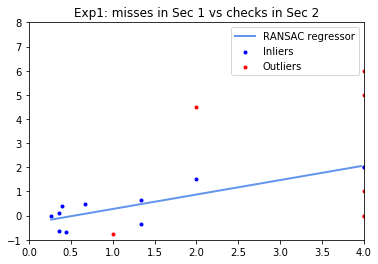

#miss 2
#check_c [ 3  7  9  5  9  4  0  6  2  1  5  3  6 16  8  6  0  2]
#check_p [ 1 10 11  4 14  5  0  6  2  1  8  0  3 13  0  4  2  2]
Estimated coefficients (true,RANSAC): 0.103754396125 0.2 3.0


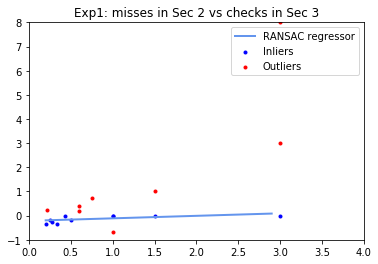

#miss 0
#check_c [ 1  3  7  6 14  6  0  2  2  1  1  1  7  7  5 13  0  2]
#check_p [ 3  7  9  5  9  4  0  6  2  1  5  3  6 16  8  6  0  2]
Estimated coefficients (true,RANSAC): 0.332868543082 0.0588235294118 1.0


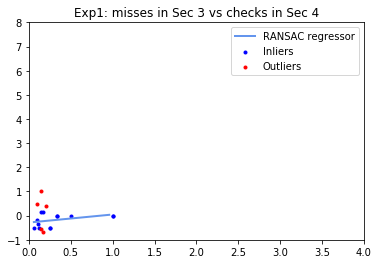

#miss 0
#check_c [ 7  6  8  6 10  5  0  5  3  3  5  0  6  8  1  6  4  1]
#check_p [ 1  3  7  6 14  6  0  2  2  1  1  1  7  7  5 13  0  2]
Estimated coefficients (true,RANSAC): 4.69642868915 0.0666666666667 1.0


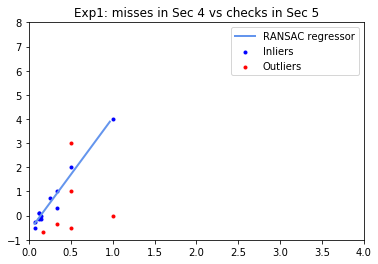

#miss 2
#check_c [ 7  6  7  5 15  5  0  1  1  2  6  0  3  9  2 16  9  2]
#check_p [ 7  6  8  6 10  5  0  5  3  3  5  0  6  8  1  6  4  1]
Estimated coefficients (true,RANSAC): -0.000137371346451 0.272727272727 3.0


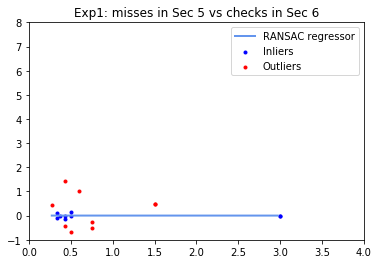

#miss 2
#check_c [ 5  3  8  4 16  5  0  4  0  0  4  2  5  5  0  8  2  3]
#check_p [ 7  6  7  5 15  5  0  1  1  2  6  0  3  9  2 16  9  2]
Estimated coefficients (true,RANSAC): 1.65651267509 0.176470588235 3.0


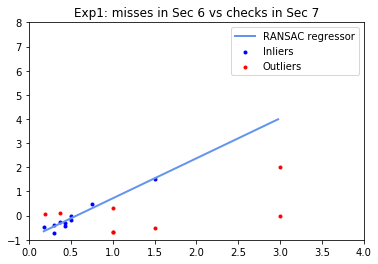

#miss 0
#check_c [ 3  3  5  4 17  5  0  3  0  3  4  1  2  6  0  5  8  2]
#check_p [ 5  3  8  4 16  5  0  4  0  0  4  2  5  5  0  8  2  3]
Estimated coefficients (true,RANSAC): 0.0499292897871 0.0588235294118 1.0


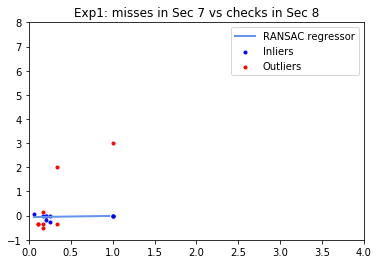

#miss 2
#check_c [ 5  0  0  2  5  0  1 14  9 10  8  0  6  2  9  8  7  4]
#check_p [ 6  0  1  1  4  1  1 10  2 12 11  4  8  2 12  0  6  7]
Estimated coefficients (true,RANSAC): 0.544836470371


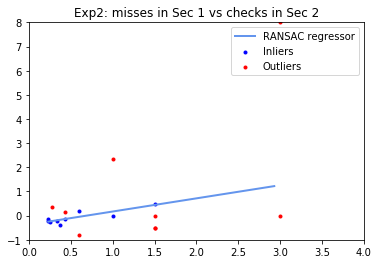

#miss 2
#check_c [ 7  2  0  2  6  1  1 18  3  7  5  0  5  3  8 11  5  0]
#check_p [ 5  0  0  2  5  0  1 14  9 10  8  0  6  2  9  8  7  4]
Estimated coefficients (true,RANSAC): 0.0669109066166


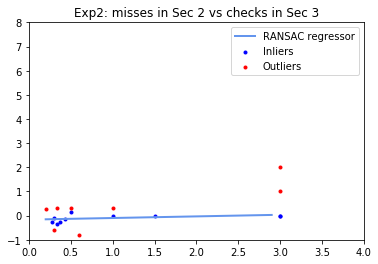

#miss 0
#check_c [ 5  1  0  2  4  1  1 12  3  5  3  0  2  3  5 10  5  0]
#check_p [ 7  2  0  2  6  1  1 18  3  7  5  0  5  3  8 11  5  0]
Estimated coefficients (true,RANSAC): -0.0


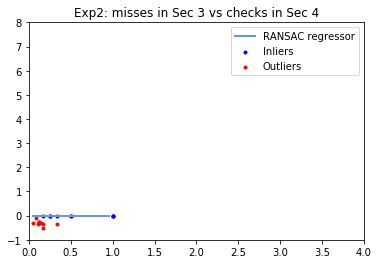

#miss 0
#check_c [ 4  1  0  2  5  0  1 16  7  6  0  0  7  2  5  8  5  0]
#check_p [ 5  1  0  2  4  1  1 12  3  5  3  0  2  3  5 10  5  0]
Estimated coefficients (true,RANSAC): 0.131232217458


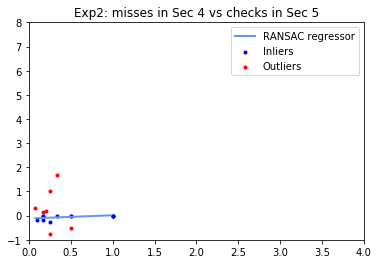

#miss 3
#check_c [ 7  0  0  4  6  2 10 11  5  7  8  0  6  3  5  8  5  0]
#check_p [ 4  1  0  2  5  0  1 16  7  6  0  0  7  2  5  8  5  0]
Estimated coefficients (true,RANSAC): 0.589657720234


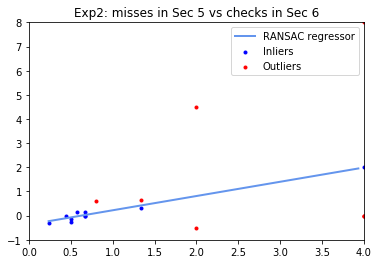

#miss 2
#check_c [ 2  0  0  5  3  2  4 16  7 10  3  0  3  4  3  4  9  0]
#check_p [ 7  0  0  4  6  2 10 11  5  7  8  0  6  3  5  8  5  0]
Estimated coefficients (true,RANSAC): 0.178458970785


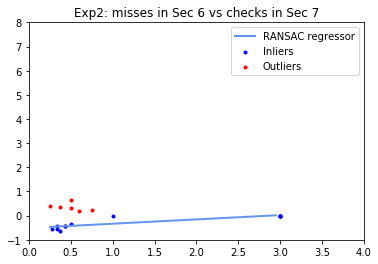

#miss 0
#check_c [ 3  2  0  4  4  2  4 19 12 11  2  0  1  3  4  5  4  0]
#check_p [ 2  0  0  5  3  2  4 16  7 10  3  0  3  4  3  4  9  0]
Estimated coefficients (true,RANSAC): -0.185598366975


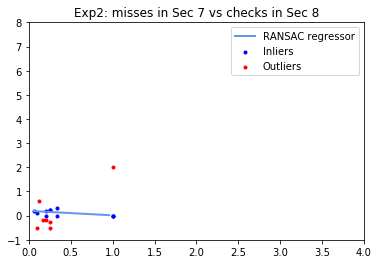

Wilcoxon rank-sum test (independent): section[A2 B1 C2 D1] VS section[B2 C1 D2]
Hi check exp1 Mean: 4.83333333333  Std: 4.18330013267  Median: 4.0
Lo check exp1 Mean: 4.31481481481  Std: 3.60464758679  Median: 4.0
RanksumsResult(statistic=0.43381873793676673, pvalue=0.66442007353610266) 

Hi check exp2 Mean: 4.66666666667  Std: 3.99652626943  Median: 4.0
Lo check exp2 Mean: 3.90740740741  Std: 4.06096375406  Median: 3.0
RanksumsResult(statistic=1.3285698849313481, pvalue=0.18398991304020007) 

Wilcoxon signed-rank test (pairwise): section[A2 B1 C2] VS section[B2 C1 D2]
Hi check exp1 Mean: 5.07407407407  Std: 4.28974596439  Median: 4.5
Lo check exp1 Mean: 4.31481481481  Std: 3.60464758679  Median: 4.0
WilcoxonResult(statistic=315.5, pvalue=0.13284030145650025) 

Hi check exp2 Mean: 4.83333333333  Std: 3.97562014729  Median: 5.0
Lo check exp2 Mean: 3.90740740741  Std: 4.06096375406  Median: 3.0
WilcoxonResult(statistic=187.0, pvalue=0.01264531040093188) 



In [6]:
display(Markdown('## RQ3b Number of checks on residents vs system performance'))
display(Markdown('### Number of checks between high/low false alert rate'))

# exp1 within population: high/low false rate
exp1_check_hifalse = exp1_check[:, np.r_[0:4]].T.ravel()
exp1_check_lofalse = exp1_check[:, np.r_[4:8]].T.ravel()
print('Sections in exp1 with high FA: Mean:', exp1_check_hifalse.mean(),' std:',exp1_check_hifalse.std(),' Median:',np.median(exp1_check_hifalse))
print('Sections in exp1 with low FA: Mean:',exp1_check_lofalse.mean(),' std:',exp1_check_lofalse.std(),' Median:',np.median(exp1_check_lofalse))
print(sp.wilcoxon(exp1_check_hifalse,exp1_check_lofalse))

# exp2 within population: high/low false rate
exp2_check_hifalse = exp2_check[:, np.r_[0:4]].T.ravel()
exp2_check_lofalse = exp2_check[:, np.r_[4:8]].T.ravel()
print('Sections in exp2 with high FA: Mean:', exp2_check_hifalse.mean(),' std:',exp2_check_hifalse.std(),' Median:',np.median(exp2_check_hifalse))
print('Sections in exp2 with low FA: Mean:',exp2_check_lofalse.mean(),' std:',exp2_check_lofalse.std(),' Median:',np.median(exp2_check_lofalse))
print(sp.wilcoxon(exp2_check_hifalse,exp2_check_lofalse))

# within population: high/low false rate
exp_check_hifalse = exp_check[:, np.r_[0:4]].T.ravel()
exp_check_lofalse = exp_check[:, np.r_[4:8]].T.ravel()
print('Sections with high FA: Mean:', exp_check_hifalse.mean(),' std:',exp_check_hifalse.std(),' Median:',np.median(exp_check_hifalse))
print('Sections with low FA: Mean:',exp_check_lofalse.mean(),' std:',exp_check_lofalse.std(),' Median:',np.median(exp_check_lofalse))
print(sp.wilcoxon(exp_check_hifalse,exp_check_lofalse))

display(Markdown('### Number of checks with/without missed events'))

# exp1 within population with/without misses
exp1_check_misses = np.hstack((exp1_check[:,0],exp1_check[:,1],exp1_check[:,4],exp1_check[:,5]))
exp1_check_nomisses = np.hstack((exp1_check[:,2],exp1_check[:,3],exp1_check[:,6],exp1_check[:,7]))
print('Sections in exp1 with Misses: Mean:',exp1_check_misses.mean(),' std:',exp1_check_misses.std(),' Median:',np.median(exp1_check_misses))
print('Sections in exp1 without Misses: Mean:',exp1_check_nomisses.mean(),' std:',exp1_check_nomisses.std(),' Median:',np.median(exp1_check_nomisses))
print(sp.wilcoxon(exp1_check_misses,exp1_check_nomisses))

# exp2 within population with/without misses
exp2_check_misses = np.hstack((exp2_check[:,0],exp2_check[:,1],exp2_check[:,4],exp2_check[:,5]))
exp2_check_nomisses = np.hstack((exp2_check[:,2],exp2_check[:,3],exp2_check[:,6],exp2_check[:,7]))
print('Sections in exp2 with Misses: Mean:',exp2_check_misses.mean(),' std:',exp2_check_misses.std(),' Median:',np.median(exp2_check_misses))
print('Sections in exp2 without Misses: Mean:',exp2_check_nomisses.mean(),' std:',exp2_check_nomisses.std(),' Median:',np.median(exp2_check_nomisses))
print(sp.wilcoxon(exp2_check_misses,exp2_check_nomisses))

# within population with/without misses
exp_check_misses = np.hstack((exp_check[:,0],exp_check[:,1],exp_check[:,4],exp_check[:,5]))
exp_check_nomisses = np.hstack((exp_check[:,2],exp_check[:,3],exp_check[:,6],exp_check[:,7]))
print('Sections with Misses: Mean:',exp_check_misses.mean(),' std:',exp_check_misses.std(),' Median:',np.median(exp_check_misses))
print('Sections without Misses: Mean:',exp_check_nomisses.mean(),' std:',exp_check_nomisses.std(),' Median:',np.median(exp_check_nomisses))
print(sp.wilcoxon(exp_check_misses,exp_check_nomisses))

display(Markdown('### Number of checks vs missed events in the previous segment.'))
display(Markdown('Wilcoxon signed-ranked test for number of checks in consecutive segments.'))

# pearson correlation

for sec_i in range(7):
    exp_check_1st=exp_check[:n_participant-1,sec_i]
    exp_check_2nd=exp_check[:n_participant-1,sec_i+1]
    print('Exp1: Sec',sec_i+1,' Mean:',exp_check_1st.mean(),' Std:',exp_check_1st.std(),' Median:',np.median(exp_check_1st))
    print('Exp1: Sec',sec_i+2,' Mean:',exp_check_2nd.mean(),' Std:',exp_check_2nd.std(),' Median:',np.median(exp_check_2nd))
    print(sp.wilcoxon(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel()),'\n')

for sec_i in range(7):
    exp_check_1st=exp_check[n_participant-1:,sec_i]
    exp_check_2nd=exp_check[n_participant-1:,sec_i+1]
    print('Exp2: Sec',sec_i+1,' Mean:',exp_check_1st.mean(),' Std:',exp_check_1st.std(),' Median:',np.median(exp_check_1st))
    print('Exp2: Sec',sec_i+2,' Mean:',exp_check_2nd.mean(),' Std:',exp_check_2nd.std(),' Median:',np.median(exp_check_2nd))
    print(sp.wilcoxon(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel()),'\n')

# display(Markdown('### Correlation for number of checks in consecutive segments.'))

# # pearson correlation

# for sec_i in range(7):
#     exp_check_1st=exp_check[:n_participant-1,sec_i]
#     exp_check_2nd=exp_check[:n_participant-1,sec_i+1]
#     print('Exp1: Sec',sec_i+1,' Mean:',exp_check_1st.mean(),' Std:',exp_check_1st.std())
#     print('Exp1: Sec',sec_i+2,' Mean:',exp_check_2nd.mean(),' Std:',exp_check_2nd.std())
#     pear_ = sp.pearsonr(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel())
#     print('PearsonrResult(correlation=',pear_[0],', pvalue=',pear_[1],sep='')
#     print(sp.spearmanr(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel()),'\n')

# for sec_i in range(7):
#     exp_check_1st=exp_check[n_participant-1:,sec_i]
#     exp_check_2nd=exp_check[n_participant-1:,sec_i+1]
#     print('Exp2: Sec',sec_i+1,sec_i+2)
#     print('Exp1: Sec',sec_i+1,' Mean:',exp_check_1st.mean(),' Std:',exp_check_1st.std())
#     print('Exp1: Sec',sec_i+2,' Mean:',exp_check_2nd.mean(),' Std:',exp_check_2nd.std())
#     pear_ = sp.pearsonr(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel())
#     print('PearsonrResult(correlation=',pear_[0],', pvalue=',pear_[1],sep='')
#     print(sp.spearmanr(exp_check_1st.T.ravel(), exp_check_2nd.T.ravel()),'\n')

display(Markdown('### plots for number of checks in consecutive segments.'))

# Correlation between # Checks and previous misses

num_miss = np.array([3,2,0,0,2,2,0])

for sec_i in range(7):
    sys = (num_miss[sec_i]+1)/(exp1_check[:,sec_i]+1)
    check_chgs = (exp1_check[:,sec_i+1]-exp1_check[:,sec_i])/(exp1_check[:,sec_i]+1)
    print('#miss',num_miss[sec_i])
    print('#check_c',exp1_check[:,sec_i+1])
    print('#check_p',exp1_check[:,sec_i])

    sys = sys.reshape((-1,1))
    check_chgs = check_chgs.reshape((-1,1))
    
    # Robustly fit linear model with RANSAC algorithm
    ransac = linear_model.RANSACRegressor(random_state=1)
    ransac.fit(sys, check_chgs)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    
    # Predict data of estimated models
    line_X = np.arange(sys.min(), sys.max(),0.1)[:, np.newaxis]
    line_y_ransac = ransac.predict(line_X)
    
    print('Estimated coefficients (true,RANSAC):', ransac.estimator_.coef_[0][0], sys.min(), sys.max())

    plt.figure()
    axes = plt.gca()
    axes.set_ylim([-1,8])
    axes.set_xlim([0,4])
    plt.scatter(sys[inlier_mask], check_chgs[inlier_mask], color='blue', marker='.', label='Inliers')
    plt.scatter(sys[outlier_mask], check_chgs[outlier_mask], color='red', marker='.', label='Outliers')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=2, label='RANSAC regressor')
    plt.legend(loc='upper right')

    plt.title('Exp1: misses in Sec %s vs checks in Sec %s' %(sec_i+1,sec_i+2))   
    plt.show()

num_miss = np.array([2,2,0,0,3,2,0])

for sec_i in range(7):
    sys = (num_miss[sec_i]+1)/(exp2_check[:,sec_i]+1)
    check_chgs = (exp2_check[:,sec_i+1]-exp2_check[:,sec_i])/(exp2_check[:,sec_i]+1)
    print('#miss',num_miss[sec_i])
    print('#check_c',exp2_check[:,sec_i+1])
    print('#check_p',exp2_check[:,sec_i])
    
    sys = sys.reshape((-1,1))
    check_chgs = check_chgs.reshape((-1,1))
    
    # Robustly fit linear model with RANSAC algorithm
    ransac = linear_model.RANSACRegressor(random_state=1)
    ransac.fit(sys, check_chgs)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    print('Estimated coefficients (true,RANSAC):', ransac.estimator_.coef_[0][0])

    # Predict data of estimated models
    line_X = np.arange(sys.min(), sys.max(),0.1)[:, np.newaxis]
    line_y_ransac = ransac.predict(line_X)
    plt.figure()
    axes = plt.gca()
    axes.set_ylim([-1,8])
    axes.set_xlim([0,4])
    plt.scatter(sys[inlier_mask], check_chgs[inlier_mask], color='blue', marker='.', label='Inliers')
    plt.scatter(sys[outlier_mask], check_chgs[outlier_mask], color='red', marker='.', label='Outliers')
    plt.plot(line_X, line_y_ransac, color='cornflowerblue', linewidth=2, label='RANSAC regressor')
    plt.legend(loc='upper right')
    
    plt.title('Exp2: misses in Sec %s vs checks in Sec %s' %(sec_i+1,sec_i+2))   
    plt.show()

print('Wilcoxon rank-sum test (independent): section[A2 B1 C2 D1] VS section[B2 C1 D2]')

hi_miss_check1 = exp1_check[:, np.r_[1,2,5,6]].T.ravel()
lo_miss_check1 = exp1_check[:, np.r_[3,4,7]].T.ravel()
hi_miss_check2 = exp2_check[:, np.r_[1,2,5,6]].T.ravel()
lo_miss_check2 = exp2_check[:, np.r_[3,4,7]].T.ravel()

print('Hi check exp1 Mean:',hi_miss_check1.mean(),' Std:',hi_miss_check1.std(),' Median:',np.median(hi_miss_check1))
print('Lo check exp1 Mean:',lo_miss_check1.mean(),' Std:',lo_miss_check1.std(),' Median:',np.median(lo_miss_check1))
print(sp.ranksums(hi_miss_check1, lo_miss_check1),'\n')
print('Hi check exp2 Mean:',hi_miss_check2.mean(),' Std:',hi_miss_check2.std(),' Median:',np.median(hi_miss_check2))
print('Lo check exp2 Mean:',lo_miss_check2.mean(),' Std:',lo_miss_check2.std(),' Median:',np.median(lo_miss_check2))
print(sp.ranksums(hi_miss_check2, lo_miss_check2),'\n') 

print('Wilcoxon signed-rank test (pairwise): section[A2 B1 C2] VS section[B2 C1 D2]')

hi_miss_check1 = exp1_check[:, np.r_[1,2,5]].T.ravel()
lo_miss_check1 = exp1_check[:, np.r_[3,4,7]].T.ravel()
hi_miss_check2 = exp2_check[:, np.r_[1,2,5]].T.ravel()
lo_miss_check2 = exp2_check[:, np.r_[3,4,7]].T.ravel()

print('Hi check exp1 Mean:',hi_miss_check1.mean(),' Std:',hi_miss_check1.std(),' Median:',np.median(hi_miss_check1))
print('Lo check exp1 Mean:',lo_miss_check1.mean(),' Std:',lo_miss_check1.std(),' Median:',np.median(lo_miss_check1))
print(sp.wilcoxon(hi_miss_check1, lo_miss_check1),'\n')
print('Hi check exp2 Mean:',hi_miss_check2.mean(),' Std:',hi_miss_check2.std(),' Median:',np.median(hi_miss_check2))
print('Lo check exp2 Mean:',lo_miss_check2.mean(),' Std:',lo_miss_check2.std(),' Median:',np.median(lo_miss_check2))
print(sp.wilcoxon(hi_miss_check2, lo_miss_check2),'\n') 

In [7]:
display(Markdown('## RQ3c Admin task performance & system performance'))

print('\nEarnings: Between high FAs and low FAs')
Earnings_admin_1 = exp1_Earnings_admin[:, np.r_[0,1,2,3]].T.ravel()
Earnings_admin_2 = exp1_Earnings_admin[:, np.r_[4,5,6,7]].T.ravel()
print('High FAs exp1 Mean:',Earnings_admin_1.mean(),' Std:',Earnings_admin_1.std(),' Median:',np.median(Earnings_admin_1))
print('Low FAs exp1 Mean:',Earnings_admin_2.mean(),' Std:',Earnings_admin_2.std(),' Median:',np.median(Earnings_admin_2))
print(sp.wilcoxon(Earnings_admin_1,Earnings_admin_2))

print('\nEarnings: Between high FAs and low FAs')
Earnings_admin_1 = exp2_Earnings_admin[:, np.r_[4,5,6,7]].T.ravel()
Earnings_admin_2 = exp2_Earnings_admin[:, np.r_[0,1,2,3]].T.ravel()
print('High FAs exp2 Mean:',Earnings_admin_1.mean(),' Std:',Earnings_admin_1.std(),' Median:',np.median(Earnings_admin_1))
print('Low FAs exp2 Mean:',Earnings_admin_2.mean(),' Std:',Earnings_admin_2.std(),' Median:',np.median(Earnings_admin_2))
print(sp.wilcoxon(Earnings_admin_1,Earnings_admin_2))

print('\nEarnings: Between high FAs and low FAs')
Earnings_admin_1 = Earnings_admin[:, np.r_[0,1,2,3]].T.ravel()
Earnings_admin_2 = Earnings_admin[:, np.r_[4,5,6,7]].T.ravel()
print('High FAs Mean:',Earnings_admin_1.mean(),' Std:',Earnings_admin_1.std(),' Median:',np.median(Earnings_admin_1))
print('Low FAs Mean:',Earnings_admin_2.mean(),' Std:',Earnings_admin_2.std(),' Median:',np.median(Earnings_admin_2))
print(sp.wilcoxon(Earnings_admin_1,Earnings_admin_2))

print('\nEarnings: Between with/without missed events')
Earnings_admin_1 = exp1_Earnings_admin[:, np.r_[0,2,4,6]].T.ravel()
Earnings_admin_2 = exp1_Earnings_admin[:, np.r_[1,3,5,7]].T.ravel()
print('With misses exp1 Mean:',Earnings_admin_1.mean(),' Std:',Earnings_admin_1.std(),' Median:',np.median(Earnings_admin_1))
print('No misses exp1 Mean:',Earnings_admin_2.mean(),' Std:',Earnings_admin_2.std(),' Median:',np.median(Earnings_admin_2))
print(sp.wilcoxon(Earnings_admin_1,Earnings_admin_2))

print('\nEarnings: Between with/without missed events')
Earnings_admin_1 = exp2_Earnings_admin[:, np.r_[0,2,4,6]].T.ravel()
Earnings_admin_2 = exp2_Earnings_admin[:, np.r_[1,3,5,7]].T.ravel()
print('With misses exp2 Mean:',Earnings_admin_1.mean(),' Std:',Earnings_admin_1.std(),' Median:',np.median(Earnings_admin_1))
print('No misses exp2 Mean:',Earnings_admin_2.mean(),' Std:',Earnings_admin_2.std(),' Median:',np.median(Earnings_admin_2))
print(sp.wilcoxon(Earnings_admin_1,Earnings_admin_2))

print('\nEarnings: Between with/without missed events')
Earnings_admin_1 = Earnings_admin[:, np.r_[0,2,4,6]].T.ravel()
Earnings_admin_2 = Earnings_admin[:, np.r_[1,3,5,7]].T.ravel()
print('With misses Mean:',Earnings_admin_1.mean(),' Std:',Earnings_admin_1.std(),' Median:',np.median(Earnings_admin_1))
print('No misses Mean:',Earnings_admin_2.mean(),' Std:',Earnings_admin_2.std(),' Median:',np.median(Earnings_admin_2))
print(sp.wilcoxon(Earnings_admin_1,Earnings_admin_2))

print('\n# Admin tasks: Between high FAs and low FAs')
admin_1 = exp1_admin[:, np.r_[0,1,2,3]].T.ravel()
admin_2 = exp1_admin[:, np.r_[4,5,6,7]].T.ravel()
print('High FAs exp1 Mean:',admin_1.mean(),' Std:',admin_1.std(),' Median:',np.median(admin_1))
print('Low FAs exp1 Mean:',admin_2.mean(),' Std:',admin_2.std(),' Median:',np.median(admin_2))
print(sp.wilcoxon(Earnings_admin_1,Earnings_admin_2))

print('\n# Admin tasks: Between high FAs and low FAs')
admin_1 = exp2_admin[:, np.r_[4,5,6,7]].T.ravel()
admin_2 = exp2_admin[:, np.r_[0,1,2,3]].T.ravel()
print('High FAs exp2 Mean:',admin_1.mean(),' Std:',admin_1.std(),' Median:',np.median(admin_1))
print('Low FAs exp2 Mean:',admin_2.mean(),' Std:',admin_2.std(),' Median:',np.median(admin_2))
print(sp.wilcoxon(Earnings_admin_1,Earnings_admin_2))

print('\n# Admin tasks: Between high FAs and low FAs')
admin_1 = exp_admin[:, np.r_[0,1,2,3]].T.ravel()
admin_2 = exp_admin[:, np.r_[4,5,6,7]].T.ravel()
print('High FAs Mean:',admin_1.mean(),' Std:',admin_1.std(),' Median:',np.median(admin_1))
print('Low FAs Mean:',admin_2.mean(),' Std:',admin_2.std(),' Median:',np.median(admin_2))
print(sp.wilcoxon(Earnings_admin_1,Earnings_admin_2))

print('\n# Admin tasks: Between with/without missed events')
admin_1 = exp1_admin[:, np.r_[0,2,4,6]].T.ravel()
admin_2 = exp1_admin[:, np.r_[1,3,5,7]].T.ravel()
print('With misses exp1 Mean:',admin_1.mean(),' Std:',admin_1.std(),' Median:',np.median(admin_1))
print('No misses exp1 Mean:',admin_2.mean(),' Std:',admin_2.std(),' Median:',np.median(admin_2))
print(sp.wilcoxon(admin_1,admin_2))

print('\n# Admin tasks: Between with/without missed events')
admin_1 = exp2_admin[:, np.r_[0,2,4,6]].T.ravel()
admin_2 = exp2_admin[:, np.r_[1,3,5,7]].T.ravel()
print('With misses exp2 Mean:',admin_1.mean(),' Std:',admin_1.std(),' Median:',np.median(admin_1))
print('No misses exp2 Mean:',admin_2.mean(),' Std:',admin_2.std(),' Median:',np.median(admin_2))
print(sp.wilcoxon(admin_1,admin_2))

print('\n# Admin tasks: Between with/without missed events')
admin_1 = exp_admin[:, np.r_[0,2,4,6]].T.ravel()
admin_2 = exp_admin[:, np.r_[1,3,5,7]].T.ravel()
print('With misses Mean:',admin_1.mean(),' Std:',admin_1.std(),' Median:',np.median(admin_1))
print('No misses Mean:',admin_2.mean(),' Std:',admin_2.std(),' Median:',np.median(admin_2))
print(sp.wilcoxon(admin_1,admin_2))

## RQ3c Admin task performance & system performance


Earnings: Between high FAs and low FAs
High FAs exp1 Mean: 140.819444444  Std: 36.5647547316  Median: 146.5
Low FAs exp1 Mean: 150.652777778  Std: 43.2130252105  Median: 161.0
WilcoxonResult(statistic=753.0, pvalue=0.002624685459117565)

Earnings: Between high FAs and low FAs
High FAs exp2 Mean: 152.583333333  Std: 24.4055719958  Median: 151.0
Low FAs exp2 Mean: 156.763888889  Std: 20.4908469102  Median: 157.5
WilcoxonResult(statistic=1020.5, pvalue=0.099499490501821691)

Earnings: Between high FAs and low FAs
High FAs Mean: 146.701388889  Std: 31.6370650813  Median: 148.5
Low FAs Mean: 153.708333333  Std: 33.9552145807  Median: 158.5
WilcoxonResult(statistic=3519.5, pvalue=0.0010303924980629437)

Earnings: Between with/without missed events
With misses exp1 Mean: 143.513888889  Std: 39.5302250941  Median: 155.0
No misses exp1 Mean: 147.958333333  Std: 40.9899843797  Median: 155.0
WilcoxonResult(statistic=939.5, pvalue=0.10897368732699463)

Earnings: Between with/without missed events

In [8]:
display(Markdown('# RQ4 User Behaviour versus Self-reported Trust'))
display(Markdown('## RQ4a Proportion of attends and self-reported trust'))
display(Markdown('### Correlation between Number of Attended Events and Trust Scores'))

# spearman correlation
print(sp.spearmanr(exp_trust.T.ravel(), exp_attend.T.ravel()))

display(Markdown('### Correlation between Proportion of Attended Alerts and Trust Scores'))

# spearman correlation
print(sp.spearmanr(exp_trust.T.ravel(), exp_attend_alert_prop.T.ravel()))

display(Markdown('### Correlation between Proportion of Attended False Alerts and Trust Scores'))

# spearman correlation
print(sp.spearmanr(exp_trust.T.ravel(), exp_attendf_prop.T.ravel()))

display(Markdown('## RQ4b Number of checks on residents versus self-reported trust'))
display(Markdown('### Correlation between Number of Checks and Trust Scores'))

# spearman correlation
print(sp.spearmanr(exp_trust.T.ravel(), exp_check.T.ravel()))

display(Markdown('## RQ4c Changes in OK reports vs behaviour and self-reported trust'))
# display(Markdown('### Correlation between Number of Checks and Trust Scores'))

# Correlation between selected report frequency and Number of attends
# Correlation between selected report frequency and Number of checks
# Correlation between selected report frequency and Trust Scores

# count of frequency changes
freq_type = ['Disabled','Low','High']
freq_cnt = {key: 0 for key in freq_type}
freq_cnt.update(Counter(exp_freq.ravel()))
print(freq_cnt)

def HLD(exp_, exp_freq, sec_idx=0):
    if sec_idx==0:
        exp_ = exp_[:, np.r_[0,2,4,6]].T.ravel()
    else:
        exp_ = exp_[:, np.r_[1,3,5,7]].T.ravel()
        
    exp_H = exp_[exp_freq.T.ravel()=='High']
    exp_LD = exp_[exp_freq.T.ravel()!='High']
    print('H Mean:',exp_H.mean(),' Std:',exp_H.std(),' Median:',np.median(exp_H))
    print('LD Mean:',exp_LD.mean(),' Std:',exp_LD.std(),' Median:',np.median(exp_LD))
    print(sp.ranksums(exp_H, exp_LD),'\n')

print('\nWith previous section\n')
print('Proportion Alert:')
HLD(exp_attend_alert_prop, exp_freq,0)
print('# Check:')
HLD(exp_check, exp_freq,0)
print('Proportion attended False Alert:')
HLD(exp_attendf_prop, exp_freq,0)

print('\nWith next section\n')
print('Proportion Alert:')
HLD(exp_attend_alert_prop, exp_freq,1)
print('# Check:')
HLD(exp_check, exp_freq,1)
print('Proportion attended False Alert:')
HLD(exp_attendf_prop, exp_freq,1)


# RQ4 User Behaviour versus Self-reported Trust

## RQ4a Proportion of attends and self-reported trust

### Correlation between Number of Attended Events and Trust Scores

SpearmanrResult(correlation=0.087234605779643398, pvalue=0.13972960838964399)


### Correlation between Proportion of Attended Alerts and Trust Scores

SpearmanrResult(correlation=0.11962199909186257, pvalue=0.042507881685231806)


### Correlation between Proportion of Attended False Alerts and Trust Scores

SpearmanrResult(correlation=-0.36084063475319961, pvalue=2.7737048771706775e-10)


## RQ4b Number of checks on residents versus self-reported trust

### Correlation between Number of Checks and Trust Scores

SpearmanrResult(correlation=0.13062483676714454, pvalue=0.026647558055093695)


## RQ4c Changes in OK reports vs behaviour and self-reported trust

{'Disabled': 23, 'Low': 38, 'High': 83}

With previous section

Proportion Alert:
H Mean: 0.861724207755  Std: 0.209787901184  Median: 0.941176470588
LD Mean: 0.779067364651  Std: 0.279430760527  Median: 0.95
RanksumsResult(statistic=0.80455499345525494, pvalue=0.42107652258702033) 

# Check:
H Mean: 4.68674698795  Std: 4.10385569758  Median: 4.0
LD Mean: 3.96721311475  Std: 3.77205954578  Median: 4.0
RanksumsResult(statistic=1.0895857825939257, pvalue=0.27589564865841099) 

Proportion attended False Alert:
H Mean: 0.173650768035  Std: 0.0642627058715  Median: 0.153846153846
LD Mean: 0.195356356383  Std: 0.0611747596314  Median: 0.227272727273
RanksumsResult(statistic=-2.3146117274026805, pvalue=0.020634190493544802) 


With next section

Proportion Alert:
H Mean: 0.854424420371  Std: 0.22293973962  Median: 0.941176470588
LD Mean: 0.763052762088  Std: 0.290275904238  Median: 0.941176470588
RanksumsResult(statistic=1.603045502035219, pvalue=0.10892460859361386) 

# Check:
H Mean: 4.5542

In [9]:
display(Markdown('## RQ5. User behaviour versus self-perceived behaviour'))
display(Markdown('How often did you attend to the system\'s alerts?'))
# Answers to Q1
pstq_Q1 = exp_pstq[:,np.arange(0,40,10)].ravel()
# sum of attend proportion of two sections within the same system
sum_attend_prop = np.sum(exp_attend_alert_prop.reshape((-1, 2)), axis=1)  
# spearman correlation
print(sp.spearmanr(pstq_Q1, sum_attend_prop))

display(Markdown('How often did you check on the residents?'))
# Answers to Q1
pstq_Q2 = exp_pstq[:,np.arange(1,40,10)].ravel()
# sum of attend proportion of two sections within the same system
sum_check = np.sum(exp_check.reshape((-1, 2)), axis=1)  
# spearman correlation
print(sp.spearmanr(pstq_Q2, sum_check))

## RQ5. User behaviour versus self-perceived behaviour

How often did you attend to the system's alerts?

SpearmanrResult(correlation=0.45824009753104111, pvalue=7.6805286705102433e-09)


How often did you check on the residents?

SpearmanrResult(correlation=0.66869538927117345, pvalue=5.2610518568611009e-20)


## RQ6. Confidence in user-system team performance

Q5: I know how to use this monitoring system to perform well (even if I don't know exactly how it works)
Overall Mean: 3.76388888889  Std: 0.790447404174  Median: 4.0


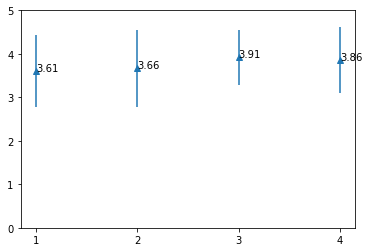

correlation with loss from monitoring task
SpearmanrResult(correlation=0.189997993516934, pvalue=0.022553002203318732) 

correlation with # attended events from monitoring task
SpearmanrResult(correlation=0.1376647281188019, pvalue=0.099882614816064003) 

correlation with proportion of attend from monitoring task
SpearmanrResult(correlation=0.13764074776548613, pvalue=0.099942264559438443) 

correlation with # check from monitoring task
SpearmanrResult(correlation=0.15282144939904679, pvalue=0.067454892621611154) 

Q6: I know how to use this monitoring system to take care of the residents (even if I don't know exactly how it works)
Overall Mean: 3.74305555556  Std: 0.761454454188  Median: 4.0


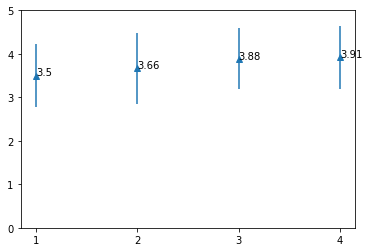

correlation with loss from monitoring task
SpearmanrResult(correlation=0.27531280259832741, pvalue=0.00083856104527179698) 

correlation with # attended events from monitoring task
SpearmanrResult(correlation=0.13320021971886728, pvalue=0.11148081409546325) 

correlation with proportion of attend from monitoring task
SpearmanrResult(correlation=0.12632954641934127, pvalue=0.13135146158901539) 

correlation with # check from monitoring task
SpearmanrResult(correlation=0.081527487497958934, pvalue=0.33133840917317958) 

Q10: My decisions were the most appropriate ones
Overall Mean: 3.79166666667  Std: 0.695970545354  Median: 4.0


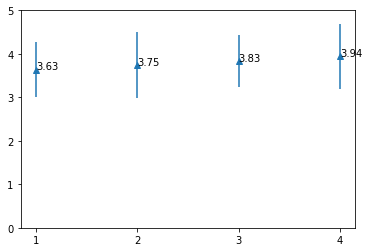

correlation with loss from monitoring task
SpearmanrResult(correlation=0.17657047455700398, pvalue=0.03425626734910206) 

correlation with # attended events from monitoring task
SpearmanrResult(correlation=0.075022697053551704, pvalue=0.37148970979237816) 

correlation with proportion of attend from monitoring task
SpearmanrResult(correlation=0.11363219939798389, pvalue=0.17506771304999169) 

correlation with # check from monitoring task
SpearmanrResult(correlation=0.13402987935721897, pvalue=0.10924941392862457) 

Spearman r between questions:
[[  0.      5.      6.     10.   ]
 [  5.      1.      0.675   0.405]
 [  6.      0.675   1.      0.46 ]
 [ 10.      0.405   0.46    1.   ]] 

Spearman p-value between questions:
[[  0.   5.   6.  10.]
 [  5.   1.   0.   0.]
 [  6.   0.   1.   0.]
 [ 10.   0.   0.   1.]]


In [10]:
display(Markdown('## RQ6. Confidence in user-system team performance'))
Q_id = np.array([5,6,10])-1 # read question list from Qs
pstq_id = np.array([])



for ids in Q_id: 
    pstq = exp_pstq[:,np.arange(ids,40,10)]
    pstq_id = np.hstack((pstq_id, pstq.ravel()))
    
    print('Q',ids+1,': ',Qs[ids],sep="")
    print('Overall Mean:', pstq.mean(),' Std:',pstq.std(),' Median:',np.median(pstq))
    
    y = np.array(pstq.mean(axis=0))
    e = np.array(pstq.std(axis=0))
    x = np.arange(len(y))+1
    
    plt.errorbar(x, y, e, linestyle='None', marker='^')
    plt.xticks(np.arange(min(x), max(x)+1, 1))
    plt.yticks(np.arange(6))
    axes = plt.gca()
    for xy in zip(x, y):
        axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
    plt.show()
    print('correlation with loss from monitoring task')
    print(sp.spearmanr(pstq.ravel(), np.sum(Total_loss.reshape((-1, 2)),axis=1)),'\n')
    print('correlation with # attended events from monitoring task')
    print(sp.spearmanr(pstq.ravel(), np.sum(exp_attend.reshape((-1, 2)),axis=1)),'\n')    
    print('correlation with proportion of attend from monitoring task')
    print(sp.spearmanr(pstq.ravel(), np.sum(exp_attend_alert_prop.reshape((-1, 2)),axis=1)),'\n')
    print('correlation with # check from monitoring task')
    print(sp.spearmanr(pstq.ravel(), np.sum(exp_check.reshape((-1, 2)),axis=1)),'\n')

pstq_id = pstq_id.reshape((-1,len(pstq.ravel())))
    
def corrcoefp(matrix):
    rows, cols = matrix.shape[0], matrix.shape[1]
    r = np.ones(shape=(rows, rows))
    p = np.ones(shape=(rows, rows))
    for i in range(rows):
        for j in range(i+1, rows):
            #r_, p_ = sp.pearsonr(matrix[i], matrix[j])
            r_, p_ = sp.spearmanr(matrix[i], matrix[j])
            r[i, j] = r[j, i] = np.around(r_, decimals=5)
            p[i, j] = p[j, i] = p_
    return r, p

r,p = corrcoefp(pstq_id)

r = np.vstack((Q_id+1,r))
r = np.hstack((np.insert(Q_id+1,0,0)[np.newaxis].T,r)) # note: need to add one more dimension so it can transpose
p = np.vstack((Q_id+1,p))
p = np.hstack((np.insert(Q_id+1,0,0)[np.newaxis].T,p))         
print('Spearman r between questions:')
print(np.around(r, decimals=3),'\n')
print('Spearman p-value between questions:')
print(np.around(p, decimals=3))

## RQ7 Number of Admin Tasks and Earnings from Admin Tasks

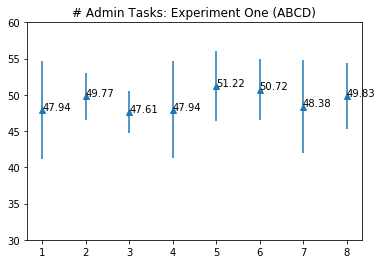

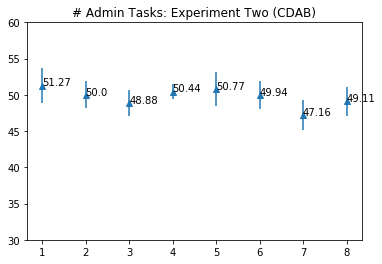

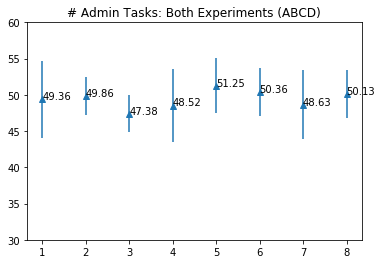

### Correlation between # Attended Admins vs proportion of Attended Alerts

PearsonrResult(correlation=0.0147528723053, pvalue=0.803137018872
SpearmanrResult(correlation=0.099874988803230813, pvalue=0.090684870151549662)


### Correlation between # Attended Admins vs # Checks

PearsonrResult(correlation=-0.00457237783377, pvalue=0.938417692307
SpearmanrResult(correlation=-0.086654011855071739, pvalue=0.14239441422477239)


### Correlation between # Attended Admins vs # Attended events

PearsonrResult(correlation=-0.0165973515503, pvalue=0.779124028405
SpearmanrResult(correlation=-0.035970555433684784, pvalue=0.54319903178906315)


### Correlation between # Attended Admins vs # Attended Alerts

PearsonrResult(correlation=0.0311086715501, pvalue=0.599052901815
SpearmanrResult(correlation=0.068171904042508238, pvalue=0.24881752375667182)


### Correlation between % Correct Admins vs proportion of Attended Alerts

PearsonrResult(correlation=-0.00639808038743, pvalue=0.913910082571
SpearmanrResult(correlation=0.069385822949147608, pvalue=0.24047086868395268)


### Correlation between % Correct Admins vs # Checks

PearsonrResult(correlation=0.0287725599775, pvalue=0.626780225335
SpearmanrResult(correlation=-0.032508092231663899, pvalue=0.58271271226858778)


### Correlation between % Correct Admins vs # Attended events

PearsonrResult(correlation=-0.0171107585492, pvalue=0.772476141484
SpearmanrResult(correlation=-0.022686448103750225, pvalue=0.70144041852217276)


### Correlation between % Correct Admins vs # Attended Alerts

PearsonrResult(correlation=0.0174900072299, pvalue=0.76757602828
SpearmanrResult(correlation=0.046233337014033475, pvalue=0.4344428810586014)


In [11]:
display(Markdown('## RQ7 Number of Admin Tasks and Earnings from Admin Tasks'))

def plot_m_std(data,title,ylim):
    x = np.arange(8)+1
    y = np.array(data.mean(axis=0))
    e = np.array(data.std(axis=0))
    plt.errorbar(x, y, e, linestyle='None', marker='^')
    axes = plt.gca()
    axes.set_ylim(ylim)
    for xy in zip(x, y):
        axes.annotate('%.5s' % xy[1], xy=xy, textcoords='data')
    plt.title(title)    
    plt.show()
    
# exp1 mean & std
plot_m_std(exp1_admin,"# Admin Tasks: Experiment One (ABCD)",[30,60])
# exp2 mean & std
plot_m_std(exp2_admin,"# Admin Tasks: Experiment Two (CDAB)",[30,60])
# overall mean & std
plot_m_std(exp_admin,"# Admin Tasks: Both Experiments (ABCD)",[30,60])

def pe_sp(exp_data1,exp_data2):
    # pearson correlation
    pear_ = sp.pearsonr(exp_data1,exp_data2)
    print('PearsonrResult(correlation=',pear_[0],', pvalue=',pear_[1],sep='')
    print(sp.spearmanr(exp_data1,exp_data2))


display(Markdown('### Correlation between # Attended Admins vs proportion of Attended Alerts'))
pe_sp(exp_admin.T.ravel(), exp_attend_alert_prop.ravel())

display(Markdown('### Correlation between # Attended Admins vs # Checks'))
pe_sp(exp_admin.T.ravel(), exp_check.ravel())

display(Markdown('### Correlation between # Attended Admins vs # Attended events'))
pe_sp(exp_admin.T.ravel(), exp_attend.ravel())

display(Markdown('### Correlation between # Attended Admins vs # Attended Alerts'))
pe_sp(exp_admin.T.ravel(), exp_attend_alert.ravel())

display(Markdown('### Correlation between % Correct Admins vs proportion of Attended Alerts'))
pe_sp(exp_admin_c_prop.T.ravel(), exp_attend_alert_prop.ravel())

display(Markdown('### Correlation between % Correct Admins vs # Checks'))
pe_sp(exp_admin_c_prop.T.ravel(), exp_check.ravel())

display(Markdown('### Correlation between % Correct Admins vs # Attended events'))
pe_sp(exp_admin_c_prop.T.ravel(), exp_attend.ravel())

display(Markdown('### Correlation between % Correct Admins vs # Attended Alerts'))
pe_sp(exp_admin_c_prop.T.ravel(), exp_attend_alert.ravel())

## RQ7 Summary report of user stats

Averaged carer trust scores
Mean: 3.11805555556 Std: 0.601606965849  Median: 3.125 Max: 4.5 Min: 2.0


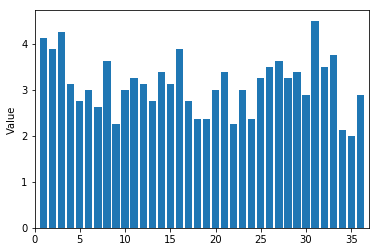

Averaged carer % attended events
Mean: 0.920882936508 Std: 0.142873633239  Median: 0.974107142857 Max: 1.0 Min: 0.352380952381


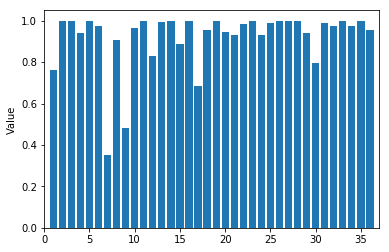

Averaged carer % attended alerts
Mean: 0.821214110644 Std: 0.200927117362  Median: 0.89787289916 Max: 1.0 Min: 0.358455882353


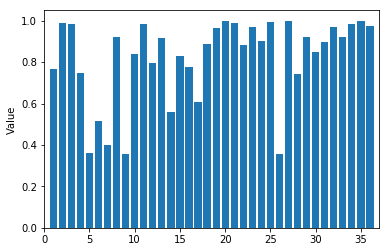

Averaged carer % attended high-risk alerts
Mean: 0.592105263158 Std: 0.369125266819  Median: 0.75 Max: 1.0 Min: 0.0


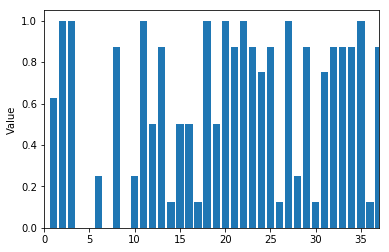

Averaged carer % attended low-risk alerts
Mean: 0.470394736842 Std: 0.360958850219  Median: 0.4375 Max: 1.0 Min: 0.0


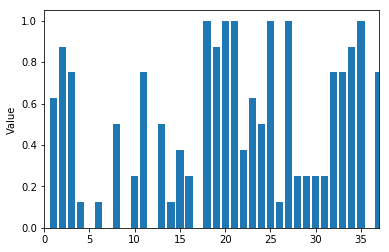

Averaged carer % attended high-risk events
Mean: 0.932043650794 Std: 0.137602997167  Median: 0.982142857143 Max: 1.0 Min: 0.446428571429


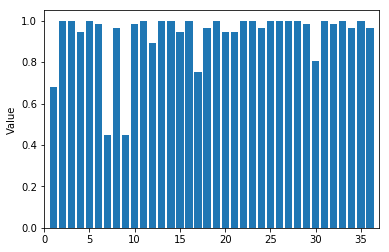

Averaged carer % attended low-risk events
Mean: 0.910280257937 Std: 0.153198681531  Median: 0.966517857143 Max: 1.0 Min: 0.263392857143


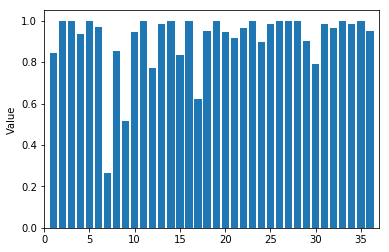

Averaged carer # checks
Mean: 4.44791666667 Std: 3.32438577765  Median: 4.375 Max: 14.5 Min: 0.0


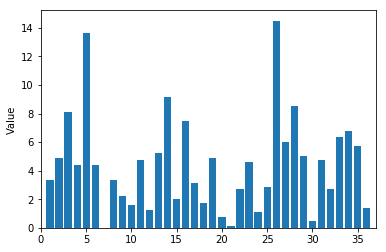

Averaged carer # report frequency for the 2nd sections (disable:0 low:1 high:2)
Mean: 1.41666666667 Std: 0.5980291706  Median: 1.5 Max: 2.0 Min: 0.25


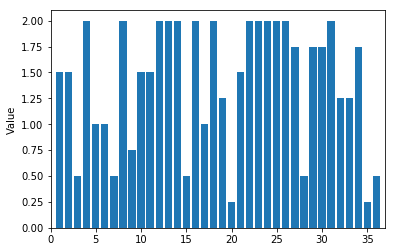

Averaged player % correct admin task
Mean: 0.699091880342 Std: 0.0661134686443  Median: 0.707692307692 Max: 0.801923076923 Min: 0.371153846154


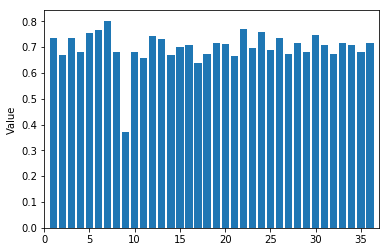

Averaged player # missed admin task
Mean: 15.5590277778 Std: 3.20812852581  Median: 15.25 Max: 32.375 Min: 9.5


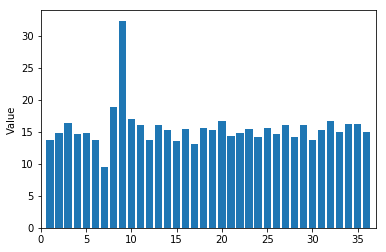

Averaged player total admin task earnings
Mean: 150.204861111 Std: 26.44852431  Median: 154.0625 Max: 185.5 Min: 30.125


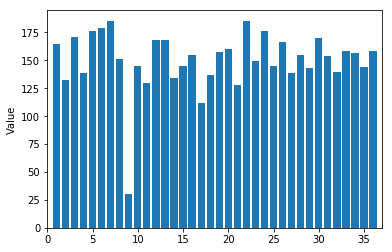

Averaged player total monitoring task losses
Mean: -202.131944444 Std: 118.323994439  Median: -158.3125 Max: -128.125 Min: -661.5


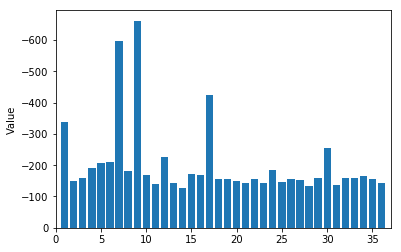

In [12]:
display(Markdown('## RQ7 Summary report of user stats'))

def userbarchart(user_stats):
    print('Mean:',user_stats.mean(),'Std:',user_stats.std(),' Median:',np.median(user_stats),'Max:',user_stats.max(),'Min:',user_stats.min())
    uid = np.arange(len(user_stats))+1
    axes = plt.gca()
    axes.set_xlim([0,37])
    plt.bar(uid,user_stats)
    plt.ylabel("Value")
    if user_stats.mean()<0:
        plt.gca().invert_yaxis()
    plt.show()

print('Averaged carer trust scores')
user_trust = exp_trust.mean(axis=1)
userbarchart(user_trust)

print('Averaged carer % attended events')
user_attend_prop = exp_attend_prop.mean(axis=1)
userbarchart(user_attend_prop)

print('Averaged carer % attended alerts')
user_attend_alert_prop = exp_attend_alert_prop.mean(axis=1)
userbarchart(user_attend_alert_prop)

print('Averaged carer % attended high-risk alerts')
user_attend_hialert_prop = exp_attend_hialert_prop.mean(axis=1)
userbarchart(user_attend_hialert_prop)

print('Averaged carer % attended low-risk alerts')
user_attend_loalert_prop = exp_attend_loalert_prop.mean(axis=1)
userbarchart(user_attend_loalert_prop)

print('Averaged carer % attended high-risk events')
user_attend_hievent_prop = exp_attend_hievent_prop.mean(axis=1)
userbarchart(user_attend_hievent_prop)

print('Averaged carer % attended low-risk events')
user_attend_loevent_prop = exp_attend_loevent_prop.mean(axis=1)
userbarchart(user_attend_loevent_prop)

print('Averaged carer # checks')
user_check = exp_check.mean(axis=1)
userbarchart(user_check)

print('Averaged carer # report frequency for the 2nd sections (disable:0 low:1 high:2)')
exp_freq_int = np.asarray([[0 if x=='Disabled' else 1 if x=='Low' else 2 for x in row] for row in exp_freq])
user_freq_int = exp_freq_int.mean(axis=1)
userbarchart(user_freq_int)

print('Averaged player % correct admin task')
user_admin_prop = exp_admin_c_prop.mean(axis=1)
userbarchart(user_admin_prop)

print('Averaged player # missed admin task')
user_admin_miss = exp_admin_miss.mean(axis=1)
userbarchart(user_admin_miss)

print('Averaged player total admin task earnings')
user_admin_earn = Earnings_admin.mean(axis=1)
userbarchart(user_admin_earn)

print('Averaged player total monitoring task losses')
user_admin_loss = Total_loss.mean(axis=1)
userbarchart(user_admin_loss)

In [13]:
display(Markdown('## RQ7 Cluster of user stats'))

def userbarchart_clustered(user_stats,labels,sort='True'):
    if sort:
        sorted_idx = np.argsort(labels)
        labels_sort = np.array([labels[i] for i in sorted_idx])
        user_stats = np.array([user_stats[i] for i in sorted_idx])
    
    print('Mean:',user_stats.mean(),'Std:',user_stats.std(),' Median:',np.median(user_stats),'Max:',user_stats.max(),'Min:',user_stats.min())
    uid = np.arange(len(user_stats))+1
    axes = plt.gca()
    axes.set_xlim([0,37])
    userlist = plt.bar(uid,user_stats)
    
    color_code = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    for i in range(len(user_stats)):      
        userlist[i].set_color(color_code[labels_sort[i]])
    
    plt.ylabel("Value")
    if user_stats.mean()<0:
        plt.gca().invert_yaxis()
    plt.show()

## RQ7 Cluster of user stats

### All user features:

trust scores
prop attended events
prop attended alerts
NO. checks
NO. report frequency for the 2nd sections (disable:0 low:1 high:2)
% correct admin task
# missed admin task
total admin task earnings
total monitoring task losses
answers to the propensity questions

For n_clusters = 2 The average silhouette_score is : 0.715199945917
For n_clusters = 3 The average silhouette_score is : 0.645073015683
For n_clusters = 4 The average silhouette_score is : 0.627801874334
For n_clusters = 5 The average silhouette_score is : 0.433020305962
For n_clusters = 6 The average silhouette_score is : 0.42923590719
For n_clusters = 7 The average silhouette_score is : 0.43114194368
For n_clusters = 8 The average silhouette_score is : 0.151334216197
For n_clusters = 9 The average silhouette_score is : 0.160899718943
For n_clusters = 10 The average silhouette_score is : 0.178917994076
For n_clusters = 11 The average silhouette_score is : 0.156011962511
For n_clusters = 12 The average silhouette_score is : 

### 2 clusters:


Averaged carer trust scores
Mean: 3.11805555556 Std: 0.601606965849  Median: 3.125 Max: 4.5 Min: 2.0


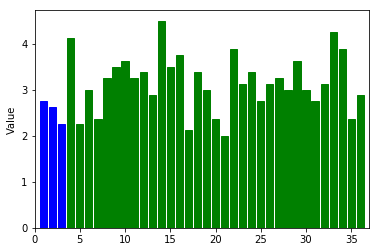

Averaged carer % attended events
Mean: 0.920882936508 Std: 0.142873633239  Median: 0.974107142857 Max: 1.0 Min: 0.352380952381


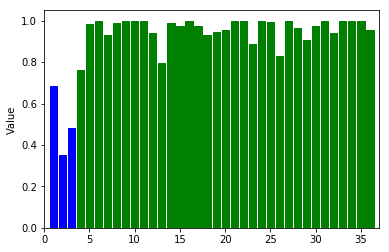

Averaged carer % attended alerts
Mean: 0.821214110644 Std: 0.200927117362  Median: 0.89787289916 Max: 1.0 Min: 0.358455882353


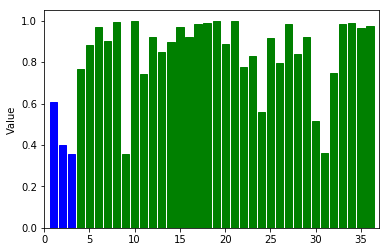

Averaged carer # checks
Mean: 4.44791666667 Std: 3.32438577765  Median: 4.375 Max: 14.5 Min: 0.0


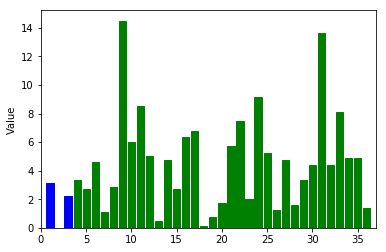

Averaged carer # report frequency for the 2nd sections (disable:0 low:1 high:2)
Mean: 1.41666666667 Std: 0.5980291706  Median: 1.5 Max: 2.0 Min: 0.25


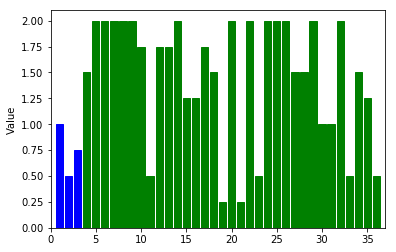


Averaged player % correct admin task
Mean: 0.699091880342 Std: 0.0661134686443  Median: 0.707692307692 Max: 0.801923076923 Min: 0.371153846154


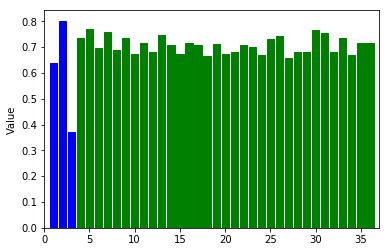

Averaged player # missed admin task
Mean: 15.5590277778 Std: 3.20812852581  Median: 15.25 Max: 32.375 Min: 9.5


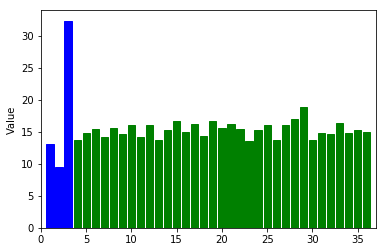

Averaged player total admin task earnings
Mean: 150.204861111 Std: 26.44852431  Median: 154.0625 Max: 185.5 Min: 30.125


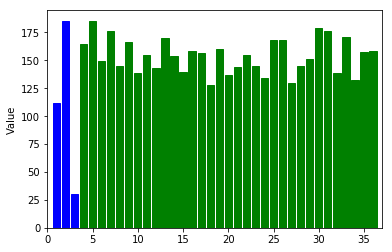

Averaged player total monitoring task losses
Mean: -202.131944444 Std: 118.323994439  Median: -158.3125 Max: -128.125 Min: -661.5


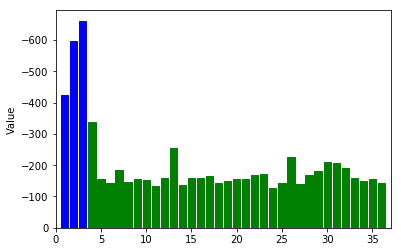

### 3 clusters:


Averaged carer trust scores
Mean: 3.11805555556 Std: 0.601606965849  Median: 3.125 Max: 4.5 Min: 2.0


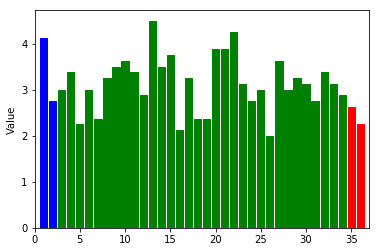

Averaged carer % attended events
Mean: 0.920882936508 Std: 0.142873633239  Median: 0.974107142857 Max: 1.0 Min: 0.352380952381


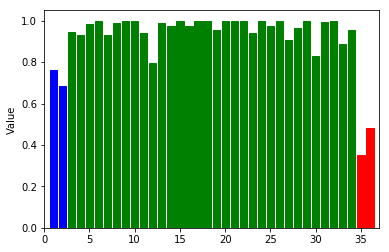

Averaged carer % attended alerts
Mean: 0.821214110644 Std: 0.200927117362  Median: 0.89787289916 Max: 1.0 Min: 0.358455882353


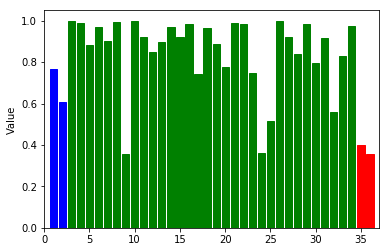

Averaged carer # checks
Mean: 4.44791666667 Std: 3.32438577765  Median: 4.375 Max: 14.5 Min: 0.0


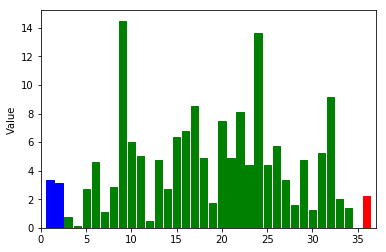

Averaged carer # report frequency for the 2nd sections (disable:0 low:1 high:2)
Mean: 1.41666666667 Std: 0.5980291706  Median: 1.5 Max: 2.0 Min: 0.25


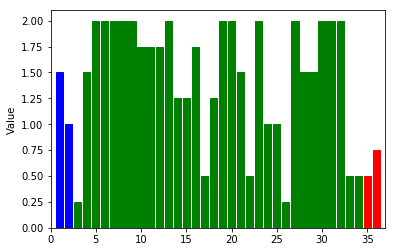


Averaged player % correct admin task
Mean: 0.699091880342 Std: 0.0661134686443  Median: 0.707692307692 Max: 0.801923076923 Min: 0.371153846154


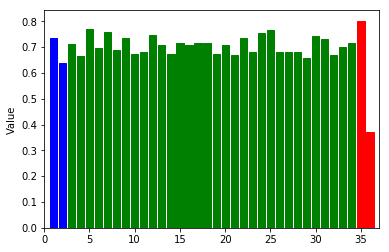

Averaged player # missed admin task
Mean: 15.5590277778 Std: 3.20812852581  Median: 15.25 Max: 32.375 Min: 9.5


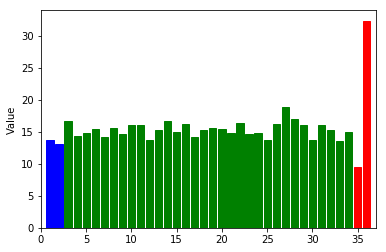

Averaged player total admin task earnings
Mean: 150.204861111 Std: 26.44852431  Median: 154.0625 Max: 185.5 Min: 30.125


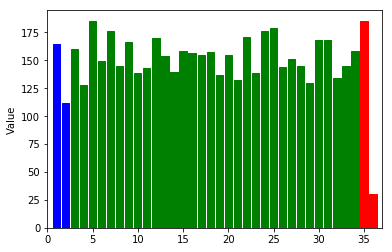

Averaged player total monitoring task losses
Mean: -202.131944444 Std: 118.323994439  Median: -158.3125 Max: -128.125 Min: -661.5


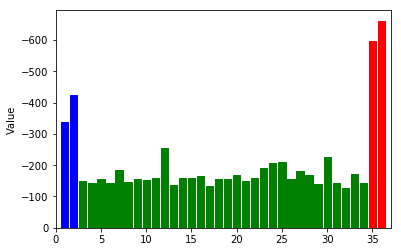

### 4 clusters:


Averaged carer trust scores
Mean: 3.11805555556 Std: 0.601606965849  Median: 3.125 Max: 4.5 Min: 2.0


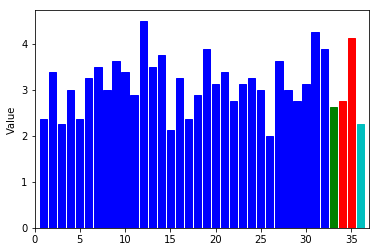

Averaged carer % attended events
Mean: 0.920882936508 Std: 0.142873633239  Median: 0.974107142857 Max: 1.0 Min: 0.352380952381


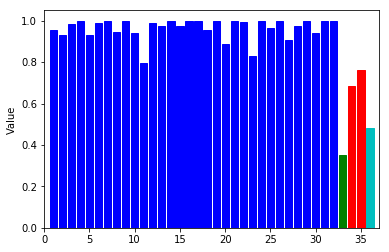

Averaged carer % attended alerts
Mean: 0.821214110644 Std: 0.200927117362  Median: 0.89787289916 Max: 1.0 Min: 0.358455882353


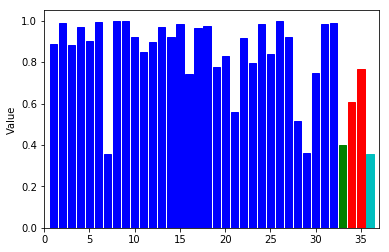

Averaged carer # checks
Mean: 4.44791666667 Std: 3.32438577765  Median: 4.375 Max: 14.5 Min: 0.0


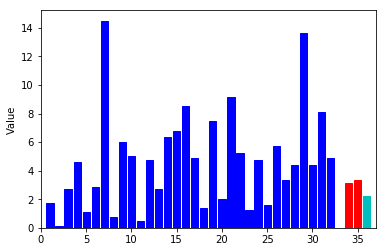

Averaged carer # report frequency for the 2nd sections (disable:0 low:1 high:2)
Mean: 1.41666666667 Std: 0.5980291706  Median: 1.5 Max: 2.0 Min: 0.25


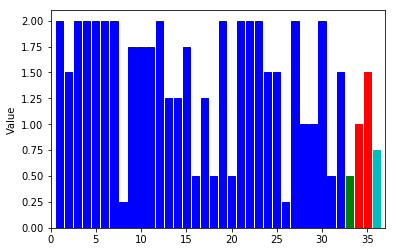


Averaged player % correct admin task
Mean: 0.699091880342 Std: 0.0661134686443  Median: 0.707692307692 Max: 0.801923076923 Min: 0.371153846154


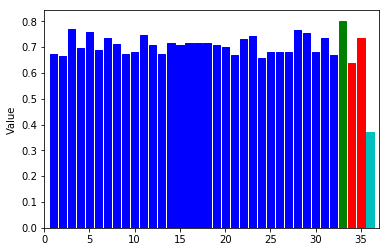

Averaged player # missed admin task
Mean: 15.5590277778 Std: 3.20812852581  Median: 15.25 Max: 32.375 Min: 9.5


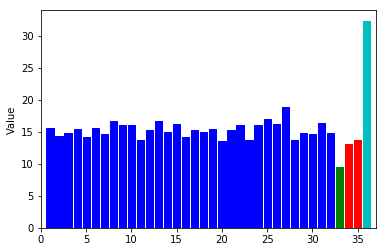

Averaged player total admin task earnings
Mean: 150.204861111 Std: 26.44852431  Median: 154.0625 Max: 185.5 Min: 30.125


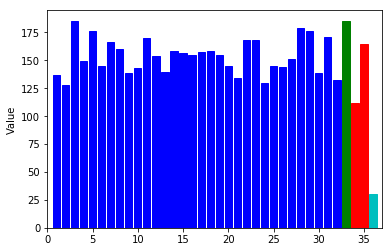

Averaged player total monitoring task losses
Mean: -202.131944444 Std: 118.323994439  Median: -158.3125 Max: -128.125 Min: -661.5


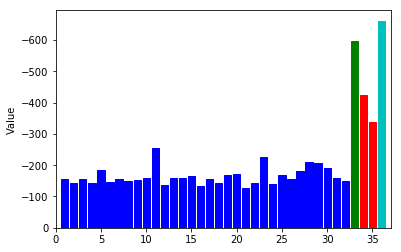

In [14]:
display(Markdown('### All user features:'))
print('trust scores')
print('prop attended events')
print('prop attended alerts')
print('NO. checks')
print('NO. report frequency for the 2nd sections (disable:0 low:1 high:2)')
print('% correct admin task')
print('# missed admin task')
print('total admin task earnings')
print('total monitoring task losses')
print('answers to the propensity questions\n')

user_feature = np.hstack((exp_trust,exp_attend_prop,exp_attend_alert_prop,exp_check,exp_freq_int,exp_admin_c_prop,exp_admin_miss,Earnings_admin,Total_loss,exp_prop))

for n_clusters in range(2,20):
####################################### Compute K-mean ##################################
    labels = KMeans(n_clusters, random_state=0).fit_predict(user_feature)
    silhouette_avg = silhouette_score(user_feature, labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

##########################################################################################
display(Markdown('### 2 clusters:'))
labels = KMeans(n_clusters=2, random_state=0).fit_predict(user_feature)

print('\nAveraged carer trust scores')
user_trust = exp_trust.mean(axis=1)
userbarchart_clustered(user_trust,labels)

print('Averaged carer % attended events')
user_attend_prop = exp_attend_prop.mean(axis=1)
userbarchart_clustered(user_attend_prop,labels)

print('Averaged carer % attended alerts')
user_attend_alert_prop = exp_attend_alert_prop.mean(axis=1)
userbarchart_clustered(user_attend_alert_prop,labels)

print('Averaged carer # checks')
user_check = exp_check.mean(axis=1)
userbarchart_clustered(user_check,labels)

print('Averaged carer # report frequency for the 2nd sections (disable:0 low:1 high:2)')
exp_freq_int = np.asarray([[0 if x=='Disabled' else 1 if x=='Low' else 2 for x in row] for row in exp_freq])
user_freq_int = exp_freq_int.mean(axis=1)
userbarchart_clustered(user_freq_int,labels)

print('\nAveraged player % correct admin task')
user_admin_prop = exp_admin_c_prop.mean(axis=1)
userbarchart_clustered(user_admin_prop,labels)

print('Averaged player # missed admin task')
user_admin_miss = exp_admin_miss.mean(axis=1)
userbarchart_clustered(user_admin_miss,labels)

print('Averaged player total admin task earnings')
user_admin_earn = Earnings_admin.mean(axis=1)
userbarchart_clustered(user_admin_earn,labels)

print('Averaged player total monitoring task losses')
user_admin_loss = Total_loss.mean(axis=1)
userbarchart_clustered(user_admin_loss,labels)

#######################################################################################
display(Markdown('### 3 clusters:'))
labels = KMeans(n_clusters=3, random_state=0).fit_predict(user_feature)

print('\nAveraged carer trust scores')
user_trust = exp_trust.mean(axis=1)
userbarchart_clustered(user_trust,labels)

print('Averaged carer % attended events')
user_attend_prop = exp_attend_prop.mean(axis=1)
userbarchart_clustered(user_attend_prop,labels)

print('Averaged carer % attended alerts')
user_attend_alert_prop = exp_attend_alert_prop.mean(axis=1)
userbarchart_clustered(user_attend_alert_prop,labels)

print('Averaged carer # checks')
user_check = exp_check.mean(axis=1)
userbarchart_clustered(user_check,labels)

print('Averaged carer # report frequency for the 2nd sections (disable:0 low:1 high:2)')
exp_freq_int = np.asarray([[0 if x=='Disabled' else 1 if x=='Low' else 2 for x in row] for row in exp_freq])
user_freq_int = exp_freq_int.mean(axis=1)
userbarchart_clustered(user_freq_int,labels)

print('\nAveraged player % correct admin task')
user_admin_prop = exp_admin_c_prop.mean(axis=1)
userbarchart_clustered(user_admin_prop,labels)

print('Averaged player # missed admin task')
user_admin_miss = exp_admin_miss.mean(axis=1)
userbarchart_clustered(user_admin_miss,labels)

print('Averaged player total admin task earnings')
user_admin_earn = Earnings_admin.mean(axis=1)
userbarchart_clustered(user_admin_earn,labels)

print('Averaged player total monitoring task losses')
user_admin_loss = Total_loss.mean(axis=1)
userbarchart_clustered(user_admin_loss,labels)

#######################################################################################
display(Markdown('### 4 clusters:'))
labels = KMeans(n_clusters=4, random_state=0).fit_predict(user_feature)

print('\nAveraged carer trust scores')
user_trust = exp_trust.mean(axis=1)
userbarchart_clustered(user_trust,labels)

print('Averaged carer % attended events')
user_attend_prop = exp_attend_prop.mean(axis=1)
userbarchart_clustered(user_attend_prop,labels)

print('Averaged carer % attended alerts')
user_attend_alert_prop = exp_attend_alert_prop.mean(axis=1)
userbarchart_clustered(user_attend_alert_prop,labels)

print('Averaged carer # checks')
user_check = exp_check.mean(axis=1)
userbarchart_clustered(user_check,labels)

print('Averaged carer # report frequency for the 2nd sections (disable:0 low:1 high:2)')
exp_freq_int = np.asarray([[0 if x=='Disabled' else 1 if x=='Low' else 2 for x in row] for row in exp_freq])
user_freq_int = exp_freq_int.mean(axis=1)
userbarchart_clustered(user_freq_int,labels)

print('\nAveraged player % correct admin task')
user_admin_prop = exp_admin_c_prop.mean(axis=1)
userbarchart_clustered(user_admin_prop,labels)

print('Averaged player # missed admin task')
user_admin_miss = exp_admin_miss.mean(axis=1)
userbarchart_clustered(user_admin_miss,labels)

print('Averaged player total admin task earnings')
user_admin_earn = Earnings_admin.mean(axis=1)
userbarchart_clustered(user_admin_earn,labels)

print('Averaged player total monitoring task losses')
user_admin_loss = Total_loss.mean(axis=1)
userbarchart_clustered(user_admin_loss,labels)

### User behaviour features:

prop attended events
prop attended alerts
NO. checks (normalised)
% correct admin task
% missed admin task

For n_clusters = 2 The average silhouette_score is : 0.385190764608
For n_clusters = 3 The average silhouette_score is : 0.376953848387
For n_clusters = 4 The average silhouette_score is : 0.193104446342
For n_clusters = 5 The average silhouette_score is : 0.196660219176
For n_clusters = 6 The average silhouette_score is : 0.191879165052
For n_clusters = 7 The average silhouette_score is : 0.213815607471
For n_clusters = 8 The average silhouette_score is : 0.204891536808
For n_clusters = 9 The average silhouette_score is : 0.176232312099
For n_clusters = 10 The average silhouette_score is : 0.182746841973
For n_clusters = 11 The average silhouette_score is : 0.168156674363
For n_clusters = 12 The average silhouette_score is : 0.144294298485
For n_clusters = 13 The average silhouette_score is : 0.100885527478
For n_clusters = 14 The average silhouette_score is : 0.134357611067
For

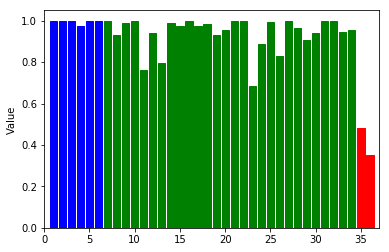

Averaged carer % attended alerts
Mean: 0.821214110644 Std: 0.200927117362  Median: 0.89787289916 Max: 1.0 Min: 0.358455882353


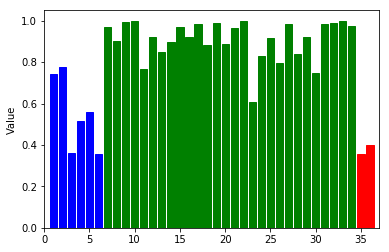

Averaged carer # checks
Mean: 0.284878725186 Std: 0.20857611667  Median: 0.2794071576 Max: 0.899991246499 Min: 0.0


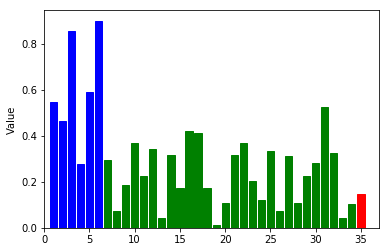

Averaged player total monitoring task losses
Mean: -202.131944444 Std: 118.323994439  Median: -158.3125 Max: -128.125 Min: -661.5


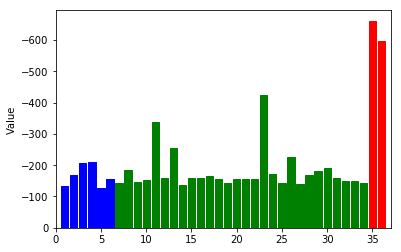

Averaged carer trust scores
Mean: 3.11805555556 Std: 0.601606965849  Median: 3.125 Max: 4.5 Min: 2.0


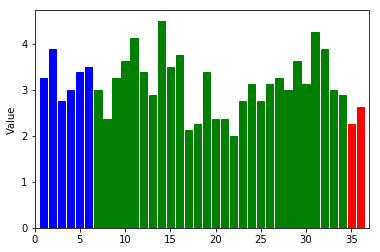


Averaged player % correct admin task
Mean: 0.699091880342 Std: 0.0661134686443  Median: 0.707692307692 Max: 0.801923076923 Min: 0.371153846154


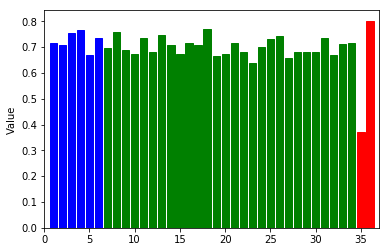

Averaged player # missed admin task
Mean: 0.23936965812 Std: 0.049355823474  Median: 0.234615384615 Max: 0.498076923077 Min: 0.146153846154


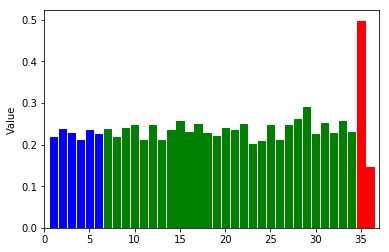

In [15]:
display(Markdown('### User behaviour features:'))
print('prop attended events')
print('prop attended alerts')
print('NO. checks (normalised)')
print('% correct admin task')
print('% missed admin task\n')
# print('% correct admin task \n')

user_feature = np.hstack((exp_attend_prop,exp_attend_alert_prop,exp_check/np.max(exp_check,axis=0),exp_admin_c_prop,exp_admin_miss/65))

for n_clusters in range(2,20):
####################################### Compute K-mean ##################################
    labels = KMeans(n_clusters, random_state=0).fit_predict(user_feature)
#     print(labels)

####################################### Compute DBSCAN ##################################
# db = DBSCAN(eps=0.3, min_samples=2).fit(user_feature)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_
# print(labels)

######################################### Silhouette ####################################
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(user_feature, labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

labels = KMeans(n_clusters=3, random_state=0).fit_predict(user_feature)

print('Averaged carer % attended events')
user_attend_prop = exp_attend_prop.mean(axis=1)
userbarchart_clustered(user_attend_prop,labels)

print('Averaged carer % attended alerts')
user_attend_alert_prop = exp_attend_alert_prop.mean(axis=1)
userbarchart_clustered(user_attend_alert_prop,labels)

print('Averaged carer # checks')
user_check = (exp_check/np.max(exp_check,axis=0)).mean(axis=1)
userbarchart_clustered(user_check,labels)

print('Averaged player total monitoring task losses')
user_admin_loss = Total_loss.mean(axis=1)
userbarchart_clustered(user_admin_loss,labels)

print('Averaged carer trust scores')
user_trust = exp_trust.mean(axis=1)
userbarchart_clustered(user_trust,labels)

print('\nAveraged player % correct admin task')
user_admin_prop = exp_admin_c_prop.mean(axis=1)
userbarchart_clustered(user_admin_prop,labels)

print('Averaged player # missed admin task')
user_admin_miss = (exp_admin_miss/65).mean(axis=1)
userbarchart_clustered(user_admin_miss,labels)

# print('Averaged carer # report frequency for the 2nd sections (disable:0 low:1 high:2)')
# exp_freq_int = np.asarray([[0 if x=='Disabled' else 1 if x=='Low' else 2 for x in row] for row in exp_freq])
# user_freq_int = exp_freq_int.mean(axis=1)
# userbarchart_clustered(user_freq_int,labels)

# print('Averaged player % correct admin task')
# user_admin_prop = exp_admin_c_prop.mean(axis=1)
# userbarchart_clustered(user_admin_prop,labels)

### User admin features:

% correct admin task
% missed admin task
For n_clusters = 2 The average silhouette_score is : 0.778833991518
For n_clusters = 3 The average silhouette_score is : 0.191835402809
For n_clusters = 4 The average silhouette_score is : 0.19755651018
For n_clusters = 5 The average silhouette_score is : 0.140922823382
For n_clusters = 6 The average silhouette_score is : 0.125566462553
For n_clusters = 7 The average silhouette_score is : 0.11996077855
For n_clusters = 8 The average silhouette_score is : 0.133258432905
For n_clusters = 9 The average silhouette_score is : 0.121360099688
For n_clusters = 10 The average silhouette_score is : 0.133426133239
For n_clusters = 11 The average silhouette_score is : 0.130864896503
For n_clusters = 12 The average silhouette_score is : 0.121513328485
For n_clusters = 13 The average silhouette_score is : 0.152881401061
For n_clusters = 14 The average silhouette_score is : 0.122824978749
For n_clusters = 15 The average silhouette_score is : 0.14869922897
For 

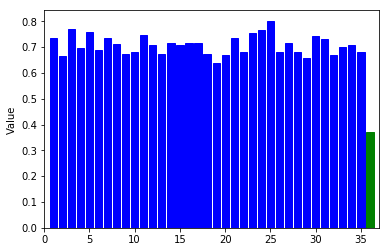

Averaged player # missed admin task
Mean: 0.23936965812 Std: 0.049355823474  Median: 0.234615384615 Max: 0.498076923077 Min: 0.146153846154


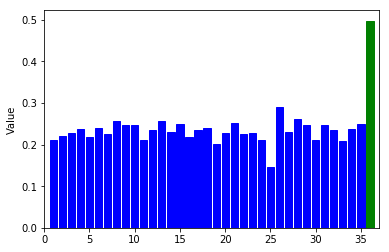

In [16]:
display(Markdown('### User admin features:'))
print('% correct admin task')
print('% missed admin task')
# print('total admin task earnings\n')

user_feature = np.hstack((exp_admin_c_prop,exp_admin_miss/65))

for n_clusters in range(2,20):
####################################### Compute K-mean ##################################
    labels = KMeans(n_clusters, random_state=0).fit_predict(user_feature)
#     print(labels)

####################################### Compute DBSCAN ##################################
# db = DBSCAN(eps=0.3, min_samples=2).fit(user_feature)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_
# print(labels)

######################################### Silhouette ####################################
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(user_feature, labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)


labels = KMeans(n_clusters=2, random_state=0).fit_predict(user_feature)

print('\nAveraged player % correct admin task')
user_admin_prop = exp_admin_c_prop.mean(axis=1)
userbarchart_clustered(user_admin_prop,labels)

print('Averaged player # missed admin task')
user_admin_miss = (exp_admin_miss/65).mean(axis=1)
userbarchart_clustered(user_admin_miss,labels)

# print('Averaged player total admin task earnings')
# user_admin_earn = Earnings_admin.mean(axis=1)
# userbarchart_clustered(user_admin_earn,labels)

### User performance features:

prop attended events
prop attended alerts
NO. checks (normalised)
% correct admin task
# missed admin task

For n_clusters = 2 The average silhouette_score is : 0.385190764608
For n_clusters = 3 The average silhouette_score is : 0.376953848387
For n_clusters = 4 The average silhouette_score is : 0.193104446342
For n_clusters = 5 The average silhouette_score is : 0.196660219176
For n_clusters = 6 The average silhouette_score is : 0.191879165052
For n_clusters = 7 The average silhouette_score is : 0.213815607471
For n_clusters = 8 The average silhouette_score is : 0.204891536808
For n_clusters = 9 The average silhouette_score is : 0.176232312099
For n_clusters = 10 The average silhouette_score is : 0.182746841973
For n_clusters = 11 The average silhouette_score is : 0.168156674363
For n_clusters = 12 The average silhouette_score is : 0.144294298485
For n_clusters = 13 The average silhouette_score is : 0.100885527478
For n_clusters = 14 The average silhouette_score is : 0.134357611067
For

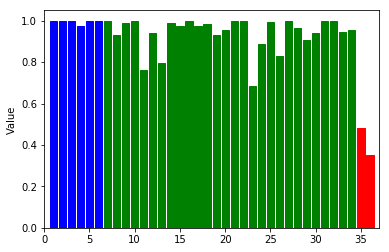

Averaged carer % attended alerts
Mean: 0.821214110644 Std: 0.200927117362  Median: 0.89787289916 Max: 1.0 Min: 0.358455882353


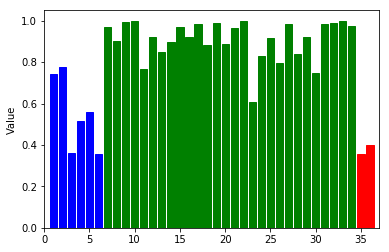

Averaged carer # checks
Mean: 0.284878725186 Std: 0.20857611667  Median: 0.2794071576 Max: 0.899991246499 Min: 0.0


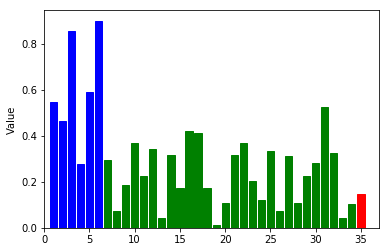


Averaged player % correct admin task
Mean: 0.699091880342 Std: 0.0661134686443  Median: 0.707692307692 Max: 0.801923076923 Min: 0.371153846154


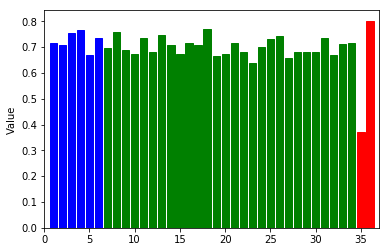

Averaged player # missed admin task
Mean: 0.23936965812 Std: 0.049355823474  Median: 0.234615384615 Max: 0.498076923077 Min: 0.146153846154


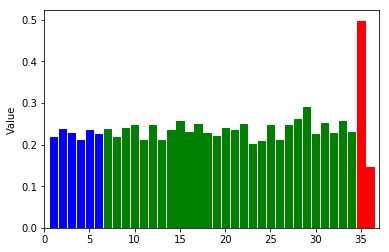

In [17]:
display(Markdown('### User performance features:'))
print('prop attended events')
print('prop attended alerts')
print('NO. checks (normalised)')
print('% correct admin task')
print('# missed admin task\n')
# print('% correct admin task \n')

user_feature = np.hstack((exp_attend_prop,exp_attend_alert_prop,exp_check/np.max(exp_check,axis=0),exp_admin_c_prop,exp_admin_miss/65))

for n_clusters in range(2,20):
####################################### Compute K-mean ##################################
    labels = KMeans(n_clusters, random_state=0).fit_predict(user_feature)
#     print(labels)

####################################### Compute DBSCAN ##################################
# db = DBSCAN(eps=0.3, min_samples=2).fit(user_feature)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_
# print(labels)

######################################### Silhouette ####################################
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(user_feature, labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

labels = KMeans(n_clusters=3, random_state=0).fit_predict(user_feature)

print('Averaged carer % attended events')
user_attend_prop = exp_attend_prop.mean(axis=1)
userbarchart_clustered(user_attend_prop,labels)

print('Averaged carer % attended alerts')
user_attend_alert_prop = exp_attend_alert_prop.mean(axis=1)
userbarchart_clustered(user_attend_alert_prop,labels)

print('Averaged carer # checks')
user_check = (exp_check/np.max(exp_check,axis=0)).mean(axis=1)
userbarchart_clustered(user_check,labels)

print('\nAveraged player % correct admin task')
user_admin_prop = exp_admin_c_prop.mean(axis=1)
userbarchart_clustered(user_admin_prop,labels)

print('Averaged player # missed admin task')
user_admin_miss = (exp_admin_miss/65).mean(axis=1)
userbarchart_clustered(user_admin_miss,labels)


### User questionaire features:

trust scores
answers to the propensity questions

For n_clusters = 2 The average silhouette_score is : 0.198343512368
For n_clusters = 3 The average silhouette_score is : 0.1794658796
For n_clusters = 4 The average silhouette_score is : 0.175831526813
For n_clusters = 5 The average silhouette_score is : 0.172024718764
For n_clusters = 6 The average silhouette_score is : 0.135361699184
For n_clusters = 7 The average silhouette_score is : 0.147609280613
For n_clusters = 8 The average silhouette_score is : 0.150930634141
For n_clusters = 9 The average silhouette_score is : 0.142647831155
For n_clusters = 10 The average silhouette_score is : 0.149628255636
For n_clusters = 11 The average silhouette_score is : 0.119392709886
For n_clusters = 12 The average silhouette_score is : 0.122653579757
For n_clusters = 13 The average silhouette_score is : 0.113420649656
For n_clusters = 14 The average silhouette_score is : 0.129887464287
For n_clusters = 15 The average silhouette_score is : 0.0980465

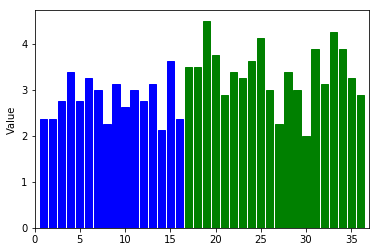


Propensity Q1: I usually trust machines until there is a reason not to
Mean: 3.13888888889 Std: 1.10937364154  Median: 3.0 Max: 5 Min: 1


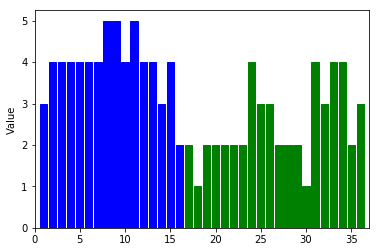


Propensity Q2: For the most part; I distrust machines
Mean: 2.61111111111 Std: 0.890623307882  Median: 2.0 Max: 5 Min: 1


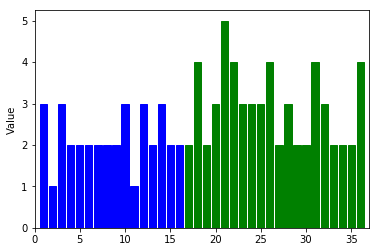


Propensity Q3: In general; I would rely on a machine to assist me
Mean: 3.94444444444 Std: 0.62112999375  Median: 4.0 Max: 5 Min: 2


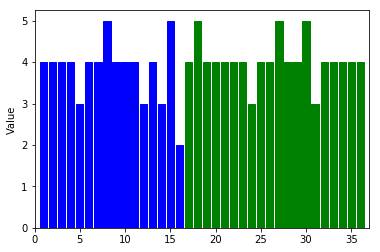


Propensity Q4: My tendency to trust machines is high
Mean: 2.88888888889 Std: 0.965452622055  Median: 3.0 Max: 5 Min: 1


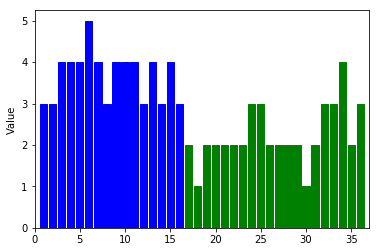


Propensity Q5: It is difficult for me to trust machines to do their job
Mean: 3.27777777778 Std: 1.01683362321  Median: 3.0 Max: 5 Min: 2


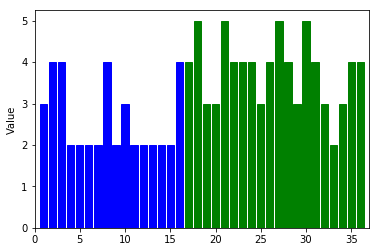


Propensity Q6: I am likely to trust a machine even when I have little knowledge about it
Mean: 3.33333333333 Std: 1.0  Median: 4.0 Max: 5 Min: 1


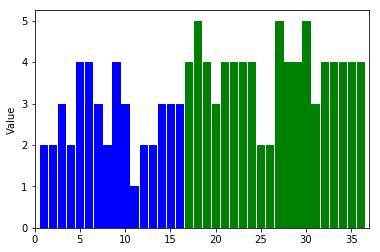

In [18]:
display(Markdown('### User questionaire features:'))
print('trust scores')
print('answers to the propensity questions\n')

Qs_propensity = ['I usually trust machines until there is a reason not to',
'For the most part; I distrust machines',
'In general; I would rely on a machine to assist me',
'My tendency to trust machines is high',
'It is difficult for me to trust machines to do their job',
'I am likely to trust a machine even when I have little knowledge about it']



user_feature = np.hstack((exp_trust,exp_prop))

for n_clusters in range(2,20):
####################################### Compute K-mean ##################################
    labels = KMeans(n_clusters, random_state=0).fit_predict(user_feature)
#     print(labels)

####################################### Compute DBSCAN ##################################
# db = DBSCAN(eps=0.3, min_samples=2).fit(user_feature)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_
# print(labels)

######################################### Silhouette ####################################
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(user_feature, labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

labels = KMeans(n_clusters=2, random_state=0).fit_predict(user_feature)

print('\nAveraged carer trust scores')
user_trust = exp_trust.mean(axis=1)
userbarchart_clustered(user_trust,labels)

for idx in range(len(Qs_propensity)):
    print('\nPropensity Q',idx+1,': ',Qs_propensity[idx],sep='')
    userbarchart_clustered(exp_prop[:,idx],labels)

### User earnings\losses features:

total admin task earnings
total monitoring task losses

For n_clusters = 2 The average silhouette_score is : 0.715764052936
For n_clusters = 3 The average silhouette_score is : 0.645949120091
For n_clusters = 4 The average silhouette_score is : 0.628560398305
For n_clusters = 5 The average silhouette_score is : 0.434423579018
For n_clusters = 6 The average silhouette_score is : 0.430639719134
For n_clusters = 7 The average silhouette_score is : 0.432555909065
For n_clusters = 8 The average silhouette_score is : 0.151420083761
For n_clusters = 9 The average silhouette_score is : 0.161323146013
For n_clusters = 10 The average silhouette_score is : 0.179207287428
For n_clusters = 11 The average silhouette_score is : 0.156730083978
For n_clusters = 12 The average silhouette_score is : 0.152683875378
For n_clusters = 13 The average silhouette_score is : 0.155051935298
For n_clusters = 14 The average silhouette_score is : 0.158990119892
For n_clusters = 15 The average silhouette_score is : 0

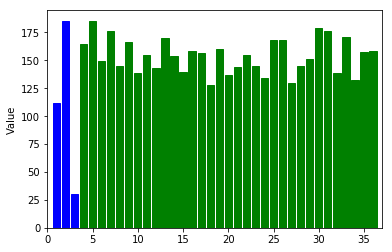

Averaged player total monitoring task losses
Mean: -202.131944444 Std: 118.323994439  Median: -158.3125 Max: -128.125 Min: -661.5


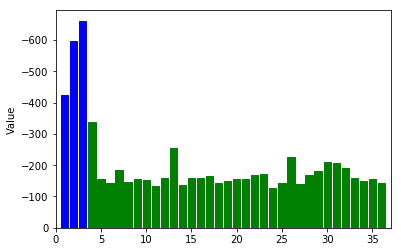

In [19]:
display(Markdown('### User earnings\losses features:'))
print('total admin task earnings')
print('total monitoring task losses\n')

user_feature = np.hstack((Earnings_admin,Total_loss))

for n_clusters in range(2,20):
####################################### Compute K-mean ##################################
    labels = KMeans(n_clusters, random_state=0).fit_predict(user_feature)
#     print(labels)

####################################### Compute DBSCAN ##################################
# db = DBSCAN(eps=0.3, min_samples=2).fit(user_feature)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_
# print(labels)

######################################### Silhouette ####################################
# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(user_feature, labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)


labels = KMeans(n_clusters=2, random_state=0).fit_predict(user_feature)


print('\nAveraged player total admin task earnings')
user_admin_earn = Earnings_admin.mean(axis=1)
userbarchart_clustered(user_admin_earn,labels)

print('Averaged player total monitoring task losses')
user_admin_loss = Total_loss.mean(axis=1)
userbarchart_clustered(user_admin_loss,labels)

In [20]:
display(Markdown('## User classifications'))

# def label_mtx_gen_12(exp1_data, exp2_data):
#     labels1 = np.zeros(((n_participant-1),7))
#     labels2 = np.zeros(((n_participant-1),7))
#     labels1[exp1_data[:,1:] >  exp1_data[:,:7]]=3
#     labels1[exp1_data[:,1:] == exp1_data[:,:7]]=2
#     labels1[exp1_data[:,1:] <  exp1_data[:,:7]]=1
#     labels2[exp2_data[:,1:] >  exp2_data[:,:7]]=3
#     labels2[exp2_data[:,1:] == exp2_data[:,:7]]=2
#     labels2[exp2_data[:,1:] <  exp2_data[:,:7]]=1
#     labels = np.vstack((labels1,labels2))    
#     return labels2

############################################# labels ##############################################
def label_mtx_gen(exp_data):

    labels1 = np.zeros(((n_participant-1),7))
    labels2 = np.zeros(((n_participant-1),7))
    # Comparison [2 3 4 5 6 7 8] vs [1 2 3 4 5 6 7]
    labels1[exp_data[:(n_participant-1),1:] >  exp_data[:(n_participant-1),:7]]=3
    labels1[exp_data[:(n_participant-1),1:] == exp_data[:(n_participant-1),:7]]=2
    labels1[exp_data[:(n_participant-1),1:] <  exp_data[:(n_participant-1),:7]]=1
    # Comparison [5 6 7 8 2 3 4] vs [4 5 6 7 1 2 3]
    labels2[exp_data[(n_participant-1):,np.r_[0:4,5:8]] >  exp_data[(n_participant-1):,np.r_[7,0:3,4:7]]]=3
    labels2[exp_data[(n_participant-1):,np.r_[0:4,5:8]] == exp_data[(n_participant-1):,np.r_[7,0:3,4:7]]]=2
    labels2[exp_data[(n_participant-1):,np.r_[0:4,5:8]] <  exp_data[(n_participant-1):,np.r_[7,0:3,4:7]]]=1
    labels = np.vstack((labels1,labels2))   
    return labels.ravel()

# create labels for # checks
check_labels = label_mtx_gen(exp_check)
# # create labels for proportion of attended alert
attend_alert_prop_labels = label_mtx_gen(exp_attend_alert_prop)

############################################# features ##############################################
def repmat_mtx_gen(feature_vec):
    return np.matlib.repmat(feature_vec, 8, 1).T

def feature_mtx_gen(feature_data):
    # the input feature data is a list of arrays, each array represents a feature
    # the output feature data is nxf, where n is number of samples, and f is number of feature
    
    for feature_idx in range(len(feature_data)):
        # get each feature
        data = feature_data[feature_idx]
        # if the feature has only one dimension, e.g.,answer to a questionnaire
        if len(data)==1:
            # reproduce the feature to all 8 sections
            data = repmat_mtx_gen(data)
        # feature extraction (feature from the previous section)
        feature1 = np.zeros(((n_participant-1),7))
        feature2 = np.zeros(((n_participant-1),7))
        feature1 = data[:(n_participant-1),:7]   # [1 2 3 4 5 6 7]
        feature2 = data[(n_participant-1):,np.r_[7,0:3,4:7]]   # [4 5 6 7 1 2 3]
        
        if feature_idx!=0:
            # append the new feature into the feature matrix
            feature = np.vstack((feature, np.vstack((feature1,feature2)).ravel()))
        else:
            # if it's the first feature, initialise the feature matrix
            feature = np.vstack((feature1,feature2)).ravel()
    return feature.T

def feature_split(feature):
    return np.vsplit(feature.T,feature.shape[1])

user_feature = feature_mtx_gen([exp_trust,exp_attend_prop,exp_attend_alert_prop,exp_check,exp_admin_c_prop,\
                               exp_admin_miss,Earnings_admin,Total_loss]+feature_split(exp_prop))



def classify_users(X_train, X_test, y_train, y_test):
    show_coef = 0
    ########################################### SVM ############################################
    # LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, \
    #           C=1.0, multi_class=’ovr’, fit_intercept=True, intercept_scaling=1, \
    #           class_weight=None, verbose=0, random_state=None, max_iter=1000)

    clf = LinearSVC(random_state=0)
    clf.fit(X_train, y_train)
    if show_coef == 1:
        print(clf.coef_)
        print(clf.intercept_)
    print('Linear SVM:',sum(clf.predict(X_test)==y_test)/len(y_test))

    #################################### Logistic Regression ###################################
    # LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, \
    #                    fit_intercept=True, intercept_scaling=1, class_weight=None, \
    #                    random_state=None, solver=’liblinear’, max_iter=100, multi_class=’ovr’, \
    #                    verbose=0, warm_start=False, n_jobs=1)

    clf = LogisticRegression(random_state=0)
    clf.fit(X_train, y_train)
    if show_coef == 1:
        print(clf.coef_)
        print(clf.intercept_)
    print('Logistic Regression:',sum(clf.predict(X_test)==y_test)/len(y_test))

    #################################### Logistic Regression CV###################################
    # LogisticRegressionCV(Cs=10, fit_intercept=True, cv=None, dual=False, penalty=’l2’, \
    #                      scoring=None, solver=’lbfgs’, tol=0.0001, max_iter=100, class_weight=None, \
    #                      n_jobs=1, verbose=0, refit=True, intercept_scaling=1.0, multi_class=’ovr’, \
    #                      random_state=None)

    clf = LogisticRegressionCV(random_state=0)
    clf.fit(X_train, y_train)
    if show_coef == 1:
        print(clf.coef_)
        print(clf.intercept_)
    print('Logistic Regression CV:',sum(clf.predict(X_test)==y_test)/len(y_test))

    #################################### KNeighborsClassifier ###################################
    # KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, \
    #                      leaf_size=30, p=2, metric=’minkowski’, metric_params=None, \
    #                      n_jobs=1, **kwargs)

    clf = KNeighborsClassifier(n_neighbors=3)
    clf.fit(X_train, y_train)
    if show_coef == 1:
        print(clf.coef_)
        print(clf.intercept_)
    print('K Neighbors Classifier:',sum(clf.predict(X_test)==y_test)/len(y_test))

    #################################### NearestCentroid ###################################
    # NearestCentroid(metric=’euclidean’, shrink_threshold=None)

    clf = NearestCentroid()
    clf.fit(X_train, y_train)
    if show_coef == 1:
        print(clf.coef_)
        print(clf.intercept_)
    print('Nearest Centroid:',sum(clf.predict(X_test)==y_test)/len(y_test))

    #################################### RidgeClassifier ###################################
    # RidgeClassifier(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, \
    #                 max_iter=None, tol=0.001, class_weight=None, solver=’auto’, \
    #                 random_state=None)

    clf = RidgeClassifier()
    clf.fit(X_train, y_train)
    if show_coef == 1:
        print(clf.coef_)
        print(clf.intercept_)
    print('Ridge Classifier:',sum(clf.predict(X_test)==y_test)/len(y_test))

    #################################### RidgeClassifier CV ###################################
    # RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, \
    #                   scoring=None, cv=None, class_weight=None)

    clf = RidgeClassifierCV()
    clf.fit(X_train, y_train)
    if show_coef == 1:
        print(clf.coef_)
        print(clf.intercept_)
    print('Ridge Classifier CV:',sum(clf.predict(X_test)==y_test)/len(y_test))

    #################################### RandomForestClassifier ###################################
    # RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, \
    #                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, \
    #                        max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, \
    #                        bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, \
    #                        warm_start=False, class_weight=None)


    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train, y_train)
    print('Random Forest Classifier:',sum(clf.predict(X_test)==y_test)/len(y_test))
    

X_train, X_test, y_check_train, y_check_test, y_attend_train, y_attend_test = train_test_split(user_feature, check_labels, attend_alert_prop_labels, test_size=0.1, random_state=0)

print('Logistic Regression CV coefficient')
print('Feature shape:',X_test.shape,'Label shape:',y_check_test.shape,'\n')
##########################################################################################
print('For checks:\n')
classify_users(X_train, X_test, y_check_train, y_check_test)

print('\nFor the highest accuracy in predicting NO check changes:\n')

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_check_train)
print('Random forest:',sum(clf.predict(X_test)==y_check_test)/len(y_check_test),'\n')
user_label = ['trust score','% event', '% alert', 'no check','% correct admin',\
'no miss admin','admin earnings','age-care loss','p-q1','p-q2','p-q3','p-q4','p-q5','p-q6']
print(np.vstack((user_label,clf.feature_importances_)).T)  



print('\nFor the highest linear algorithms in predicting NO check changes:\n')

clf = LinearSVC(random_state=0)
clf.fit(X_train, y_check_train)
print('Linear SVM:',sum(clf.predict(X_test)==y_check_test)/len(y_check_test),'\n')
user_label = ['trust score','% event', '% alert', 'no check','% correct admin',\
'no miss admin','admin earnings','age-care loss','p-q1','p-q2','p-q3','p-q4','p-q5','p-q6']
print(np.vstack((user_label,np.around(clf.coef_, decimals=5))).T)





print(['pq1:I usually trust machines until there is a reason not to',
'pq2:For the most part; I distrust machines',
'pq3:In general; I would rely on a machine to assist me',
'pq4:My tendency to trust machines is high',
'pq5:It is difficult for me to trust machines to do their job',
'pq6:I am likely to trust a machine even when I have little knowledge about it'])



##########################################################################################
print('\nFor proportion of attending alerts:\n')
classify_users(X_train, X_test, y_attend_train, y_attend_test)

print('\nFor the highest accuracy in predicting % attending alerts changes:\n')
clf = LogisticRegressionCV(random_state=0)
clf.fit(X_train, y_attend_train)
print('Logistic Regression CV:',sum(clf.predict(X_test)==y_attend_test)/len(y_attend_test),'\n')
user_label = ['trust score','% event', '% alert', 'no check','% correct admin',\
'no miss admin','admin earnings','age-care loss','p-q1','p-q2','p-q3','p-q4','p-q5','p-q6']
print(np.vstack((user_label,np.around(clf.coef_, decimals=5))).T)

print(
['pq1:I usually trust machines until there is a reason not to',
'pq2:For the most part; I distrust machines',
'pq3:In general; I would rely on a machine to assist me',
'pq4:My tendency to trust machines is high',
'pq5:It is difficult for me to trust machines to do their job',
'pq6:I am likely to trust a machine even when I have little knowledge about it'])

## User classifications

Logistic Regression CV coefficient
Feature shape: (26, 14) Label shape: (26,) 

For checks:

Linear SVM: 0.423076923077
Logistic Regression: 0.384615384615
Logistic Regression CV: 0.346153846154
K Neighbors Classifier: 0.538461538462
Nearest Centroid: 0.346153846154
Ridge Classifier: 0.384615384615
Ridge Classifier CV: 0.346153846154
Random Forest Classifier: 0.615384615385

For the highest accuracy in predicting NO check changes:

Random forest: 0.615384615385 

[['trust score' '0.0406306146326451']
 ['% event' '0.044907979821625435']
 ['% alert' '0.08633907579278963']
 ['no check' '0.1650178632524585']
 ['% correct admin' '0.0846435731628191']
 ['no miss admin' '0.08545749932628491']
 ['admin earnings' '0.11744699907560321']
 ['age-care loss' '0.15229271893545673']
 ['p-q1' '0.04356296767082965']
 ['p-q2' '0.021329738305937262']
 ['p-q3' '0.029353802988101824']
 ['p-q4' '0.020371644141006603']
 ['p-q5' '0.058654788693450956']
 ['p-q6' '0.04999073420099111']]

For the highest linear a

## RQ8 Trust-Propensity Questionnaire

Q1: I usually trust machines until there is a reason not to
Q2: For the most part; I distrust machines
Q3: In general; I would rely on a machine to assist me
Q4: My tendency to trust machines is high
Q5: It is difficult for me to trust machines to do their job
Q6: I am likely to trust a machine even when I have little knowledge about it


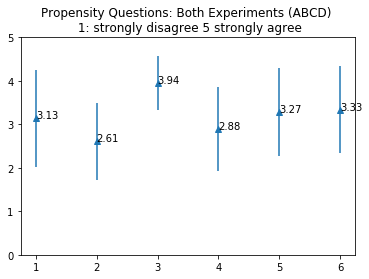

### Among trust-propensity questions:

Hypotheses:

Q1 inversely correlated with 2 and 5, directly correlated with 3, 4 and 6.
Q2 directly correlated with 5, inversely correlated with 3, 4 and 6.
Q3 directly correlated with 4 and 6, inversely correlated with 5.
Q4 directly correlated with 6, inversely correlated with 5.
Q5 inversely correlated with 6.

Correlation test.

Spearman r between questions:
[[ 0.     1.     2.     3.     4.     5.     6.   ]
 [ 1.     1.    -0.325 -0.186  0.824 -0.606 -0.538]
 [ 2.    -0.325  1.    -0.169 -0.387  0.382  0.09 ]
 [ 3.    -0.186 -0.169  1.    -0.193  0.281  0.234]
 [ 4.     0.824 -0.387 -0.193  1.    -0.723 -0.432]
 [ 5.    -0.606  0.382  0.281 -0.723  1.     0.41 ]
 [ 6.    -0.538  0.09   0.234 -0.432  0.41   1.   ]] 

Spearman p-value between questions:
[[  0.00000000e+00   1.00000000e+00   2.00000000e+00   3.00000000e+00
    4.00000000e+00   5.00000000e+00   6.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   5.30000000e-02   2.76000000e-01
    0.00000000e+00   0.00000000e+00   

### Between trust-propensity questions and trust:

Hypotheses:

Q1 3 4 6 directly correlated with self-reported trust and proportion of attends, inversely correlated with number of checks.
Q2 5 inversely correlated with self-reported trust and proportion of attends, directly correlated with number of checks.

Below summarises the correlation between answers and four user behavior trust:
Trust Score, # events, Prop Alert and # Check

Q1: I usually trust machines until there is a reason not to
    r:[-0.036 -0.077 -0.349  0.08 ]
    p:[ 0.835  0.656  0.037  0.644]
Q2: For the most part; I distrust machines
    r:[ 0.097 -0.159  0.008 -0.083]
    p:[ 0.573  0.354  0.961  0.631]
Q3: In general; I would rely on a machine to assist me
    r:[-0.019 -0.201  0.016 -0.258]
    p:[ 0.912  0.241  0.925  0.129]
Q4: My tendency to trust machines is high
    r:[-0.088 -0.218 -0.27  -0.078]
    p:[ 0.61   0.201  0.112  0.65 ]
Q5: It is difficult for me to trust machines to do their job
    r:[-0.159 -0.014  0.165 -0.178]
    p:[ 0.355  0.936  0.335  

In [21]:
display(Markdown('## RQ8 Trust-Propensity Questionnaire'))

Qs_propensity = ['I usually trust machines until there is a reason not to',
'For the most part; I distrust machines',
'In general; I would rely on a machine to assist me',
'My tendency to trust machines is high',
'It is difficult for me to trust machines to do their job',
'I am likely to trust a machine even when I have little knowledge about it']

for qid in range(len(Qs_propensity)):
    print('Q',qid+1,': ',Qs_propensity[qid],sep='')

# overall mean & std
x = np.arange(6)+1
y = np.array(exp_prop.mean(axis=0))
e = np.array(exp_prop.std(axis=0))
plt.errorbar(x, y, e, linestyle='None', marker='^')
axes = plt.gca()
axes.set_ylim([0,5])
for xy in zip(x, y):
    axes.annotate('%.4s' % xy[1], xy=xy, textcoords='data')
plt.title("Propensity Questions: Both Experiments (ABCD) \n 1: strongly disagree 5 strongly agree")    
plt.show()


display(Markdown('### Among trust-propensity questions:'))
print('\033[1m'+'Hypotheses:\n')
print('Q1 inversely correlated with 2 and 5, directly correlated with 3, 4 and 6.')
print('Q2 directly correlated with 5, inversely correlated with 3, 4 and 6.')
print('Q3 directly correlated with 4 and 6, inversely correlated with 5.')
print('Q4 directly correlated with 6, inversely correlated with 5.')
print('Q5 inversely correlated with 6.'+'\033[0m'+'\n')
print('Correlation test.\n')

# def corrcoefp(matrix):
#     r = np.corrcoef(matrix)
#     rf = r[np.triu_indices(r.shape[0], 1)]
#     df = matrix.shape[1] - 2
#     ts = rf * rf * (df / (1 - rf * rf))
#     pf = ss.betainc(0.5 * df, 0.5, df / (df + ts))
#     p = np.zeros(shape=r.shape)
#     p[np.triu_indices(p.shape[0], 1)] = pf
#     p[np.tril_indices(p.shape[0], -1)] = pf
#     p[np.diag_indices(p.shape[0])] = np.ones(p.shape[0])
#     return r, p

def corrcoefp(matrix):
    rows, cols = matrix.shape[0], matrix.shape[1]
    r = np.ones(shape=(rows, rows))
    p = np.ones(shape=(rows, rows))
    for i in range(rows):
        for j in range(i+1, rows):
            #r_, p_ = sp.pearsonr(matrix[i], matrix[j])
            r_, p_ = sp.spearmanr(matrix[i], matrix[j])
            r[i, j] = r[j, i] = np.around(r_, decimals=5)
            p[i, j] = p[j, i] = p_
    return r, p

r,p = corrcoefp(exp_prop.T)

r = np.vstack((np.arange(6)+1,r))
r = np.hstack((np.arange(7)[np.newaxis].T,r)) # note: need to add one more dimension so it can transpose
p = np.vstack((np.arange(6)+1,p))
p = np.hstack((np.arange(7)[np.newaxis].T,p))         
print('Spearman r between questions:')
print(np.around(r, decimals=3),'\n')
print('Spearman p-value between questions:')
print(np.around(p, decimals=3))

display(Markdown('### Between trust-propensity questions and trust:'))
print('\033[1m'+'Hypotheses:\n')
print('Q1 3 4 6 directly correlated with self-reported trust and proportion of attends, inversely correlated with number of checks.')
print('Q2 5 inversely correlated with self-reported trust and proportion of attends, directly correlated with number of checks.'+'\033[0m'+'\n')
print('Below summarises the correlation between answers and four user behavior trust:')
print('\033[1m'+'Trust Score, # events, Prop Alert and # Check'+'\033[0m'+'\n')

# pearson correlation             
for qid in range(len(Qs_propensity)):
    print('Q',qid+1,': ',Qs_propensity[qid],sep='')
    user_trust = np.vstack((exp_prop[:,qid],\
                 np.sum(exp_trust,axis=1),\
                 np.sum(exp_attend,axis=1),\
                 np.sum(exp_attend_alert_prop,axis=1),\
                 np.sum(exp_check,axis=1)))
    r,p = corrcoefp(user_trust)
    result = np.vstack((np.around(r[0,1:],decimals=3),np.around(p[0,1:],decimals=3)))
    print('    r:',result[0],sep='')
    print('    p:',result[1],sep='')

# Pre-game questionnaire

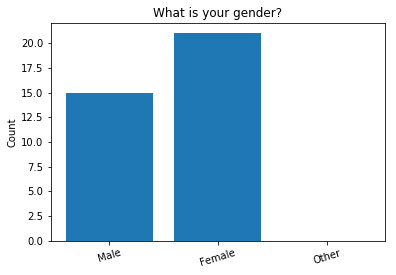

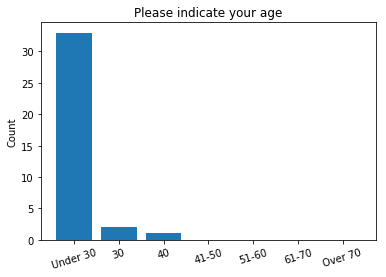

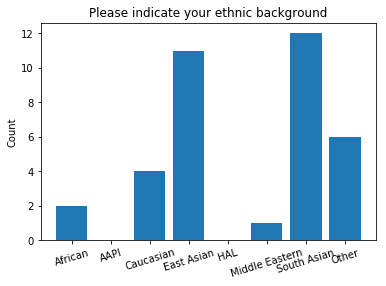

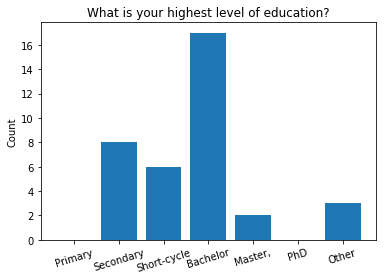

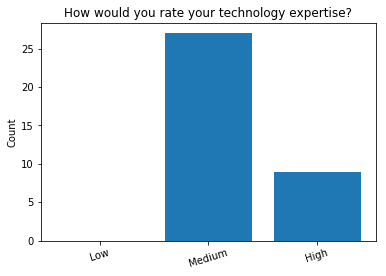

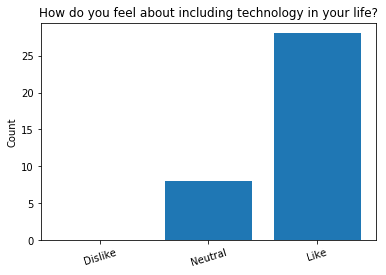

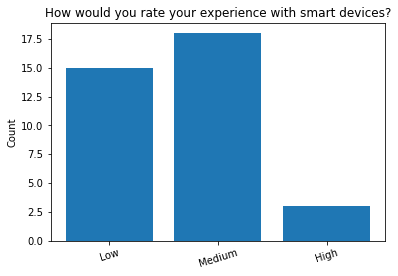

# Comparison between male and female

Trust Scores
Male: Mean: 2.96666666667  Std: 0.999444290038  Median: 3.0
Female: Mean: 3.22619047619  Std: 0.843055532207  Median: 3.0
RanksumsResult(statistic=-2.2689676696053396, pvalue=0.023270292009950757) 

# Attended Events
Male: Mean: 12.3333333333  Std: 3.41158158174  Median: 14.0
Female: Mean: 13.4761904762  Std: 1.64009429517  Median: 14.0
RanksumsResult(statistic=-2.0407792701953147, pvalue=0.041272771952189403) 

Proportion Attended Alerts
Male: Mean: 0.821971288515  Std: 0.25165968284  Median: 0.945588235294
Female: Mean: 0.820673269308  Std: 0.251465392116  Median: 0.941176470588
RanksumsResult(statistic=0.47862157989461146, pvalue=0.63220786341708535) 

Proportion Attended False Alerts
Male: Mean: 0.181826839285  Std: 0.0613635468167  Median: 0.184659090909
Female: Mean: 0.187202453849  Std: 0.0844017493623  Median: 0.176470588235
RanksumsResult(statistic=0.081085814884694296, pvalue=0.93537370662083463) 

# Checks
Male: Mean: 3.68333333333  Std: 3.39603527007  Median: 3

# Comparison between Low and Medium+High experience with smart devices

Trust Scores
Low: Mean: 2.84166666667  Std: 0.903657690844  Median: 3.0
Medium & High: Mean: 3.31547619048  Std: 0.880610454879  Median: 3.0
RanksumsResult(statistic=-3.9904266953432299, pvalue=6.5954531887593403e-05) 

# Attended Events
Low: Mean: 12.4583333333  Std: 3.19868679652  Median: 14.0
Medium & High: Mean: 13.3869047619  Std: 1.96978846833  Median: 14.0
RanksumsResult(statistic=-2.4045890768018636, pvalue=0.016190659870749895) 

Proportion Attended Alerts
Low: Mean: 0.807598039216  Std: 0.264509245043  Median: 0.928571428571
Medium & High: Mean: 0.83093987595  Std: 0.241393861288  Median: 0.95
RanksumsResult(statistic=-1.1653394988738366, pvalue=0.24388159659934494) 

Proportion Attended False Alerts
Low: Mean: 0.18090407401  Std: 0.071665381559  Median: 0.166666666667
Medium & High: Mean: 0.187861571902  Std: 0.07833670372  Median: 0.19375
RanksumsResult(statistic=-0.29205244830150956, pvalue=0.77024652314399145) 

# Checks
Low: Mean: 3.94166666667  Std: 4.29979812188  Media

In [22]:
########################### Pre-game questionnaire ################################
display(Markdown('# Pre-game questionnaire'))

Qs_pre =['What is your gender?',
'Please indicate your age',
'Please indicate your ethnic background',
'What is your highest level of education?',
'How would you rate your technology expertise?',
'How do you feel about including technology in your life?',
'How would you rate your experience with smart devices?']

opts = [['Male','Female','Other'],
        ['Under 30','30','40','41-50','51-60','61-70','Over 70'],
        ['African','AAPI','Caucasian','East Asian','HAL','Middle Eastern','South Asian','Other'],
        ['Primary','Secondary','Short-cycle','Bachelor','Master,','PhD','Other'],
        ['Low','Medium','High'],
        ['Dislike','Neutral','Like'],
        ['Low','Medium','High']]

for idx in range(len(Qs_pre)): 
    
    ans = np.arange(len(opts[idx]))+1
    cnt = {key: 0 for key in ans}
    cnt.update(Counter(exp_demo[:,idx]))
    plt.bar(ans,list(cnt.values()))
    plt.xticks(ans, opts[idx], rotation=17)
    plt.title(Qs_pre[idx])
    plt.ylabel("Count")
    plt.show()
    
import numpy.matlib

def male_vs_female(exp_data, q_vec=exp_demo[:,0]):
    temp = np.matlib.repmat(q_vec, 8, 1).T
    exp_data_male = exp_data[temp==1]
    exp_data_female = exp_data[temp==2]
    print('Male: Mean:',exp_data_male.mean(),' Std:',exp_data_male.std(),' Median:',np.median(exp_data_male))
    print('Female: Mean:',exp_data_female.mean(),' Std:',exp_data_female.std(),' Median:',np.median(exp_data_female))
    print(sp.ranksums(exp_data_male,exp_data_female),'\n')
    
display(Markdown('# Comparison between male and female'))
print('Trust Scores')
male_vs_female(exp_trust)
print('# Attended Events')
male_vs_female(exp_attend)
print('Proportion Attended Alerts')
male_vs_female(exp_attend_alert_prop)
print('Proportion Attended False Alerts')
male_vs_female(exp_attendf_prop)
print('# Checks')
male_vs_female(exp_check)
print('# Loss')
male_vs_female(Total_loss)
print('# Q6',Qs_propensity[5])
male_vs_female(np.matlib.repmat(exp_prop[:,5],8,1).T)

def L_vs_MH(exp_data, q_vec=exp_demo[:,6]):
    temp = np.matlib.repmat(q_vec, 8, 1).T
    exp_data_1 = exp_data[temp==1]
    exp_data_2 = exp_data[np.logical_or(temp==2,temp==3)]
    print('Low: Mean:',exp_data_1.mean(),' Std:',exp_data_1.std(),' Median:',np.median(exp_data_1))
    print('Medium & High: Mean:',exp_data_2.mean(),' Std:',exp_data_2.std(),' Median:',np.median(exp_data_2))
    print(sp.ranksums(exp_data_1,exp_data_2),'\n')
    
display(Markdown('# Comparison between Low and Medium+High experience with smart devices'))
print('Trust Scores')
L_vs_MH(exp_trust)
print('# Attended Events')
L_vs_MH(exp_attend)
print('Proportion Attended Alerts')
L_vs_MH(exp_attend_alert_prop)
print('Proportion Attended False Alerts')
L_vs_MH(exp_attendf_prop)
print('# Checks')
L_vs_MH(exp_check)
print('# Loss')
L_vs_MH(Total_loss)
print('# Q6',Qs_propensity[5])
L_vs_MH(np.matlib.repmat(exp_prop[:,5],8,1).T)

# Post-game questionnaire

Q1: How difficult was your admin job in the experiment?
Q2: How engaged were you with the experiment?
Q3: How stressful was the experiment?
Q4: How important to do well in the card game?
Q5: How important the elderly residents are ok?
Q6: How did you determine your trust to monitoring system?
Q7: Was the tutorial video sufficiently helpful?

Hypotheses:
Q4 is directly correlated with income (sum of all).
Q5 is inversely correlated with losses (sum of all).

Q4 vs income:
    Answers to Q4: Mean: 3.02777777778  std: 0.725951908076
    Total income:  Mean: 1201.63888889  std: 211.58819448
    SpearmanrResult(correlation=0.42205351648035339, pvalue=0.010347350395681722)
Q4 vs losses:
    Answers to Q4: Mean: 3.02777777778  std: 0.725951908076
    Total losses:  Mean: -1617.05555556  std: 946.591955516
    SpearmanrResult(correlation=-0.38565202765746875, pvalue=0.020183540290833409)
Q5 vs income:
    Answers to Q5: Mean: 3.41666666667  std: 0.721687836487
    Total income:  Mean: 1201.638

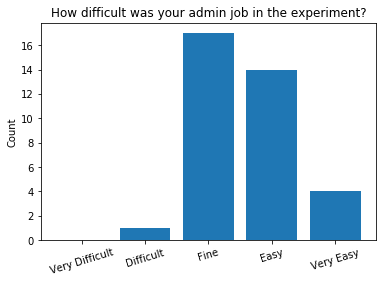

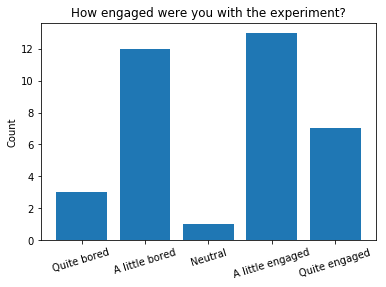

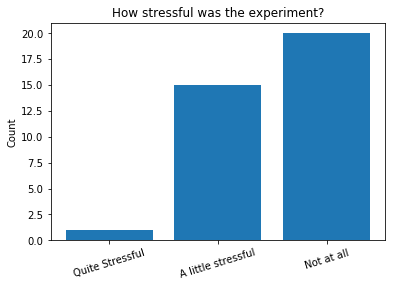

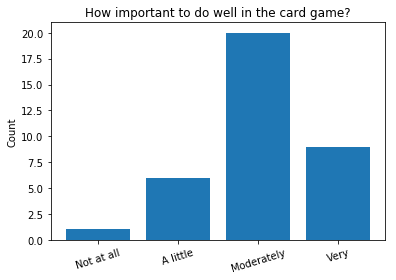

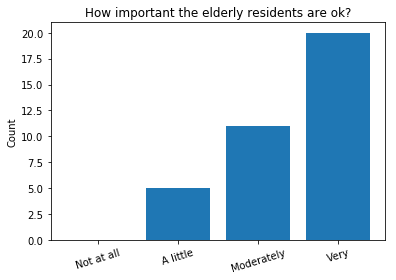

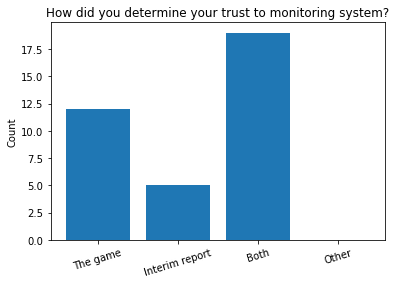

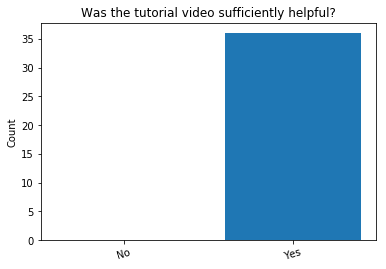

In [23]:
########################### Post-game questionnaire ################################
display(Markdown('# Post-game questionnaire'))

Qs_post =['How difficult was your admin job in the experiment?',
'How engaged were you with the experiment?',
'How stressful was the experiment?',
'How important to do well in the card game?',
'How important the elderly residents are ok?',
'How did you determine your trust to monitoring system?',
'Was the tutorial video sufficiently helpful?']


for qid in range(len(Qs_post)):
    print('Q',qid+1,': ',Qs_post[qid],sep='')
    
print('\n'+'\033[1m'+'Hypotheses:')
print('Q4 is directly correlated with income (sum of all).')
print('Q5 is inversely correlated with losses (sum of all).'+'\033[0m'+'\n')

print('Q4 vs income:')
print('    Answers to Q4: Mean:', exp_pgq[:,3].mean(),' std:',exp_pgq[:,3].std())
print('    Total income:  Mean:',np.sum(Earnings_admin, axis=1).mean(),' std:',np.sum(Earnings_admin, axis=1).std())
# spearman correlation
print('   ',sp.spearmanr(exp_pgq[:,3], np.sum(Earnings_admin, axis=1)))
      
print('Q4 vs losses:')
print('    Answers to Q4: Mean:', exp_pgq[:,3].mean(),' std:',exp_pgq[:,3].std())
print('    Total losses:  Mean:', np.sum(Total_loss, axis=1).mean(),' std:',np.sum(Total_loss, axis=1).std())
# spearman correlation
print('   ',sp.spearmanr(exp_pgq[:,3], np.sum(Total_loss, axis=1)))
      
print('Q5 vs income:')
print('    Answers to Q5: Mean:', exp_pgq[:,4].mean(),' std:',exp_pgq[:,4].std())
print('    Total income:  Mean:',np.sum(Earnings_admin, axis=1).mean(),' std:',np.sum(Earnings_admin, axis=1).std())
# spearman correlation
print('   ',sp.spearmanr(exp_pgq[:,4], np.sum(Earnings_admin, axis=1)))
      
print('Q5 vs losses:')
print('    Answers to Q5: Mean:', exp_pgq[:,4].mean(),' std:',exp_pgq[:,4].std())
print('    Total losses:  Mean:',np.sum(Total_loss, axis=1).mean(),' std:',np.sum(Total_loss, axis=1).std())
# spearman correlation
print('   ',sp.spearmanr(exp_pgq[:,4], np.sum(Total_loss, axis=1)))

print('Q5 vs # check:')
print('    Answers to Q5: Mean:', exp_pgq[:,4].mean(),' std:',exp_pgq[:,4].std())
print('    Total # check:  Mean:',np.sum(exp_attend_alert_prop, axis=1).mean(),' std:',np.sum(exp_attend_alert_prop, axis=1).std())
# spearman correlation
print('   ',sp.spearmanr(exp_pgq[:,4], np.sum(exp_attend_alert_prop, axis=1)))

print('Q5 vs proportion of attended alert:')
print('    Answers to Q5: Mean:', exp_pgq[:,4].mean(),' std:',exp_pgq[:,4].std())
print('    Total proportion of attended alert:  Mean:',np.sum(exp_check, axis=1).mean(),' std:',np.sum(exp_check, axis=1).std())
# spearman correlation
print('   ',sp.spearmanr(exp_pgq[:,4], np.sum(exp_check, axis=1)))

opts =[['Very Difficult','Difficult','Fine','Easy','Very Easy'],
['Quite bored','A little bored','Neutral','A little engaged','Quite engaged'],
['Quite Stressful','A little stressful','Not at all'],
['Not at all','A little','Moderately','Very'],
['Not at all','A little','Moderately','Very'],
['The game','Interim report','Both','Other'],
['No','Yes']]


for idx in range(len(Qs_post)): 
    ans = np.arange(len(opts[idx]))+1
    cnt = {key: 0 for key in ans}
    cnt.update(Counter(exp_pgq[:,idx]))
    plt.bar(ans,list(cnt.values()))
    plt.xticks(ans, opts[idx], rotation=17)
    plt.title(Qs_post[idx])
    plt.ylabel("Count")
    plt.show()